this Code has a purpose to be employed with Paper 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Library Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind,f_oneway, chi2_contingency
import statistics
import re
import shap
import os
from datetime import datetime, timedelta
import pytz
import scipy as sp
import shapely

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from collections import Counter
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler, SMOTE
import xgboost
import warnings
warnings.filterwarnings("ignore")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


ModuleNotFoundError: No module named 'shapely'

# Default  Names & Setting

and then this is highly important : resampling option : every how many hour?

In [2]:
# folder_project = 'Data Pilot - DMS'
# platform_directory = '/content/drive/MyDrive/Colab Notebooks'

folder_project = 'project'
platform_directory = 'C:/Users/azimilga'

In [3]:
# tell resample data
time_series_resample = '10min'  #for processor 1
survey_resample      = '10min'    #for processor 2
desample_option      = '10min' 
minutely_resample    = '1min'

In [4]:
#filtering rows data regarding to desired specific time
start_time = '00:00:00'
end_time   = '23:59:59'
start_date = '2023-03-06'
end_date   =  '2023-05-30'
folder_year    = '2023'

# Folder Naming
folder_raw     = 'data-raw'
folder_ready   = 'data-ready'
folder_pivot   = 'pivot'

folder_export  = 'export'
folder_is      = 'niluapp'
data_for1      = 'combined panel'
data_for2      = 'combined longitudinal'
word_indoor    = 'Indoor '
word_outdoor   = 'Outdoor '



spec_date = pd.to_datetime('today').strftime("%Y-%m-%d")
#name_date = pd.to_datetime('today').strftime("%y%m%d")
date_format_show =  '%Y-%m-%d'
time_format_show =  '%H:%M'
start_day  = 0
end_day    = 4
start_hour = 7
end_hour   = 13

### sub setting

In [5]:
col_header = ['title', 'sessionid', 'date', 'time' ]
response_counting = ['responses']
is_col_main  =  ['feel_air','feel_temp','feel_health','feel_bright','feel_noise']
is_col_main1  = ['feel_air1','feel_temp1','feel_health1','feel_bright1','feel_noise1'] #
is_col_main2  = ['feel_air2','feel_temp2','feel_health2','feel_bright2','feel_noise2'] #
is_col_main3  = ['feel_air3','feel_temp3','feel_health3','feel_bright3','feel_noise3'] #
is_col_main4  = ['feel_air4','feel_temp4','feel_health4','feel_bright4','feel_noise4'] #

is_main_air    = ['feel_air1', 'feel_air2', 'feel_air3', 'feel_air4']
is_main_temp   = ['feel_temp1', 'feel_temp2', 'feel_temp3', 'feel_temp4']
is_main_bright = ['feel_bright1', 'feel_bright2', 'feel_bright3', 'feel_bright4']
is_main_health = ['feel_health1', 'feel_health2', 'feel_health3', 'feel_health4']
is_main_noise  = ['feel_noise1', 'feel_noise2', 'feel_noise3', 'feel_noise4']

is_col_air   = ['air_smell','air_heavy','air_dry','air_dust','air_electshock']
is_col_temp  = ['temp_coldhot','temp_draw','temp_coldfloor','temp_heatsun','temp_heater' ]
is_col_bright = ['bright_sun','bright_lamp_hi','bright_lamp_low']
is_col_health  = ['health_head','health_cough','health_tired','health_dryskin']
is_col_multi  = ['feel_air','feel_temp','feel_health','feel_bright','feel_noise','temp_coldhot']
is_col_subquestion = is_col_air+ is_col_temp + is_col_bright + is_col_health
pd_col       = ['rd_air', 'rd_temp', 'rd_health', 'rd_bright', 'rd_noise']
columns_formation   = col_header + is_col_main + is_col_air + is_col_temp + is_col_bright + is_col_health

is_main_ad = ['ad_air','ad_temp','ad_health','ad_bright','ad_noise']
is_main_as = ['as_air','as_temp','as_health','as_bright','as_noise']
is_main_rd = ['rd_air','rd_temp','rd_health','rd_bright','rd_noise']
is_main_rs = ['rs_air','rs_temp','rs_health','rs_bright','rs_noise']

school_col_name   = 'school_id'
room_col_name     = 'room_id'
date_name         = 'date'
time_name         = 'time'
manuf_col_name    = 'manuf_id'
instr_col_name    = 'instr_id'
serial_col_name   = 'serial_id'

#Give a name for new column in purpose to count how many response / hour or response / day
response_counting = 'responses'

#columns_formation = ['title', 'sessionid', 'date', 'time' , 'Room Air', 'Room Temperature', 'Room Lighting', 'Health Feeling', 'Room Noice', 'BAD SMELL' , 'BAD HEAVY/AIR', 'DRY AIR', 'DUST AND DIRT', 'ELECTRIC SHOCK', '(-COLD) OR HOT', 'DRAWING COLD AIR', 'COLD ON THE FLOOR', 'MUCH HEAT FROM SUNSHINE', 'MUCH HEAT FROM FURNACES', 'LIGHT FROM THE SUN', 'BRIGHT LIGHT CEILING LAMPS', 'WEAK LIGHT CEILING LAMPS', 'HEADACHE', 'COUGH/SHORENESS', 'TIRED/UNCONCENTRATED', 'DRY EYES/HANDS']

word_indoor   = 'Indoor '
word_outdoor  = 'Outdoor ' 
temp_v_label  = word_indoor + 'Temp. by Vent system (*C)'
co2_v_label   = word_indoor+ 'CO2 level by Vent System (ppm)'
vent_v_label  = word_indoor+ 'Supply Air (CMH)'
swc_f_label   = word_indoor+ 'Floor Heater -On/Off'
swc_r_label   = word_indoor+ 'Baseboard Heater-On/Off'
temp_f_label  = word_indoor+ 'Floor Temperature (*C)'

temp_a_label  = word_indoor+ 'Temp. by add. sensors (*C)'
rh_a_label    = word_indoor+ 'Relative Humidity (%)'
co2_a_label   = word_indoor+ 'CO2 level by add. sensors (ppm)'
voc_a_label   = word_indoor+ 'VOC contaminant level (ppb)'
bright_a_label= word_indoor+ 'Luminous Intensity (%)'
sound_a_label = word_indoor+ 'Sound Pressure Intensity (dBA)'
pm25_a_label  = word_indoor+ 'PM2.5 density (ug/m3)'
pm1_a_label   = word_indoor+ 'PM1.0 density (ug/m3)'
rdn_a_label   = word_indoor+ 'Radon Level (Bq/m3)'
hura_a_label  = word_indoor+ 'Humidity Ratio (g/kg air)'
press_a_label = word_indoor+ 'Air pressure (hPa)'
enth_a_label  = word_indoor+ 'entalphy (kJ/kg)'

temp_o_label  = word_outdoor+ 'Temperature (*C)'
rh_o_label    = word_outdoor+ 'Relative Humidity (%)'
winds_o_label = word_outdoor+ 'Wind Speed (m/s)'
sun_o_label   = word_outdoor+ 'Mean Global Radiation (W/m2)'
pm25_o_label  = word_outdoor+ 'PM2.5 density (ug/m3)'
pm10_o_label  = word_outdoor+ 'PM10 density (ug/m3)'
enth_o_label  = word_outdoor+ 'entalphy (kJ/kg)'

hura_d_label = 'delta Indoor-Outdoor Humidity Ratio (g/kg air)'
enth_d_label = 'delta Indoor-Outdoor entalphy (kJ/kg)'
hour_label = 'Datetime : Hour'

answer_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}

airthingsAll  = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a',  'rdn_a','sound_a', 'pm1_a', 'pm25_a']
airthingsPlus = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a', 'rdn_a']
airthingsPro  = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a', 'sound_a', 'pm1_a', 'pm25_a']
airthingsSmall = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a']
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o']
weather_oslo  = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o', 'sun_o', 'pm2.5_o', 'pm10_o']


co2_name          = 'co2_a'
temp_data_name    = 'temp_a'
rel_hum_name      = 'rh_a'
voc_name          = 'voc_a'
bright_name       = 'bright_a'
sound_name        = 'sound_a'
pm25_name         = 'pm2.5_a'
pm1_name          = 'pm1_a'
radon_name        = 'rdn_a'
press_name        = 'press_a'
enthalpy_name     = 'enth_a'
humid_ratio_name  = 'hura_a'
pmv_ppd_name      = [ 'pmv', 'ppd']

airthingsSmall = [co2_name, temp_data_name, rel_hum_name, press_name, enthalpy_name, humid_ratio_name, voc_name, bright_name]
airthingsPlus = airthingsSmall + [ radon_name] +pmv_ppd_name
airthingsPro  = airthingsSmall + [  sound_name, pm1_name, pm25_name] + pmv_ppd_name
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o']
weather_oslo  = weather_volda + [ 'sun_o', 'pm2.5_o', 'pm10_o']
weather_extra = [ 'nox_o', 'no2_o', 'no_o']


Time Zone Changing (GMT to OSLO)

In [6]:
 #convert time format to datetime  : time_zone_converter (df, 'Zone Origin', 'Zone Destination')
def time_zone_converter(df, zone_origin, zone_destination):
  #df['datetime'] = pd.to_datetime((df['date'] + ' ' + df['time']), format='%Y-%m-%d %H:%M:%S')
  #df['DateTime'] = datechange.dt.strftime('%Y-%m-%d %H:%M:%S')

  df['datetime'] = pd.to_datetime(df['datetime'])
  df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

  # Define the timezones (GMT and Europe/Oslo)
  origin_timezone = pytz.timezone(zone_origin)
  destination_timezone = pytz.timezone(zone_destination)

  # Adjust the datetime to the Oslo timezone and account for daylight saving time
  df['adjusted datetime'] = df['datetime'].dt.tz_localize(origin_timezone).dt.tz_convert(destination_timezone)

  # Extract the adjusted time
  df['time'] = df['adjusted datetime'].dt.strftime('%H:%M')
  df['datetime'] = df['adjusted datetime'] #.dt.strftime('%Y-%m-%d %H:%M')
  df.drop(['adjusted datetime'], axis=1, inplace=True)

In [7]:
#plotting graphs
def plotter (df, y_axis, y_axis_label, pd_check, pd_check_label, response_counting, x_function, y_function):
    plt.scatter(df.reset_index()[y_axis], df.reset_index()[pd_check]*100, s= df.reset_index()[response_counting])
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

#plotting graphs
def plotter_noresponse (df, y_axis, y_axis_label, pd_check, pd_check_label, x_function, y_function):
    plt.scatter(df.reset_index()[y_axis], df.reset_index()[pd_check])
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

def plotter_eachclasses (df, y_axis, y_axis_label, pd_check, pd_check_label, response_counting, x_function, y_function):
    for first_index, data in df.groupby(level=0):
     # Extract x and y data for the scatter plot
        x_data = data[y_axis]
        y_data = data[pd_check]
        s_data = data[response_counting]# Replace 'YourColumn' with your column name
    # Plot a scatter graph for each subset of data
        plt.scatter(x_data, y_data, s=s_data , label=first_index ) #, label=first_index
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

def dissatisfaction_rate (df, col, coef, dis_name, satis_name ):
    df[dis_name] = ((df[col[3]] + coef * df[col[2]]) / (df[col[3]] + df[col[2]] + df[col[1]] + df[col[0]])).round(3)
    df[satis_name] = ((df[col[0]] + coef * df[col[1]]) / (df[col[3]] + df [col[2]] + df[col[1]] + df[col[0]])).round(3)


def dissatisfaction_rate2 (df, col, coef, dis_name, satis_name ):
    df[dis_name] = ((df[col[3]] + coef * df[col[2]]) / (df['students'])).round(3)
    df[satis_name] = ((df[col[0]] + coef * df[col[1]]) / (df['students'])).round(3)

In [8]:
# Create a heatmap for the pearsons coefficient
def heatmap_corrvalue (df, corr_method , size , title, font_size):
    corr = df.corr(method=corr_method).round(2)   #, 'feel_bright'

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)

    plt.xticks(rotation=90, fontsize=font_size)
    plt.title('correlation map : '+ '(' + corr_method + ') '+title , fontsize=12)
    plt.yticks(fontsize=font_size,rotation=90 )

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220,10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,cmap="coolwarm", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
                square=True, linewidths=.5, annot_kws={"size": (font_size-2)})


# Create a heatmap for the p-values
def heatmap_pvalue_noreplace (df, categorical_column, continuous_column):

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(4)

    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)


# Create a heatmap for the p-values
def heatmap_pvalue_2cat (input_df, categorical_column, continuous_column, figsize):
    df = input_df.copy()
    answer_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}
    df.loc[:,categorical_column] = df.loc[:,categorical_column].replace(answer_replace2)

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols)).round(3)

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova
    
    p_values = p_values.round(3)
    plt.figure(figsize=figsize)  #figsize=(5 , 8)
    #plt.figure(figsize=(4,6))
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)


# Create a heatmap for the p-values
def heatmap_pvalue_4cat (df, categorical_column, continuous_column,figsize):

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols)).round(3)

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova
    p_values = p_values.round(3)    
    plt.figure(figsize=figsize)
    #plt.figure(figsize=(4,6))
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns,
               #size = 8,
               rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns,
               #size = 8,
               horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

def heatmap_pvalue_subquest (df, categorical_column, continuous_column, figsize):

    answer_replace2 = {0:'No', 1:'Yes'}
    df.loc[:,categorical_column] = df.loc[:,categorical_column].fillna(0).replace(answer_replace2)

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns  = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(decimals=3)

    plt.figure(figsize=figsize)

    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

# Create a heatmap for the p-values
def heatmap_chitest_2cat (df,answer_replace2, figsize):
    df = df.replace(answer_replace2)
    # Create a contingency table for each pair of columns and store the p-values in a DataFrame
    p_values = pd.DataFrame(index=df.columns, columns=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, _, _ = chi2_contingency(contingency_table )
                p_values.loc[col1, col2] = p

    # Convert p-values to numeric for plotting
    p_values = p_values.astype(float).round(3)

    plt.figure(figsize=figsize)  #figsize=(5 , 8)
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                ,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('chi2 test p-values Heatmap')
    plt.ylabel('user feedback')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(size = 8,rotation=0
               )
    plt.xticks(size = 8,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)



In [9]:
def stat_test_boxplot (df, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column_feel, x=column_value , orient='h' ,data=df)
    plt.title(column_feel + ' vs ' + column_value)
    plt.xlabel(column_label)
    plt.legend()
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_test_boxplot_hue (df, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column_feel, x=column_value , orient='h' , hue = 'time', data=df)
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_test_sub2 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value]>=0]
    cat_ab = dfs[dfs[column_feel] == 'No'][column_value]
    cat_cd = dfs[dfs[column_feel] == 'Yes' ][column_value]
    t_stat, p_val = ttest_ind(cat_ab, cat_cd)
    print(f"T-test p-value [2cat]: {p_val}")
# Statistical test: ANOVA (for multiple categories)
    f_stat, p_val_anova = f_oneway(cat_ab, cat_cd)
    print(f"ANOVA p-value [2cat]: {p_val_anova}")

def stat_test_main2 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value]>=0]
    cat_ab = dfs[dfs[column_feel] == 'dissatisf.'][column_value]
    cat_cd = dfs[dfs[column_feel] == 'satisfied' ][column_value]
    t_stat, p_val = ttest_ind(cat_ab, cat_cd)
    print(f"T-test p-value [2cat]: {p_val}")
# Statistical test: ANOVA (for multiple categories)
    f_stat, p_val_anova = f_oneway(cat_ab, cat_cd)
    print(f"ANOVA p-value [2cat]: {p_val_anova}")

def stat_test_main4 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value] >= 0 ].copy()
    cat_a = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [0])][column_value]
    cat_b = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [1])][column_value]
    cat_c = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [2])][column_value]
    cat_d = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [3])][column_value]
    t_stat4, p_val4 = ttest_ind(cat_a, cat_d)
    print(f"T-test p-value [4cat]: {p_val4}")
    print('T-test between : ' + np.array(dfs[column_feel].unique()) [0] + ' and ' + np.array(dfs[column_feel].unique()) [3])
# Statistical test: ANOVA (for multiple categories)
    f_stat4, p_val_anova4 = f_oneway(cat_a, cat_b, cat_c, cat_d)
    print(f"ANOVA p-value [4cat]: {p_val_anova4}")


def stat_test (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data[input_data[column_value]>=0].copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_test_boxplot (data_cat_2, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_2, column_feel, column_value, value_label)
    #recategorical as 4 categories

    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    data_cat_4 = input_data[input_data[column_value]>=0].copy() #.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_4.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace4)
    data_cat_4['time'] = data_cat_4[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main4 (data_cat_4, column_feel, column_value)
    stat_test_boxplot (data_cat_4, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_4, column_feel, column_value, value_label)

def stat_test_subquestion (input_data, is_col_air, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'No', 1:'Yes'}
    data_cat_s = input_data[input_data[column_value]>=0].copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_s.loc[:,is_col_air] = input_data.loc[:,is_col_air].replace(answer_replace2)
    data_cat_s['time'] = data_cat_s[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_sub2 (data_cat_s, column_feel, column_value)
    stat_test_boxplot (data_cat_s, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_s, column_feel, column_value, value_label)

def stat_trial_plot (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 3))
    sns.boxplot(y= column_feel, x= column_value, orient='h' , data=dataset )
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()
def stat_trial_plot_hue (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y= column_feel, x= column_value, orient='h' , hue ='time', data=dataset )
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_trial_time (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_trial_plot (data_cat_2, column_feel, column_value, value_label)
    stat_trial_plot_hue (data_cat_2, column_feel, column_value, value_label)

def stat_trial_all(df, test_feel,test_column,test_label):
    stat_trial_time (df, is_col_main, test_feel, test_column, test_label)
    stat_trial_time (df[df['hour']<=9], is_col_main, test_feel, test_column, test_label)
    stat_trial_time (df[df['hour']>=10], is_col_main, test_feel, test_column, test_label)

def stat_trial_hist (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataset, x=column_value, legend='auto', hue=column_feel, multiple='stack', kde=True)
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.ylabel('frequency timestep')
    plt.show()
    plt.clf()

def stat_hist_time (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_trial_hist (data_cat_2, column_feel, column_value, value_label)

def stat_hist_all(df, test_feel,test_column,test_label):
    stat_hist_time (df, is_col_main, test_feel, test_column, test_label)
    stat_hist_time (df[df['hour']<=9], is_col_main, test_feel, test_column, test_label)
    stat_hist_time (df[df['hour']>=10], is_col_main, test_feel, test_column, test_label)


answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'Dissatisf.', -2:'Dissatisf.'}
answer_replace4 = {0:0,2:'Best' , 1:'Good', -1:'Bad', -2:'Worst'}
no_replace4 = {0:0,2:2 , 1:1, -1:-1, -2:-2}
no_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}

def feel_confusion_matrix (input_data, column_value1, column_value2, answer_replace):
    data_cat_2 = input_data.sort_values([column_value1]).copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = data_cat_2.loc[:,is_col_main].replace(answer_replace)
    identical_percent = (accuracy_score(data_cat_2[column_value1],data_cat_2[column_value2])*100).round(3)
    print('identical accuracy  : ' + str(identical_percent) + '%')
    cm_matrix = confusion_matrix(data_cat_2[column_value1],data_cat_2[column_value2])
    disp = ConfusionMatrixDisplay(confusion_matrix= cm_matrix, display_labels=data_cat_2[column_value2].unique() )
    disp.plot()
    plt.xlabel(column_value1)
    plt.ylabel(column_value2)
    plt.title('Identicality : ' + column_value1 + ' vs. ' +column_value2 + '= ' + str(identical_percent) + '%')
    plt.show()

def determine_batch_to_moment(row):
    if row['batch'] == 'morning' :
        return -1
    elif row['batch'] == 'afternoon':
        return 1
    else:
        return 0

In [10]:
#custom_colors = [ '#7fff00','#66cd00',  '#a52a2a','#ffa500', '#808080']
def pie_plot_feel (df, what_feel):
    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    df.loc[:,what_feel] = df.loc[:,what_feel].replace(answer_replace4)
    vote_counts1= (df[what_feel].value_counts().sort_index())
    print('total votes: ' + str((df[what_feel].value_counts().sum())))
    plt.figure(figsize=(4, 4))
    plt.pie(vote_counts1, labels=vote_counts1.index, autopct= lambda x: '{:.0f}'.format(x*vote_counts1.sum()/100) #'%1.1f%%'
            # , colors= custom_colors
            )
    plt.title(school_name  +': ' + what_feel)
    plt.show()

def pie_plot_feel_class (df, what_feel, class_number):
    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    df.loc[:,what_feel] = df.loc[:,what_feel].replace(answer_replace4)
    vote_counts1= (df[df['room_id']==class_number][what_feel].value_counts().sort_index())
    print('total votes: ' + str((df[df['room_id']==class_number][what_feel].value_counts().sum())))
    plt.figure(figsize=(4, 4))
    plt.pie(vote_counts1, labels=vote_counts1.index, autopct= lambda x: '{:.0f}'.format(x*vote_counts1.sum()/100)   #'%1.1f%%'
        #     ,  colors= custom_colors
            )
    plt.title(school_name + ' at Rom ' + str(class_number) +': ' + what_feel)
    plt.show()

def vote_piechart (get_in_file, what_feel,class_number,school_name,custom_colors):
    vote_counts4 = (get_in_file[get_in_file['room_id']==class_number][what_feel].value_counts().sort_index())
    # Custom colors for the pie chart segments
    plt.figure(figsize=(4, 4))
    plt.pie(vote_counts4, labels=vote_counts4.index, autopct='%1.1f%%', startangle=140
            # , colors= custom_colors
            )
    plt.title(school_name + '_' + str(class_number) +': ' + what_feel)

In [11]:
def season_creator (df,start_date,end_date,season_ranges):
    # Convert the date column to datetime
    df['date2'] = pd.to_datetime(df['date'])

    # Initialize the 'season' column with default value 0
    df['season'] = 0

    # Assign the season codes based on the date ranges
    for start_date, end_date, season_code in season_ranges:
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        df.loc[(df['date2'] >= start) & (df['date2'] <= end), 'season'] = season_code
    df.drop(['date2'], axis=1, inplace=True)
    
    
def aggfunc_mode(series):
    m, _ = mode(series)
    return m[0]

In [12]:
airthingsPlus = [ 'co2_a','temp_a', 'rh_a', 'enth_a', 'hura_a', 'voc_a','bright_a', 'press_a', 'rdn_a', 'pmv', 'ppd']
airthingsPro  = [ 'co2_a','temp_a', 'rh_a', 'enth_a', 'hura_a', 'voc_a', 'sound_a','bright_a',  'pm1_a', 'pm25_a', 'press_a', 'pmv', 'ppd']
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o']
weather_oslo  = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o', 'sun_o', 'pm2.5_o', 'pm10_o']

In [13]:
values_temp2   =  [#'swc_r', #'swc_f',
                   #'temp_v',  'temp_s', # 'temp_f',
                   #'press_a',
                   'temp_a', 'rh_a','enth_a', 'hura_a','enth_o', 'hura_o','temp_o', 'rh_o', 'students'
                   #,'pmv', 'ppd'
                   ]
values_air2    =  [#'temp_f', 'temp_v',
                   'temp_a','rh_a', 'co2_a', 'voc_a', 'bright_a', 'rdn_a', 'enth_a','enth_o', 'hura_a','hura_o','temp_o', 'rh_o', 'winds_o'
                   #, 'sun_o'
                   #,'pm10_o', 'pm2.5_o'
                   , 'students'
                   ]
values_health2 =  [#'temp_f', 'temp_v',
                   'temp_a', 'rh_a', 'co2_a', 'voc_a', 'bright_a','rdn_a','hura_a','hura_o','enth_a','enth_o'
                   #,'pm1_a', 'pm25_a'
                   #,'pm10_o', 'pm2.5_o'
                   , 'rh_o','winds_o'
                   #, 'sun_o'
                   , 'students'
                   ]
values_bright2 =  ['temp_a', 'bright_a', 'temp_o', 'rh_o','winds_o', 'rain_o', 'enth_o', 'students']
values_noise2  =  [ 'co2_a', 'voc_a', 'sound_a','enth_a','hura_a','hura_o','enth_o'
                   #,'pm1_a', 'pm25_a'
                   , 'rh_a'
                   , 'students']

In [14]:
def categorize_batch(df):
    if df < 8 :
        return 'morning'
    elif 10 <= df <= 12:
        return 'afternoon'
    else:
        return 'skip'

# Define the function to determine the value of 'column_D'
# def determine_batch(row):
#     if pd.to_datetime(row['time']) < pd.to_datetime('08:30'):
#         return 'morning'
#     elif 10 < row['hour'] <= 12:
#         return 'afternoon'
#     else:
#         return 'skip'

def determine_batch_øyra(row):
    if row['room_id'] == '302':
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('08:15'):
            return 'morning'
        elif 11 <= row['hour'] <= 12:
            return 'afternoon'
        
    elif row['room_id'] == '303':
        if pd.to_datetime('07:40') <= pd.to_datetime(row['time']) <= pd.to_datetime('09:45'):
            return 'morning'
        elif 11 <= row['hour'] <= 12:
            return 'afternoon'
    return 'skip'
   
def determine_batch_bratteberg(row):
    if row['room_id'] in ['141', '142']:
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('08:30'):
            return 'morning'
        elif 11 <= row['hour'] <= 12:
            return 'afternoon'
    elif row['room_id'] == '210':
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('08:15'):
            return 'morning'
        elif 10 <= row['hour'] <= 11:
            return 'afternoon'
        
    elif row['room_id'] == 'Øst brakker':
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('09:15'):
            return 'morning'
        elif 10 <= row['hour'] <= 12:
            return 'afternoon'
    return 'skip'

    
def determine_batch_brannfjell(row):
    if row['room_id'] in ['11', '23']:
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) < pd.to_datetime('08:30'):
            return 'morning'
        elif 12 <= row['hour'] <= 13:
            return 'afternoon'
    elif row['room_id'] == '27':
        if pd.to_datetime('09:00') <= pd.to_datetime(row['time']) <= pd.to_datetime('10:30'):
            return 'morning'
        elif 12 <= row['hour'] <= 13:
            return 'afternoon'
    return 'skip'

def determine_batch_allschools(row):
    if row['school_id'] == 'bratteberg':
        return determine_batch_bratteberg(row)
    elif row['school_id'] == 'brannfjell':
        return determine_batch_brannfjell(row)
    elif row['school_id'] == 'øyra':
        return determine_batch_øyra(row)
    return 'skip'
# Apply the function to each row
# df['batch'] = df.apply(determine_batch_allschools, axis=1)


def dissatisfaction_creator(df):
    df['rd_air']      = 1*(df['feel_air3']+df['feel_air4'])/df[response_counting]
    df['rd_temp']     = 1*(df['feel_temp3']+df['feel_temp4'])/df[response_counting]
    df['rd_health']   = 1*(df['feel_health3']+df['feel_health4'])/df[response_counting]
    df['rd_bright']   = 1*(df['feel_bright3']+df['feel_bright4'])/df[response_counting]
    df['rd_noise']    = 1*(df['feel_noise3']+df['feel_noise4'])/df[response_counting]

def dissatisfaction_aggregator(df):
    df['acc_air']    = (df['feel_air1']*2+df['feel_air2'] +df['feel_air3']*-1+df['feel_air4']*-2)/df[response_counting]
    df['acc_temp']   = (df['feel_temp1']*2+df['feel_temp2'] +df['feel_temp3']*-1+df['feel_temp4']*-2)/df[response_counting]
    df['acc_health'] = (df['feel_health1']*2+df['feel_health2'] +df['feel_health3']*-1+df['feel_health4']*-2)/df[response_counting]
    df['acc_bright'] = (df['feel_bright1']*2+df['feel_bright2'] +df['feel_bright3']*-1+df['feel_bright4']*-2)/df[response_counting]
    df['acc_noise']  = (df['feel_noise1']*2+df['feel_noise2'] +df['feel_noise3']*-1+df['feel_noise4']*-2)/df[response_counting]
    
def assign_room_id(row):
    if str(row['room_id']).startswith(('2', '3', '4')):
        return 0
    else:
        return 1

# SCHOOL Options

## Bratteberg

In [17]:
class1 = 141
class2 = 142
class3 = 210
class4 = 'Øst brakker'
school_name    = 'bratteberg'
end_file_name  = 'classes'

airthingsDevice = airthingsPlus
weather_data = weather_volda

another_interpolate_col =  airthingsDevice + weather_data
afternoon_hour_limit = 12
season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2024-02-26', '2024-03-08', 2),
]

Batch 1 - Pilot Study March 2023

data come from : 141  ,  142  ,  210  , Øst brakker

In [18]:
folder_year    = '2023'

sd_fill_col =  ['swc_f', 'swc_r', 'temp_s'] # [] #
sd_meaninterpolate_col = ['temp_v','temp_f']   #   []    #

interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-06'
end_date  =  '2023-04-25'

Batch 2 - 2024

data come from : 141  ,  210  , Øst brakker

In [ ]:
folder_year    = '2024'

sd_fill_col            = []    # ['swc_f', 'swc_r', 'temp_s'] # 
sd_meaninterpolate_col = []    # ['temp_v','temp_f']          #   

interpolate_col = sd_fill_col  + sd_meaninterpolate_col + another_interpolate_col

start_date = '2024-02-26'
end_date  =  '2024-03-08'

All years in same schools

In [ ]:
folder_year    = 'all years'

sd_fill_col = [] # ['swc_f', 'swc_r', 'temp_s'] # [] #
sd_meaninterpolate_col = []    #['temp_v','temp_f']   #   []    #

interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-06'
end_date  =  '2024-04-30'

In [ ]:
print(another_interpolate_col + ['temp_v'])

## Øyra

In [ ]:
class1 = 302
class2 = 303
class3 = 339
school_name = 'øyra'
end_file_name  = 'classes'

airthingsDevice = airthingsPro
weather_data    = weather_volda
afternoon_hour_limit = 12
another_interpolate_col = airthingsDevice + weather_data

season_ranges = [
    ('2023-03-08', '2023-04-20', 1),
    ('2024-04-03', '2024-04-30', 2)
]

Batch 1 - Pilot Study March 2023

data comes from classrooms : 

class1 : 302

class2 : 303

In [ ]:
folder_year = '2023'
start_date  = '2023-03-13'
end_date    = '2023-04-18'

sd_fill_col = [ 'temp_s']
sd_meaninterpolate_col = ['temp_v', 'vent_v']

interpolate_col =  sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

Batch 2 - April 2024
data comes from classrooms : 

class2 : 303

In [ ]:
folder_year = '2024'
start_date  = '2024-04-03'
end_date    = '2024-04-17'

sd_fill_col            =  [] #   [ 'temp_s']
sd_meaninterpolate_col =  [] #   ['temp_v', 'vent_v']

interpolate_col =  sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

All years

In [ ]:
folder_year = 'all years'
start_date  = '2023-03-13'
end_date    = '2024-04-18'

sd_fill_col = [] #[ 'temp_s']
sd_meaninterpolate_col = [] #['temp_v', 'vent_v']

interpolate_col =  sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

## KubenVGS

In [ ]:
class1 = 1707
class2 = 1713
class3 = 2707
class4 = 2713
class5 = 3707
class6 = 3708
class7 = 3713

airthingsDevice = airthingsPro
school_name     = 'kubenVGS'
end_file_name  = 'classes'
weather_data    = weather_oslo
another_interpolate_col = airthingsDevice + weather_data
afternoon_hour_limit = 13
season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2023-11-10', '2023-11-30', 2),
    ('2024-02-02', '2024-03-10', 3),
    ('2024-04-07', '2024-04-30', 4)
]

In [ ]:
folder_year    = '2023'

sd_fill_col =    []     #
sd_meaninterpolate_col =      []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-10'
end_date  =  '2023-12-31'

In [ ]:
folder_year    = '2024'

sd_fill_col =    []     #
sd_meaninterpolate_col =      []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-10'
end_date  =  '2023-12-31'

## Brannfjell

In [150]:
class1 = 11
class2 = 23
class3 = 27
airthingsDevice = airthingsPlus
school_name     = 'brannfjell'
end_file_name  = 'classes'
weather_data    = weather_oslo
another_interpolate_col = airthingsDevice + weather_data
afternoon_hour_limit = 13
season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2023-11-10', '2023-11-30', 2),
    ('2024-02-02', '2024-03-10', 3),
    ('2024-04-07', '2024-04-30', 4)
]

Batch 1 - Pilot Study March 2023

data comes from Classrooms :

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2023'

sd_fill_col =   [ 'temp_s']  # []     #
sd_meaninterpolate_col =  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-22'
end_date  =  '2023-04-23'

Batch 2 - November 2023

data comes from Classrooms :

class1 : 11

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2023'

sd_fill_col    = []     #  [ 'temp_s']  # []     #
sd_meaninterpolate_col =  []   #  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-11-13'
end_date  =  '2023-11-24'

Batch 3 - February 2024

data comes from Classrooms : 

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2024'

sd_fill_col    = []     #  [ 'temp_s']  # []     #
sd_meaninterpolate_col =  []   #  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2024-02-26'
end_date  =  '2024-03-08'

Batch 4 - April 2024

data comes from Classrooms : 

class1 : 11

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2024'
sd_fill_col    = []     #  [ 'temp_s']  # []     #
sd_meaninterpolate_col =  []   #  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2024-04-15'
end_date  =  '2024-04-30'

All years

In [151]:
folder_year    = 'all years'

sd_fill_col =  []     # [ 'temp_s']  # []     #
sd_meaninterpolate_col =   []   #['temp_v', 'co2_v']  #     []   #
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-22'
end_date  =  '2024-04-30'

## all Schools

In [15]:
school_name    = 'all schools'
end_file_name  = 'alldate'

airthingsDevice = airthingsAll#airthingsSmall #airthingsAll
weather_data = weather_oslo

another_interpolate_col =  airthingsDevice + weather_data
afternoon_hour_limit = 12

folder_year    = 'all years'

sd_fill_col =  []     # [ 'temp_s']  # []     #
sd_meaninterpolate_col =   []   #['temp_v', 'co2_v']  #     []   #
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-22'
end_date  =  '2024-04-30'

season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2023-11-10', '2023-11-30', 2),
    ('2024-02-02', '2024-03-10', 3),
    ('2024-04-07', '2024-04-30', 4)
]

# Import back again

In [19]:
directory_path1 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path1 = directory_path1 + '/' + data_for1 + '/' # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith(end_file_name+'.csv') and f.startswith(time_series_resample +  '_1_'+ school_name)] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',') # read csv file into a dataframe
    dfs1.append(df) # append dataframe to list
combined1 = pd.concat(dfs1, ignore_index=True)

print(folder_path1 + time_series_resample +  '_1_' )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined1 = combined1[combined1['date'].between(start_date,end_date)]
combined1['hura_d'] = combined1['hura_a'] - combined1['hura_o']
combined1['room_id'] = combined1['room_id'].astype(str)
combined1#.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/combined panel/10min_1_


Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.


,datetime,temp_v,temp_s,co2_v,press_a,temp_a,rh_a,co2_a,voc_a,bright_a,...,rs_bright,rs_noise,hura_d,swc_f,swc_r,temp_f,sound_a,pm1_a,pm25_a,vent_v
0,2023-03-22 07:00:00,19.51,21.5,461.77,980.0,19.08,30.00,444.5,78.0,4.5,...,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-22 07:10:00,19.61,21.5,463.52,980.0,19.20,30.00,440.0,68.0,5.5,...,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-22 07:20:00,19.71,21.5,465.26,980.0,19.27,30.00,437.5,77.0,5.5,...,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-22 07:30:00,19.81,21.5,467.00,980.0,19.30,30.00,441.0,76.5,7.0,...,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-22 07:40:00,19.91,21.5,468.74,980.0,19.34,30.00,447.0,60.0,9.0,...,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,2024-04-17 14:35:00,NaN,NaN,NaN,1007.0,20.74,16.52,416.0,75.5,41.5,...,NaN,NaN,0.28,NaN,NaN,NaN,39.5,0.0,0.0,NaN
19676,2024-04-17 14:40:00,NaN,NaN,NaN,1007.0,20.74,16.52,416.0,75.5,41.5,...,NaN,NaN,0.26,NaN,NaN,NaN,39.5,0.0,0.0,NaN
19677,2024-04-17 14:45:00,NaN,NaN,NaN,1007.0,20.81,16.56,423.5,70.5,42.0,...,NaN,NaN,0.25,NaN,NaN,NaN,39.0,0.0,0.0,NaN
19678,2024-04-17 14:50:00,NaN,NaN,NaN,1007.0,20.81,16.56,423.5,70.5,42.0,...,NaN,NaN,0.23,NaN,NaN,NaN,39.0,0.0,0.0,NaN


In [26]:
directory_path2 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path2 = directory_path2 + '/' + data_for2 + '/'  # replace with the folder path
csv_files2 = [f for f in os.listdir(folder_path2) if f.endswith(end_file_name+'.csv') and f.startswith(survey_resample +  '_2_' + school_name )] # get list of csv files
dfs2 = [] # list to store dataframes

for file in csv_files2:
    file_path = os.path.join(folder_path2, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',') # read csv file into a dataframe
    dfs2.append(df) # append dataframe to list
combined2 = pd.concat(dfs2, ignore_index=True)

print(folder_path2 + survey_resample +  '_2_' )

# combined2[is_col_main].nunique()
combined2['sound_a2'] = np.where((20*(10**(combined2['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined2['sound_a']/20))*10**(-6)*1000)).round(2)
combined2 = combined2[combined2['date'].between(start_date,end_date)]
combined2['hura_d'] = combined2['hura_a'] - combined2['hura_o']
combined2['room_id'] = combined2['room_id'].astype(str)
combined2['floor_first'] = combined2.apply(assign_room_id, axis=1)

combined2['batch'] = combined2.apply(determine_batch_allschools, axis=1)
season_creator ( combined2,start_date,end_date,season_ranges)
# combined2 = combined2[combined2['batch']!='skip']
combined2#.info()    #.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/combined longitudinal/10min_2_


,datetime,temp_s,temp_v,co2_v,press_a,temp_a,rh_a,co2_a,voc_a,bright_a,...,season,swc_f,swc_r,temp_f,sound_a,pm1_a,pm25_a,vent_v,total_feel,sound_a2
0,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
1,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
2,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
3,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
4,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,2024-04-12 12:42:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,6,2.09
3928,2024-04-12 12:42:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,8,2.09
3929,2024-04-12 12:43:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,8,2.09
3930,2024-04-12 12:43:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,8,2.09


In [21]:
print (combined1['school_id'].unique())
print (combined1['room_id'].unique())
print (combined1['time'].unique())
print (combined1['date'].unique())

['brannfjell' 'bratteberg' 'øyra']
['23' '27' '11' '141' '142' '210' 'Øst brakker' '302' '303']
['07:00' '07:10' '07:20' '07:30' '07:40' '07:50' '08:00' '08:10' '08:20'
 '08:30' '08:40' '08:50' '09:00' '09:10' '09:20' '09:30' '09:40' '09:50'
 '10:00' '10:10' '10:20' '10:30' '10:40' '10:50' '11:00' '11:10' '11:20'
 '11:30' '11:40' '11:50' '12:00' '12:10' '12:20' '12:30' '12:40' '12:50'
 '13:00' '13:10' '13:20' '13:30' '13:40' '13:50' '14:00' '14:10' '14:20'
 '14:30' '14:40' '14:50' '07:05' '07:15' '07:25' '07:35' '07:45' '07:55'
 '08:05' '08:15' '08:25' '08:35' '08:45' '08:55' '09:05' '09:15' '09:25'
 '09:35' '09:45' '09:55' '10:05' '10:15' '10:25' '10:35' '10:45' '10:55'
 '11:05' '11:15' '11:25' '11:35' '11:45' '11:55' '12:05' '12:15' '12:25'
 '12:35' '12:45' '12:55' '13:05' '13:15' '13:25' '13:35' '13:45' '13:55'
 '14:05' '14:15' '14:25' '14:35' '14:45' '14:55']
['2023-03-22' '2023-03-23' '2023-03-24' '2023-03-27' '2023-03-28'
 '2023-03-29' '2023-03-30' '2023-03-31' '2023-04-03' '2023

In [35]:
print (combined2['school_id'].unique())
print (combined2['room_id'].unique())
print (combined2['date'].unique())
print (combined2['season'].unique())
print (combined2['room_id'].count())

['brannfjell' 'bratteberg' 'øyra']
['23' '27' '11' '141' '142' '210' 'Øst brakker' '302' '303']
['2023-04-17' '2023-04-18' '2023-04-19' '2023-04-20' '2023-04-21'
 '2023-03-22' '2023-03-24' '2023-03-27' '2023-03-28' '2023-03-29'
 '2023-03-30' '2023-03-31' '2023-04-13' '2023-04-14' '2023-11-13'
 '2023-11-14' '2023-11-15' '2023-11-16' '2023-11-17' '2023-11-20'
 '2023-11-21' '2023-11-22' '2023-11-23' '2024-02-26' '2024-02-28'
 '2024-02-29' '2024-03-04' '2024-03-06' '2024-03-08' '2024-04-15'
 '2024-04-30' '2024-04-29' '2024-04-16' '2023-03-23' '2023-04-11'
 '2023-04-12' '2024-02-27' '2024-03-01' '2024-03-05' '2024-04-03'
 '2024-04-04' '2024-04-05' '2024-04-08' '2024-04-09' '2024-04-10'
 '2024-04-11' '2024-04-12' '2024-04-17']
[1 2 3 4 0]
3932


In [38]:
hour_morning = 9
hour_afternoon = 10

plotcheck1  = combined1[( (combined1['hour'] >= hour_afternoon )
                        #  & (combined1['response_rate'] >= 0.4 )&
                        #   (combined1['response_rate'] <= 1.3)&
                        #   (combined1[response_counting]>=1)
 #                         & (combined1['room_id']==141)
                            ) ] #(combined1[response_counting]<23)&   & (combined1['room_id']==141)
plotcheck1m  = combined1[((combined1['hour'] <= hour_morning)
                        #   & (combined1['response_rate'] >= 0.4)
                        #   & (combined1['response_rate'] <= 1.3)&
                        #   (combined1[response_counting]>=1)
                          ) ] #(combined1[response_counting]<23)&   & (combined1['room_id']==141)
plotcheck2  = combined2 [(combined2['hour'] >= hour_afternoon) ]
plotcheck2m = combined2 [(combined2['hour'] < hour_afternoon) ]
#plotcheck1 = plotcheck1m.copy()

In [37]:
print('time series data              : ', time_series_resample )
print('survey questionnaire resample : ', survey_resample)
print('desampler                     : ', desample_option)
print('file usage                    : ', school_name )

time series data              :  10min
survey questionnaire resample :  10min
desampler                     :  10min
file usage                    :  all schools


In [183]:
directory_path3 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path3 = directory_path3 + '/' + folder_pivot + '/' # replace with the folder path
csv_files3 = [f for f in os.listdir(folder_path3) if f.endswith('mean_pivot.xlsx') and f.startswith(time_series_resample + '_' +school_name )] # get list of csv files
dfs3 = [] # list to store dataframes

for file in csv_files3:
    file_path = os.path.join(folder_path3, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs3.append(df) # append dataframe to list
combined_pivot_mean = pd.concat(dfs3, ignore_index=True)

print(folder_path3 + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_mean['hura_d'] = combined_pivot_mean['hura_a'] - combined_pivot_mean['hura_o']
combined_pivot_mean['room_id'] = combined_pivot_mean['room_id'].astype(str)

combined_pivot_mean['moment'] = combined_pivot_mean.apply(determine_batch_to_moment, axis=1)
combined_pivot_mean.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,38.60,495.05,32.24,13.00,4.6,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.20
1,2023-03-22,brannfjell,27,skip,52.30,573.22,32.34,13.02,4.7,4.39,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.31
2,2023-03-22,bratteberg,141,afternoon,26.04,733.75,35.66,18.15,5.2,4.86,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.34


In [ ]:
all_combined_directory = folder_path3  + time_series_resample + '_' + school_name 
combined_pivot_mean.to_csv(all_combined_directory + '_mean_pivot.csv', index=False)
combined_pivot_mean.to_excel(all_combined_directory + '_mean_pivot.xlsx', index=False)

In [189]:
directory_path6 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path6 = directory_path6 + '/' + folder_pivot + '/' # replace with the folder path
csv_files6 = [f for f in os.listdir(folder_path6) if f.endswith('median_pivot percent.xlsx') and f.startswith(time_series_resample + '_' +school_name)] # get list of csv files
dfs6 = [] # list to store dataframes

for file in csv_files6:
    file_path = os.path.join(folder_path6, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs6.append(df) # append dataframe to list
combined_pivot_med_percent = pd.concat(dfs6, ignore_index=True)

print(folder_path6  + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_med_percent['hura_d'] = combined_pivot_med_percent['hura_a'] - combined_pivot_med_percent['hura_o']
combined_pivot_med_percent['room_id'] = combined_pivot_med_percent['room_id'].astype(str)

combined_pivot_med_percent['moment'] = combined_pivot_med_percent.apply(determine_batch_to_moment, axis=1)
# rename_spec_columns(combined_pivot_med_percent, '_med')
combined_pivot_med_percent.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,22.25,483.75,32.22,12.96,4.59,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.19
1,2023-03-22,brannfjell,27,skip,25.25,461.75,31.49,12.35,4.42,4.28,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.14
2,2023-03-22,bratteberg,141,afternoon,28.25,738.25,35.62,18.28,5.20,4.88,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.32


In [187]:
directory_path5 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path5 = directory_path5 + '/' + folder_pivot + '/' # replace with the folder path
csv_files5 = [f for f in os.listdir(folder_path5) if f.endswith('75_pivot percent.xlsx') and f.startswith(time_series_resample + '_' +school_name)] # get list of csv files
dfs5 = [] # list to store dataframes

for file in csv_files5:
    file_path = os.path.join(folder_path5, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs5.append(df) # append dataframe to list
combined_pivot_75_percent = pd.concat(dfs4, ignore_index=True)

print(folder_path5  + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_75_percent['hura_d'] = combined_pivot_75_percent['hura_a'] - combined_pivot_75_percent['hura_o']
combined_pivot_75_percent['room_id'] = combined_pivot_75_percent['room_id'].astype(str)

combined_pivot_75_percent['moment'] = combined_pivot_75_percent.apply(determine_batch_to_moment, axis=1)
# rename_spec_columns(combined_pivot_75_percent, '_75')
combined_pivot_75_percent.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,38.60,495.05,32.24,13.00,4.6,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.20
1,2023-03-22,brannfjell,27,skip,52.30,573.22,32.34,13.02,4.7,4.39,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.31
2,2023-03-22,bratteberg,141,afternoon,26.04,733.75,35.66,18.15,5.2,4.86,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.34


In [188]:
directory_path4 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path4 = directory_path4 + '/' + folder_pivot + '/' # replace with the folder path
csv_files4 = [f for f in os.listdir(folder_path4) if f.endswith('mean_pivot percent.xlsx') and f.startswith(time_series_resample + '_' +school_name)] # get list of csv files
dfs4 = [] # list to store dataframes

for file in csv_files4:
    file_path = os.path.join(folder_path4, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs4.append(df) # append dataframe to list
combined_pivot_mean_percent = pd.concat(dfs4, ignore_index=True)

print(folder_path4 + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_mean_percent['hura_d'] = combined_pivot_mean_percent['hura_a'] - combined_pivot_mean_percent['hura_o']
combined_pivot_mean_percent['room_id'] = combined_pivot_mean_percent['room_id'].astype(str)

combined_pivot_mean_percent['moment'] = combined_pivot_mean_percent.apply(determine_batch_to_moment, axis=1)
# rename_spec_columns(combined_pivot_mean_percent, '_ave')
combined_pivot_mean_percent.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,38.60,495.05,32.24,13.00,4.6,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.20
1,2023-03-22,brannfjell,27,skip,52.30,573.22,32.34,13.02,4.7,4.39,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.31
2,2023-03-22,bratteberg,141,afternoon,26.04,733.75,35.66,18.15,5.2,4.86,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.34


Save all combined_pivot_mean and _percent:

In [ ]:
all_combined_directory = folder_path3  + time_series_resample + '_' + school_name 
combined_pivot_mean.to_csv(all_combined_directory + '_mean_pivot.csv', index=False)
combined_pivot_mean.to_excel(all_combined_directory + '_mean_pivot.xlsx', index=False)

In [ ]:
all_combined_directory = folder_path4  + time_series_resample + '_' + school_name 
combined_pivot_mean_percent.to_csv(all_combined_directory + '_mean_pivot percent.csv', index=False)
combined_pivot_mean_percent.to_excel(all_combined_directory + '_mean_pivot percent.xlsx', index=False)

# PLOTTING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform bootstrap
def bootstrap(data, num_bootstrap_samples=1000):
    boot_means = []
    
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample by resampling with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic (mean in this case)
        boot_means.append(np.mean(bootstrap_sample))
    
    return np.array(boot_means)

# Perform bootstrap
bootstrap_means = bootstrap(data, num_bootstrap_samples=1000)

# Calculate the 95% confidence interval
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Print the result
print(f"Original Mean: {np.mean(data):.2f}")
print(f"Bootstrap Mean Estimate: {np.mean(bootstrap_means):.2f}")
print(f"95% Confidence Interval for the Mean: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Plot the bootstrap distribution
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='--', label='Original Mean')
plt.axvline(ci_lower, color='blue', linestyle='--', label='95% CI Lower Bound')
plt.axvline(ci_upper, color='blue', linestyle='--', label='95% CI Upper Bound')
plt.title("Bootstrap Distribution of the Mean")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score

def logistic_regression_scatter(df, x_col, y_col):
    # Prepare the data
    X = df[[x_col]]
    y = df[y_col]
    
    # Initialize and fit the logistic regression model
    model = lin()
    model.fit(X, y)
    
    # Predict probabilities across the range of x values
    x_range = np.linspace(X.min(), X.max(), 500)
    y_prob = model.predict_proba(x_range)[:, 1]
    
    # Calculate the R-squared value
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df, hue=y_col, palette="coolwarm", s=100)
    
    # Plot logistic regression line
    plt.plot(x_range, y_prob * (y.max() - y.min()) + y.min(), color='black', linewidth=2, label='Logistic Regression')
    
    # Equation of the logistic regression line
    coef = model.coef_[0][0]
    intercept = model.intercept_[0]
    equation = f'Logistic Regression: y = 1 / (1 + exp(-({coef:.2f} * x + {intercept:.2f})))'
    
    # Display the equation and R-squared value
    plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.90, f'R-squared: {r2:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')
    
    # Customizing the plot
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Categorical Vote')
    plt.title('Logistic Regression of Thermal Comfort Votes')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Example usage
df = pd.DataFrame({
    'Temperature': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    'Vote': [-3, -3, -3, -2, -1, 0, 0, 1, 2, 3, 3, 3, 3]
})
combined2['feel_temp_bin'] = combined2['feel_temp'].replace (no_replace2)
sns.regplot(x='temp_a', y='feel_temp_bin', data=combined2[combined2['temp_a']>=19], logistic= True)
# logistic_regression_scatter(df, 'Temperature', 'Vote')


In [18]:
def plot_segmented_bar(df, labels, bin_range, colors, meas_col, feel_col,  y_label):
    # Define temperature b  ins (as shown in your image)
    df[meas_col+'_bin'] = pd.cut(df[meas_col], bins= bin_range,#    np.arange(df[meas_col].min(), df[meas_col].max(),((df[meas_col].max()-df[meas_col].min())/6) ).round(1),
                                 right=False)
    
    # Calculate the percentage of each thermal satisfaction vote within each temperature bin
    df_count = df.groupby([meas_col+'_bin', feel_col]).size().unstack(fill_value=0)
    df_percentage = df_count.div(df_count.sum(axis=1), axis=0) * 100
    
    # Perform chi-square test of independence
    chi2, p_value, _, _ = chi2_contingency(df_count)
    
    # plt.figure(figsize=(4,df_count.index.shape[0]))
    ax = df_percentage.plot(kind='barh',  stacked=True, color=colors, edgecolor='none',figsize=(4,((df_count.index.shape[0]/2))))
    
    # Customize labels and title
    ax.set_xlabel('(%) satisfaction votes ' + '(' + feel_col + ')')
    ax.set_ylabel(y_label)
    ax.set_xlim([0, 100])
    ax.invert_yaxis()  # Invert y-axis to match the image
    # ax.set_title('B', loc='left', fontsize=20, fontweight='bold')
     # Add the count annotations to the bars
    for i in range(df_percentage.shape[0]):
        count_sum = df_count.iloc[i].sum()
        ax.text(102, i, f'  N={count_sum}', va='center', fontsize=9, color='black')
    # # Annotate the plot with the p-value
    ax.text(0.5, -0.1, f'p: {p_value:.3f}', transform=ax.transAxes, fontsize=9, position=(0, 1.06), ha='left', color='black')
    
    # Add a legend with custom labels
    ax.legend(bbox_to_anchor=(1.2, 1.1), loc='upper left', fontsize=8)
    plt.show()
    # print(p_value.round(4))

In [19]:
# bin_range = [ 18, 19, 20, 20.5, 21, 21.5, 22, 23]
labels = ['Very Dissatisfied (-2)', 'Dissatisfied (-1)', 'Satisfied (1)', 'Very Satisfied (2)']
colors = ['red', 'orange', 'lightblue', 'blue']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


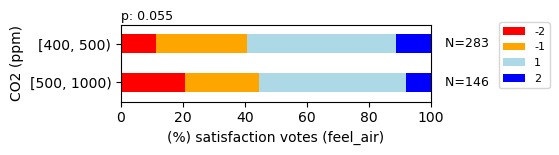


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


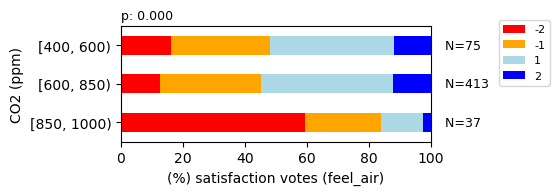

In [478]:
feel_test = 'feel_air'
bin_range = [400, 500, 1000]  #[400,450,500,1000] #np. arange (400, 1000, 100) 
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']=='morning')],labels, bin_range, colors, 'co2_a', feel_test, 'CO2 (ppm)')
bin_range = [400, 600, 850, 1000]
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']!='morning')],labels, bin_range, colors, 'co2_a', feel_test, 'CO2 (ppm)')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


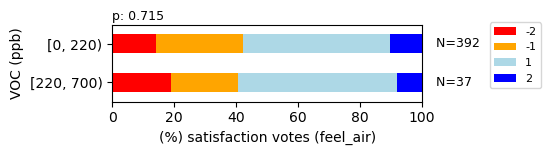


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


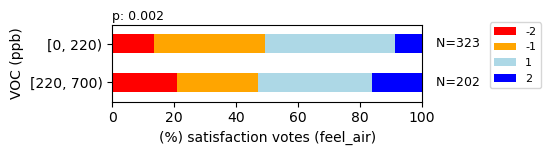

In [477]:
feel_test = 'feel_air'
bin_range = [0,220,700] #np. arange (400, 1000, 100) 
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']=='morning')],labels, bin_range, colors, 'voc_a', feel_test, 'VOC (ppb)')
# bin_range = [0,100,220,400,700]
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']!='morning')],labels, bin_range, colors, 'voc_a', feel_test, 'VOC (ppb)')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


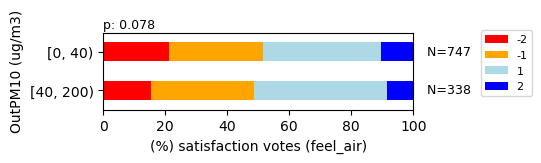


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


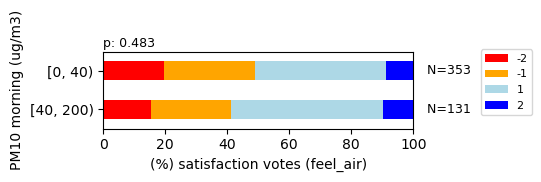


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


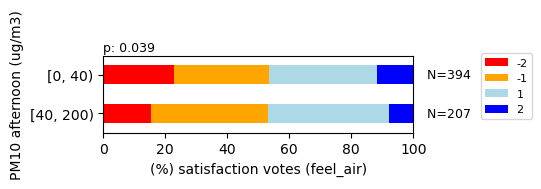

In [623]:
bin_range = [0,40,200] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'pm10_o', feel_test, 'OutPM10 (ug/m3)')
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell')&(combined2['batch']=='morning')],labels, bin_range, colors, 'pm10_o', feel_test, 'PM10 morning (ug/m3)')
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell')&(combined2['batch']!='morning')],labels, bin_range, colors, 'pm10_o', feel_test, 'PM10 afternoon (ug/m3)')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


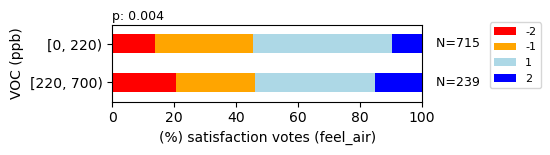


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


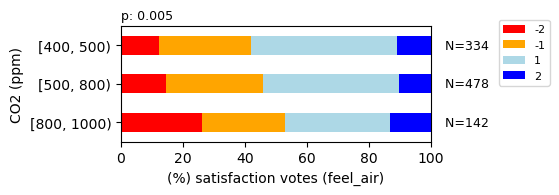


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


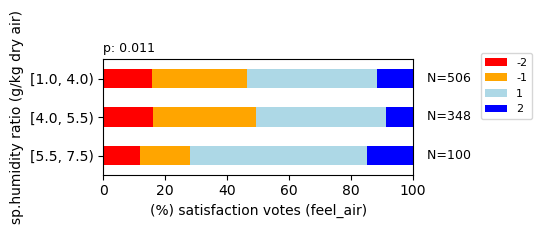


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


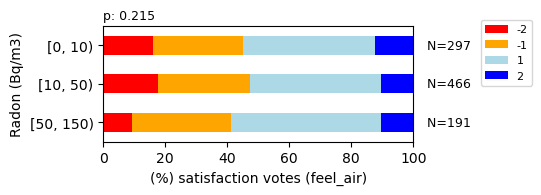


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


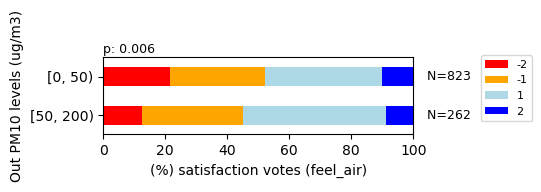


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


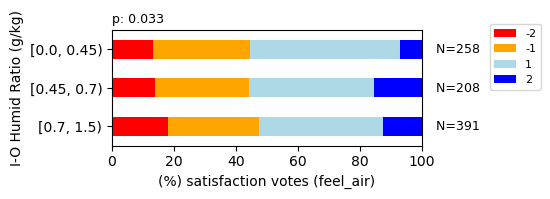

In [624]:
feel_test = 'feel_air'
bin_range = [0, 220,700]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'voc_a', feel_test, 'VOC (ppb)')
bin_range = [400,500, 800,1000] #np. arange (400, 1000, 100) 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'co2_a', feel_test, 'CO2 (ppm)')
bin_range =  [1.0,4,5.5,7.5]   # [2,3.2,3.7, 4.2, 4.7, 6.2]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hura_a', feel_test, 'sp.humidity ratio (g/kg dry air)')
bin_range = [0,10,50,150] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'rdn_a', feel_test, 'Radon (Bq/m3)')
bin_range = [0,50,200] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'pm10_o', feel_test, 'Out PM10 levels (ug/m3)')
bin_range = [0,0.45,0.7,1.5] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hura_d', feel_test, 'I-O Humid Ratio (g/kg)')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


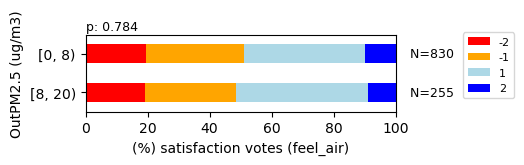


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


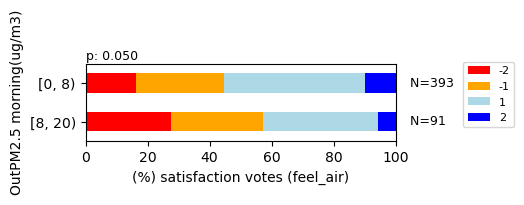


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


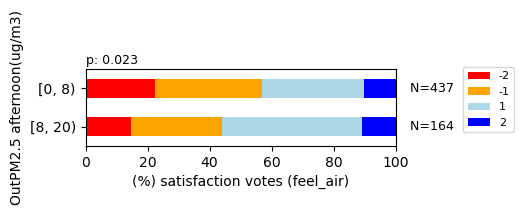

In [625]:
bin_range = [0,8,20] 
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell')],labels, bin_range, colors, 'pm2.5_o', feel_test, 'OutPM2.5 (ug/m3)')
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell')&(combined2['batch']=='morning')],labels, bin_range, colors, 'pm2.5_o', feel_test, 'OutPM2.5 morning(ug/m3)')
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell')&(combined2['batch']!='morning')],labels, bin_range, colors, 'pm2.5_o', feel_test, 'OutPM2.5 afternoon(ug/m3)')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


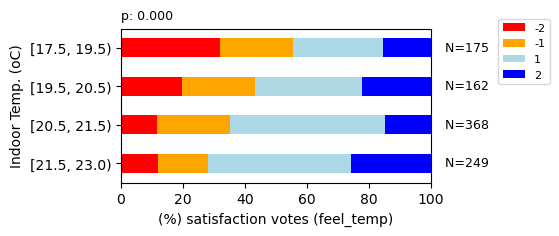


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


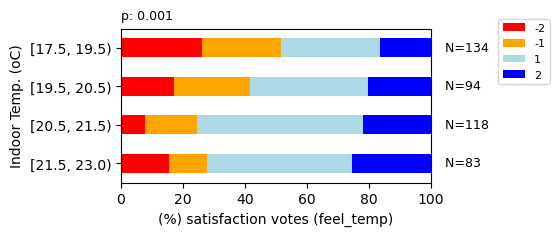


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


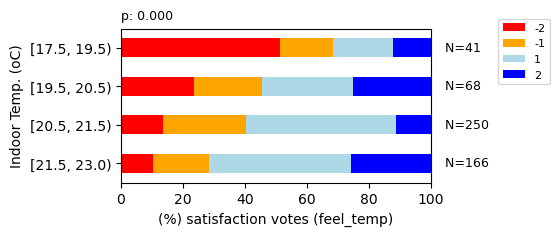

In [662]:
feel_test = 'feel_temp'
bin_range = [17.5,  19.5, 20.5, 21.5,  23 ]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'temp_a', feel_test, 'Indoor Temp. (oC)')

plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']=='morning')],labels, bin_range, colors, 'temp_a', feel_test, 'Indoor Temp. (oC)')

plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']!='morning')],labels, bin_range, colors, 'temp_a', feel_test, 'Indoor Temp. (oC)')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


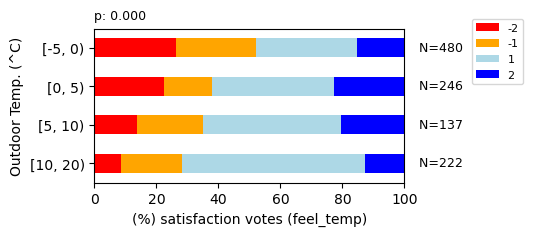


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


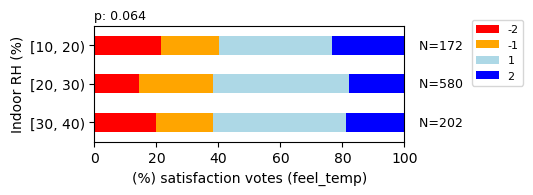


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


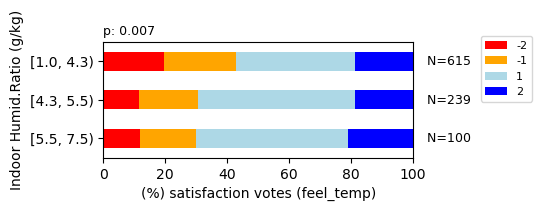


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


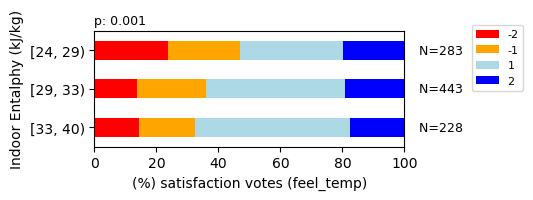


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


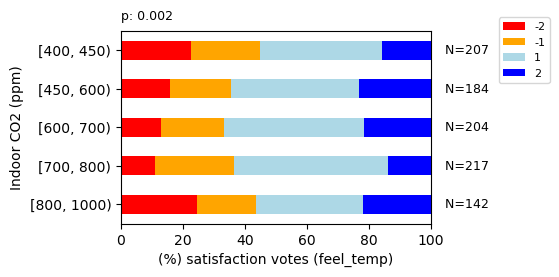


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


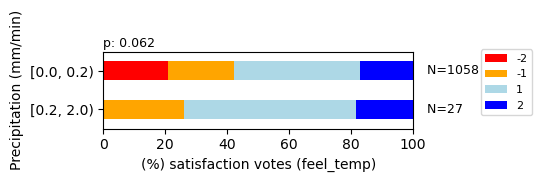


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


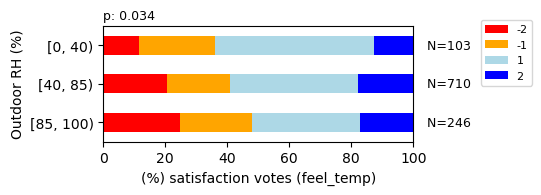


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


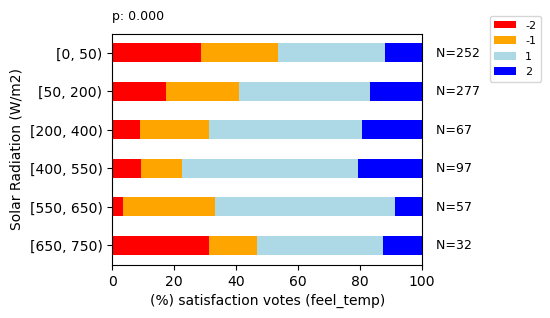

In [677]:
bin_range =  [-5,0,5,10,20]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'], labels, bin_range,colors, 'temp_o', feel_test, 'Outdoor Temp. (^C)')
bin_range =  [10,20,30,40]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'], labels, bin_range,colors, 'rh_a', feel_test, 'Indoor RH (%)')
bin_range = [1.0,4.3,5.5,7.5]
# bin_range = [1.0,3.5,5.5,7.5]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range,colors, 'hura_a', feel_test, 'Indoor Humid.Ratio (g/kg)')
bin_range =  [24,29,33,40]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'], labels, bin_range,colors, 'enth_a', feel_test, 'Indoor Entalphy (kJ/kg)')
bin_range = [400,450,600, 700,800,1000] #np. arange (400, 1000, 100) 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'co2_a', feel_test, 'Indoor CO2 (ppm)')
bin_range = [0,0.2,2] #np. arange (400, 1000, 100) 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'rain_o', feel_test, 'Precipitation (mm/min)')
bin_range =  [0,40,85,100]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'], labels, bin_range,colors, 'rh_o', feel_test, 'Outdoor RH (%)')

bin_range =  [0,50,200,400,550,650,750]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'], labels, bin_range,colors, 'sun_o', feel_test, 'Solar Radiation (W/m2)')


In [630]:
combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']!='morning')]['temp_coldhot'].value_counts()

 0    499
-3     65
-2     14
 2     12
 3      7
 1      3
-1      1
Name: temp_coldhot, dtype: int64

In [ ]:
feel_test = 'temp_coldhot'
bin_range =  [17.5,  19.5, 20.5,  21, 22.5 , 23]
labels_7 = ['cold-3', 'very cool -2', 'cool -1', 'neutral 0', 'warm 1', 'very warm 2', 'hot 3']
color_bin = ['darkblue', 'blue', 'lightblue', 'silver', 'pink', 'red', 'darkred']
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') ],labels_7, bin_range, color_bin, 'temp_a', feel_test, 'temperature (oC)')
bin_range = [17.5, 18.5, 19.5, 20.5,  21, 23]
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']=='morning')],labels_7, bin_range, color_bin, 'temp_a', feel_test, 'temperature (oC)')
# # bin_range = [17.5,  20, 20.5, 21, 21.5, 22.5 ]
# bin_range = [17.5, 18.5, 19.5, 20.5,  21.5,  23]
plot_segmented_bar(combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']!='morning')],labels_7, bin_range, color_bin, 'temp_a', feel_test, 'temperature (oC)')

FEEL BRIGHT


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


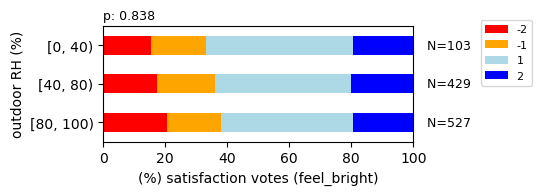

In [711]:
bin_range = [0,40 ,80,100]   # [20,40,60,80,90,100] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'rh_o', feel_test, 'outdoor RH (%)')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


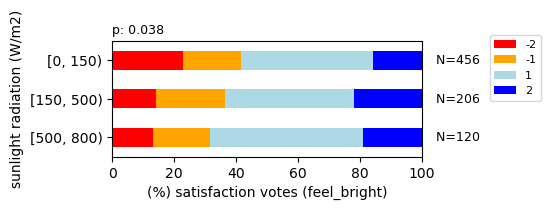


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


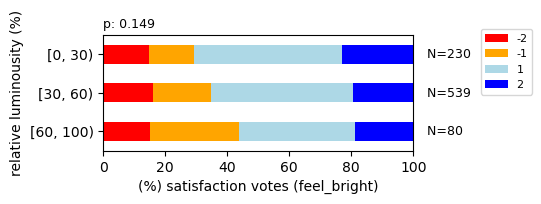


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


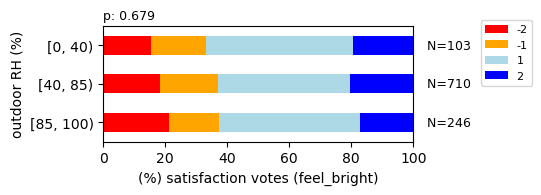


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


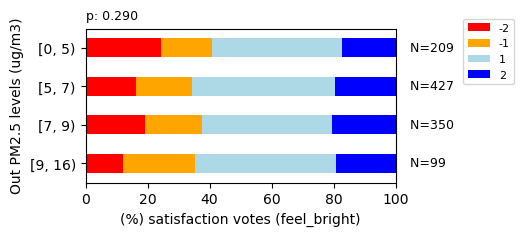


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


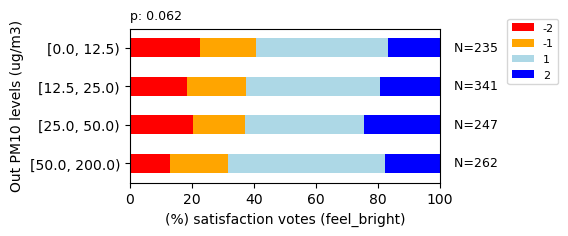

In [706]:
feel_test = 'feel_bright'
bin_range = [0,150, 500, 800] # np.arange(0,660,110)
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'sun_o', feel_test, 'sunlight radiation (W/m2)')
bin_range = [0,30,60,100] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'bright_a', feel_test, 'relative luminousity (%)')
bin_range = [0,40, 85, 100]   # [20,40,60,80,90,100] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'rh_o', feel_test, 'outdoor RH (%)')
bin_range = [0,5,7,9,16] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'pm2.5_o', feel_test, 'Out PM2.5 levels (ug/m3)')
bin_range = [0,12.5,25,50,200] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'pm10_o', feel_test, 'Out PM10 levels (ug/m3)')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


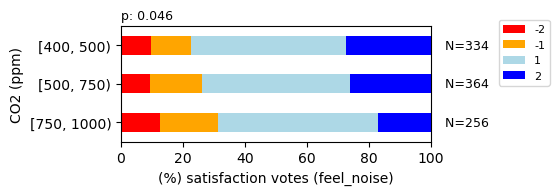


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


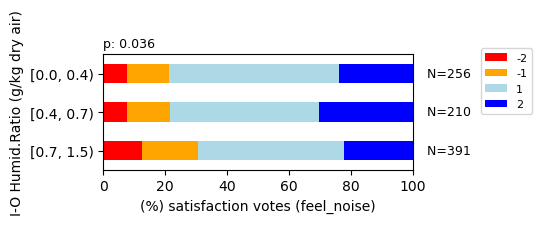


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


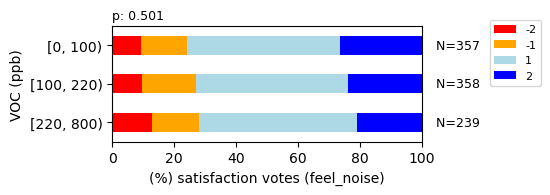


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


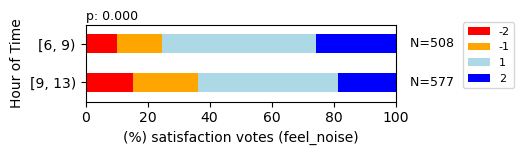

In [24]:
feel_test = 'feel_noise'
# bin_range = [0,62, 90] # np.arange(0,660,110)
# plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'sound_a', feel_test, 'sound pressure (dBA)')
# bin_range = [0,8,24,200] # np.arange(0,660,110)
# plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'sound_a2', feel_test, 'sound pressure (Pa)')
bin_range = [400,500,750,1000]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'co2_a', feel_test, 'CO2 (ppm)')
bin_range = [0,0.4,0.7,1.5] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hura_d', feel_test, 'I-O Humid.Ratio (g/kg dry air)')
bin_range = [0, 100,220,800]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'voc_a', feel_test, 'VOC (ppb)')
bin_range = [6,9,13]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hour', feel_test, 'Hour of Time')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


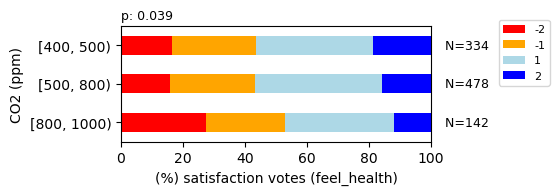


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


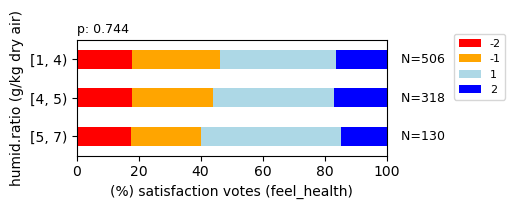


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


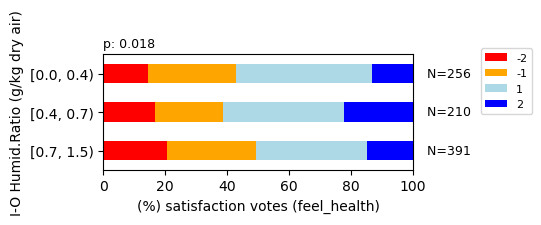


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


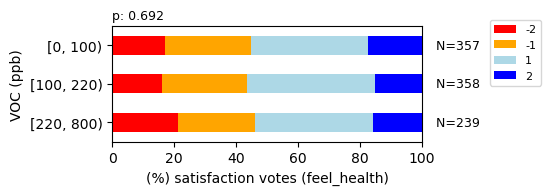


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


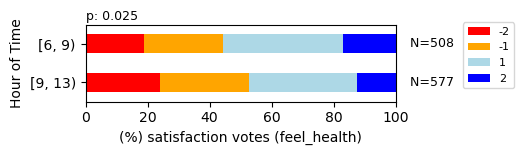

In [25]:
feel_test = 'feel_health'
# bin_range = [0,62, 90] # np.arange(0,660,110)
# plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'sound_a', feel_test, 'sound pressure (dBA)')
# bin_range = [0,8,24,200] # np.arange(0,660,110)
# plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'sound_a2', feel_test, 'sound pressure (Pa)')
bin_range = [400,500,800,1000]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'co2_a', feel_test, 'CO2 (ppm)')
bin_range = [1,4,5,7]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hura_a', feel_test, 'humid.ratio (g/kg dry air)')
bin_range = [0,0.4,0.7,1.5] 
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hura_d', feel_test, 'I-O Humid.Ratio (g/kg dry air)')
bin_range = [0, 100,220,800]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'voc_a', feel_test, 'VOC (ppb)')
bin_range = [6,9,13]
plot_segmented_bar(combined2[combined2['school_id']=='brannfjell'],labels, bin_range, colors, 'hour', feel_test, 'Hour of Time')

In [317]:
def plot_boxplot_votes_by_temperature(df, bin_range, labels, meas_col, feel_col, x_label):
    # Define temperature bins
    df[meas_col+'_bin'] = pd.cut(df[meas_col], bins=bin_range, right=False)

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 6))

    # Create a boxplot with seaborn
    sns.boxenplot(x=meas_col+'_bin', y=feel_col, data=df, palette="RdYlBu")

    # Customize labels and title
    plt.xlabel(x_label)
    plt.ylabel(' Votes')
    plt.xticks(rotation=45)
    plt.legend(labels=labels, bbox_to_anchor=(1.05, 1.1), loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# df = pd.DataFrame({
#     'Temperature': [21, 22, 23, 19, 24, ...],
#     'Thermal_Satisfaction': [-2, 1, 2, -1, 1, ...]
# })



In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_segmented_bar_hue(df, labels, colors, meas_col, feel_col, hue_col, y_label):
    # Calculate bin edges using specified percentiles
    bin_edges = np.arange(df[meas_col].min(), df[meas_col].max(), (df[meas_col].max()-df[meas_col].min() )/6)

    # Create bins for the continuous measurement column based on percentile ranges
    df[meas_col+'_bin'] = pd.cut(df[meas_col], bins=bin_edges, include_lowest=True, right=False)
    
    # Group by the binned measurement, feel column, and hue column, and then unstack
    df_count = df.groupby([meas_col+'_bin', feel_col, hue_col]).size().unstack(level=[1, 2], fill_value=0)
    
    # Calculate the percentage of each category within each bin, considering the hue
    df_percentage = df_count.div(df_count.sum(axis=1), axis=0) * 100
    
    # Reorganize the columns to be hierarchical so they can be plotted
    df_percentage.columns = df_percentage.columns.swaplevel(0, 1)
    df_percentage = df_percentage.sort_index(axis=1, level=0)
    
    plt.figure(figsize=(8, 6))
    
    # Plot the stacked bar chart
    ax = df_percentage.plot(kind='barh', stacked=True,
                            edgecolor='none') #color=[color for sublist in colors.values() for color in sublist]
    
    # Customize labels and title
    ax.set_xlabel('(%) satisfaction votes ' + '(' + feel_col + ')')
    ax.set_ylabel(y_label)
    ax.set_xlim([0, 100])
    ax.invert_yaxis()  # Invert y-axis to match the image
    
    # Add the count annotations to the bars
    for i in range(df_percentage.shape[0]):
        count_sum = df_count.iloc[i].sum()
        ax.text(102, i, f'N={count_sum}', va='center', fontsize=10, color='black')
    
    # Add a legend with custom labels
    custom_labels = [f'{label} ({hue})' for hue in df[hue_col].unique() for label in labels]
    ax.legend(custom_labels, bbox_to_anchor=(1.05, 1.1), loc='upper right', fontsize=12)
    
    plt.tight_layout()  # Adjust layout to fit labels and legend
    plt.show()

# Example usage:
# df = pd.DataFrame(...)  # Your DataFrame creation here
# labels = ['Label1 (Hue=0)', 'Label2 (Hue=1)']  # Replace with your labels
# colors = {0: ['#1f77b4', '#ff7f0e'], 1: ['#2ca02c', '#d62728']}  # Different colors for different hues
# plot_segmented_bar_with_hue(df, labels, colors, 'meas_col', 'feel_col', 'hue_col', 'Y Axis Label')


# ML

In [30]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn import metrics, tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn import svm
from sklearn import neighbors, datasets
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier,StackingRegressor, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor , GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_regression
import xgboost as xg
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SMOTEN

from joblib import dump

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, root_mean_squared_error

In [107]:
def conf_matrix_ML(y_test,y_test_pred, model_ML, name_of_MLalgorithm ):
    plt.figure(figsize= (2,2))
    cm_rf = confusion_matrix(y_test,y_test_pred, labels = model_ML.classes_, )
    disp  = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_ML.classes_)
    disp.plot()
    plt.title('Confussion Matrix : '+str(name_of_MLalgorithm))
    plt.show()
      
def test_split_randomstate ( find_optimum,  x_train, y_train, x_test, y_test):
  ML_test = RandomForestRegressor().fit(x_train, y_train)
  print("Optimum Value : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(ML_test.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_test.score(x_test, y_test)))
  print("__")  


def ML_optimization_process (find_optimum, ML_optimum, x_train, y_train, x_test,y_test):
  print("Optimum Value : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(ML_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_optimum.score(x_test, y_test)))
  print("__")

def ML_optimization_process_CV (find_optimum, ML_optimum, x_train, y_train, x_test,y_test):
  print("Optimum Value : {}".format(find_optimum))
  print("CV score (training): {:.3f}".format((root_mean_squared_error(ML_optimum.predict(x_train).reshape(-1,1), y_train)/np.array(y_train).flatten().mean(axis=0)).round(3)))
  print("CV score (validation): {:.3f}".format((root_mean_squared_error(ML_optimum.predict(x_test).reshape(-1,1), y_test)/np.array(y_test).flatten().mean(axis=0)).round(3)))
  # print("CV score (all): {:.3f}".format((root_mean_squared_error(ML_optimum.predict(X).reshape(-1,1), y)/np.array(y).flatten().mean(axis=0)).round(3)))
  # print("CV score (sahara): {:.3f}".format((root_mean_squared_error(ML_optimum.predict(Xs).reshape(-1,1), y)/np.array(ys).flatten().mean(axis=0)).round(3)))
  print("__")
  
#  np.sqrt(mean_squared_error(y_train,y_train_pred_DTR)).round(3)
def ML_NN_optimization_process (find_optimum1, find_optimum2, ML_optimum, x_train, y_train, x_test,y_test):
  print("Optimum Value : {}".format([find_optimum1,find_optimum2]))
  print("Accuracy score (training): {:.3f}".format(ML_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_optimum.score(x_test, y_test)))
  print("__")

def ML_grid_result (grid_search, ML_optimum, x_train, y_train, x_test,y_test):
  print("Best parameters: ", grid_search.best_params_)
  print("Best score: ", grid_search.best_score_.round(3))
  print("Accuracy score (training): {:.3f}".format(ML_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_optimum.score(x_test, y_test)))

In [32]:
def evaluate_models(models, model_names, X_data, y_data, for_what):
    """
    Evaluate machine learning models and return a DataFrame with performance metrics.

    Parameters:
    - models (list): List of trained model instances.
    - model_names (list): List of names corresponding to the models.
    - X_data (pd.DataFrame): Feature data for evaluation.
    - y_data (pd.Series or np.array): True target values for evaluation.

    Returns:
    - pd.DataFrame: DataFrame containing R-squared, MSE, MAE, and RMSE for each model.
    """
    
    # Initialize lists to store results
    r2_values = []
    mse_values = []
    mae_values = []
    rmse_values = []
    cv_values = []

    # Calculate metrics for each model
    for model in models:
        y_pred = model.predict(X_data)
        
        r2 = r2_score(y_data, y_pred).round(3)
        mse = mean_squared_error(y_data, y_pred).round(3)
        mae = mean_absolute_error(y_data, y_pred).round(3)
        rmse = np.sqrt(mse).round(3)
        cv_value = (rmse/(np.array(y_data).flatten().mean(axis=0))).round(3)
        
        r2_values.append(r2)
        mse_values.append(mse)
        mae_values.append(mae)
        rmse_values.append(rmse)
        cv_values.append(cv_value)

    # Create a DataFrame with the results
    results_df = pd.DataFrame({
        'Model '+for_what : model_names,
        'R2': r2_values,
    #    'MSE': mse_values,
     #   'MAE': mae_values,
        'RMSE': rmse_values,
        'CV' : cv_values
    })

    return results_df

In [33]:
def estimate_predictions(models, model_names, x_train, y_train,names):
    # if len(models) != len(model_names):
    #     raise ValueError("Length of models and model_names must be the same")

    # Initialize the result DataFrame with the actual y_train values
    result_df = pd.DataFrame(np.array(y_train).flatten(), columns=['y_' + names])

    # Add the predicted values for each model
    for model, name in zip(models, model_names):
        result_df[name] = model.predict(x_train).reshape(-1,1)

    return result_df

In [34]:
# Function to compute R², RMSE, and MSE for given true and predicted values
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    cv_value = rmse/y_true.mean(axis=0)
    return r2, rmse, cv_value

def evaluate_predictions(df, y_true_name, condition_name ):
    # Initialize an empty list to store the results
    results = []

    # Loop through each y_pred column and calculate the metrics
    for col in df.columns:
        if col != y_true_name:
            r2, rmse, cv_value = calculate_metrics(df[y_true_name], df[col])
            results.append({condition_name: col, 'R2': r2,'RMSE': rmse,  'CV': cv_value})

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

## Data Criteria

In [199]:
response_rate_min = 0.3
school_to_train = 'brannfjell'
# combined_pivot_mean_percent.columns

for regression input variables

In [200]:
# REGRESSION
target_col_r   =  [  'rd_air'  ]
target_col = target_col_r
focus_plot = 'co2_a'
scene_what = 'C'
batch_selector = 'afternoon'
time_after = '06:00'
ML_category = 'regression'


In [63]:
input_variables_r = airthingsSmall + weather_volda + [ 'hura_d','hour'
                                                   # ,'floor_first'
                                                    ]

In [686]:
# CUSTOM INPUT VARIABLES
input_variables_r = [  #'temp_v', #'temp_f' , 'temp_s','co2_v'
                   #'vent_v',
                      #  'temp_a',
                        # 'bright_a' ,  #'sound_a',
                        'rh_a',
                        'co2_a',
                        'voc_a' ,
                       '' 'rdn_a',
                         'press_a',
                        # 'enth_a',
                       'hura_a',
                      # 'temp_o',
                       'enth_o',
                       #'press_o',
                       'rh_o',
                        'hura_o', 'winds_o',
                        #'floor_first',
                        # 'hour',
                    #  'pm25_a','pm1_a',
                    # 'pm2.5_o',   #'sun_o',
                    # 'pm10_o',
                  'moment',
                    #'hura_d'
                  ] #'bright_a', 'rdn_a', 'temp_v','rh_o', 'winds_o',

input_variables_r

['rh_a',
 'co2_a',
 'voc_a',
 'rdn_a',
 'press_a',
 'hura_a',
 'enth_o',
 'rh_o',
 'hura_o',
 'moment']

For classification input variables

In [204]:
is_col_target = is_col_subquestion.copy()
is_col_target.remove('temp_coldhot')

target_col_c   = ['feel_air']
target_col = target_col_c
what_estimate = 'feel_air'
time_after = '06:00'

ML_category = 'classification'
time_after = '06:00'
input_variables_c = airthingsPlus + weather_data + [ 'hura_d','hour', 'season']  #'floor_first','hura_d',
input_variables_c.remove('pmv')
input_variables_c.remove( 'ppd')
# input_variables_c.remove( 'rdn_a')
input_variables_c.remove( 'winds_o')
input_variables_c.remove( 'season')
input_variables_c

['co2_a',
 'temp_a',
 'rh_a',
 'enth_a',
 'hura_a',
 'voc_a',
 'bright_a',
 'press_a',
 'rdn_a',
 'temp_o',
 'rh_o',
 'rain_o',
 'enth_o',
 'hura_o',
 'press_o',
 'sun_o',
 'pm2.5_o',
 'pm10_o',
 'hura_d',
 'hour']

In [295]:
# CUSTOM INPUT VARIABLES
input_variables_c = [  #'temp_v', #'temp_f' , 'temp_s','co2_v'
                   #'vent_v',
                      #  'temp_a',
                        # 'bright_a' ,  #'sound_a',
                        'rh_a',
                        'co2_a',
                        'voc_a' ,
                       # 'rdn_a',
                         'press_a',
                        # 'enth_a',
                       'hura_a',
                      # 'temp_o',
                       'enth_o',
                       #'press_o',
                       'rh_o',
                        'hura_o',# 'winds_o',
                        #'floor_first',
                        # 'hour',
                    #  'pm25_a','pm1_a',
                    # 'pm2.5_o',   #'sun_o',
                    # 'pm10_o',
                  'moment',
                    #'hura_d'
                  ] #'bright_a', 'rdn_a', 'temp_v','rh_o', 'winds_o',

input_variables_c

['rh_a',
 'co2_a',
 'voc_a',
 'press_a',
 'hura_a',
 'enth_o',
 'rh_o',
 'hura_o',
 'moment']

In [296]:
folder_ML = 'ML'
directory_path = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export  
folder_model = survey_resample + '_' + school_to_train + '_'+ folder_year + '_'
ML_directory = directory_path + '/'+ folder_ML+ '/' + ML_category + '/' + folder_model + str("".join(map(str, target_col))) + '_'  #+scene_what

todays_date = '_20240805'
ML_directory

'C:/Users/azimilga/project/data-ready/all years/all schools/export/ML/classification/10min_brannfjell_all years_feel_air_'

## Data Splitting - Regression

In [783]:
variable_scale = MinMaxScaler() #StandardScaler()
variable_scale2 = MinMaxScaler()
train_percent = 15

66
afternoon    30
morning      29
skip          7
Name: batch, dtype: int64


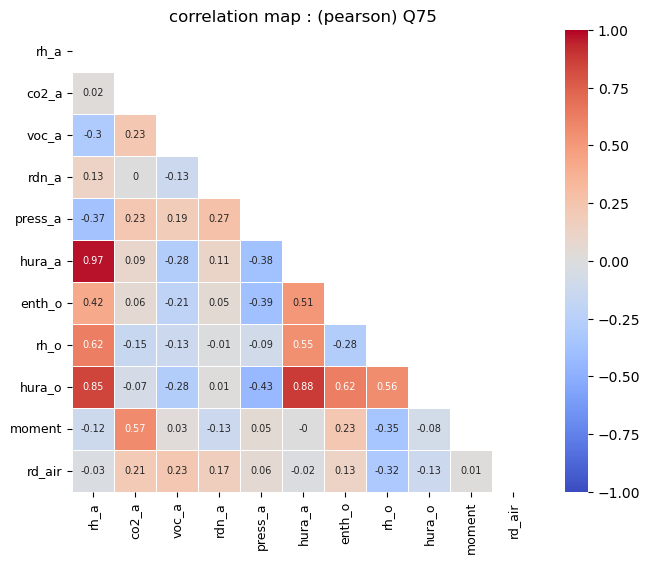

In [1329]:
index_of_data_ML = ['date', 'school_id','room_id'  ,'batch','response_rate' ]
data_to_ML = combined_pivot_mean_percent  
data_ML= data_to_ML[
   (data_to_ML['response_rate']>=response_rate_min) & (data_to_ML['response_rate']<=1.3)
                                #  & (data_to_ML['batch']==batch_selector)
                                    & (data_to_ML['school_id']=='bratteberg')
                                    # & (data_to_ML['batch']!='skip')
                                  # & (data_to_ML['floor_first']==1)
                                ][index_of_data_ML+input_variables_r +target_col].dropna()
data_ML_R = data_ML.drop(index_of_data_ML  , axis=1)
data_ML_R .isna().sum()#.value_counts()  #COUNT NAN VALUES  or NAN CHECKER
print(data_ML['room_id'].count())
print(data_ML['batch'].value_counts())
heatmap_corrvalue(data_ML_R, 'pearson', (8,6), 'Q75', 9)

In [1330]:
data_input = data_ML_R.copy().sort_values(target_col)#.reset_index(drop=True)   #.dropna(subset='temp_a', how='all').copy()#.dropna(subset=[target_col], axis = 0, inplace=True )
# data_input = data_ML.copy() .sort_values(target_col)   .dropna(subset=['temp_a'], how='all')
#xb = data_input.loc[:, ['swc_f', 'swc_r', 'temp_v', 'temp_f', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
X  = data_input.drop(target_col, axis=1).copy() #.drop(columns=['temp_f', 'pm25_a', 'pm1_a'] ) #.loc[:, ['temp_v', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
xb   = variable_scale.fit_transform(X)  #xb.copy() #
yb  = data_input.loc[:, target_col] #Label
X.isna().sum()

rh_a       0
co2_a      0
voc_a      0
rdn_a      0
press_a    0
hura_a     0
enth_o     0
rh_o       0
hura_o     0
moment     0
dtype: int64

In [1335]:
# TRAIN TEST SPLIT _  LINEAR-Reg
x_train, x_test, y_train, y_test = train_test_split(X,np.array(yb).flatten(), test_size = (train_percent/100), 
                                                    shuffle = True)

DTR_reg = LinearRegression()
DTR_reg.fit(x_train, y_train)

y_train_pred_LinReg = DTR_reg.predict(x_train)#.reshape(1,-1)
y_test_pred_LinReg = DTR_reg.predict(x_test)#.reshape(1,-1)
print(DTR_reg.score(x_train, y_train))
print(DTR_reg.score(x_test, y_test))


0.30310814002790964
0.2215606979207373


In [1376]:
# TRAIN TEST SPLIT _  DecisionTree
x_train, x_test, y_train, y_test  = train_test_split(X,np.array(yb).flatten(), test_size = (train_percent/100), 
                                                    shuffle = True, random_state=10)

DTR_reg = DecisionTreeRegressor()
DTR_reg.fit(x_train, y_train)

y_train_pred_LinReg = DTR_reg.predict(x_train)#.reshape(1,-1)
y_test_pred_LinReg = DTR_reg.predict(x_test)#.reshape(1,-1)
print(DTR_reg.score(x_train, y_train))
print(DTR_reg.score(x_test, y_test))


1.0
-2.9969499779217745


In [1349]:
# TRAIN TEST SPLIT _  RandomForest
x_train, x_test, y_train, y_test  = train_test_split(X, np.array(yb).flatten(), test_size = (train_percent/100), 
                                                    shuffle = True)
DTR_reg = RandomForestRegressor()
DTR_reg.fit(x_train, y_train)

y_train_pred_LinReg = DTR_reg.predict(x_train)#.reshape(1,-1)
y_test_pred_LinReg = DTR_reg.predict(x_test)#.reshape(1,-1)
print(DTR_reg.score(x_train, y_train))
print(DTR_reg.score(x_test, y_test))


0.8582813422542241
0.41632658517856136


In [1391]:
# TRAIN TEST SPLIT _  XGBoost
x_train, x_test, y_train, y_test = train_test_split(X, np.array(yb).flatten(), test_size = (train_percent/100), 
                                                    shuffle = True)
DTR_reg = XGBRegressor()
DTR_reg.fit(x_train, y_train)

y_train_pred_LinReg = DTR_reg.predict(x_train)#.reshape(1,-1)
y_test_pred_LinReg = DTR_reg.predict(x_test)#.reshape(1,-1)
print(DTR_reg.score(x_train, y_train))
print(DTR_reg.score(x_test, y_test))


0.9999924389300445
0.393878331654962


In [1260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_pca, yb)

y_pred = model.predict(X_pca)


In [ ]:
number_of_columns=X.shape[1]
# Perform PCA
pca = PCA(n_components=number_of_columns)
principal_components = pca.fit_transform(X_scaled)
X_pca_columns=[f'PC{i}' for i in range(1, number_of_columns + 1)] 
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=X_pca_columns )

# variance plot
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

# Scree Plot
plt.figure(figsize=(4, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

# 2D Scatter Plot
plt.figure(figsize=(4, 3))
sns.scatterplot(x='PC1', y='PC2', data=pc_df)
plt.title('PCA - 2 Principal Components')
plt.show()


# Biplot
plt.figure(figsize=(4, 3))
plt.scatter(pc_df['PC1'], pc_df['PC2'])
for i, column in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid()
plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC2'], pc_df['PC3'])
# for i, column in enumerate(X.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC2')
# plt.ylabel('PC3')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC3'], pc_df['PC4'])
# for i, column in enumerate(X.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC3')
# plt.ylabel('PC4')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC1'], pc_df['PC4'])
# for i, column in enumerate(X.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC1')
# plt.ylabel('PC4')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC5'], pc_df['PC9'])
# for i, column in enumerate(xb.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC5')
# plt.ylabel('PC9')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(yb, y_pred, alpha=0.5)
plt.plot([yb.min(), yb.max()], [yb.min(), yb.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Data Splitting - classification

In [218]:
variable_scale  = MinMaxScaler() #StandardScaler()
variable_scale2 = MinMaxScaler()
train_percent   = 85

In [297]:
index_of_data_ML = [ 'school_id','room_id'  ,'batch', 'moment']
combined2['moment'] = combined2.apply(determine_batch_to_moment, axis=1)
data_ML = combined2[combined2['time']>=time_after][index_of_data_ML + input_variables_c+target_col]#.dropna()#[combined2[room_col_name]!=class4]#[combined2[room_col_name]!=class4]#[combined2[target_col].between(-2,2)][combined2[focus_plot]>=0].copy()#.loc[:, interpolate_col + is_col_main]#.drop(['ppd', 'pmv'], axis=1) .dropna()  #,'temp_s','rain_o','rh_o', #[combined2['time']>time_after]
# data_ML[target_col] = data_ML[target_col].fillna(0)
data_ML = data_ML[data_ML['school_id']=='brannfjell']
# index_of_data_ML.remove('hura_d')
# index_of_data_ML.remove('hour')
# index_of_data_ML.remove('moment')
data_ML_C = data_ML.drop (index_of_data_ML, axis=1).dropna()
data_ML_C .isna().sum()#.value_counts()  #COUNT NAN VALUES  or NAN CHECKER

rh_a        0
co2_a       0
voc_a       0
press_a     0
hura_a      0
enth_o      0
rh_o        0
hura_o      0
feel_air    0
dtype: int64

In [298]:
data_input = data_ML_C #.dropna(subset='temp_a', how='all').copy()#.dropna(subset=[target_col], axis = 0, inplace=True )
# data_input = data_ML.copy() .sort_values([target_col])   .dropna(subset=['temp_a'], how='all')
#xb = data_input.loc[:, ['swc_f', 'swc_r', 'temp_v', 'temp_f', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
xb  = data_input.drop(target_col, axis=1).copy() #.drop(columns=['temp_f', 'pm25_a', 'pm1_a'] ) #.loc[:, ['temp_v', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
x   = variable_scale.fit_transform(xb)  #xb.copy() #
yb  = data_input.loc[:, target_col_c] #Label
xb.isna().sum()

answer_replace01   = {0:0,-1:1, -2:1, 1:0, 2:0}
answer_replace012  = {0:0,-1:1, -2:2, 1:0, 2:0}
answer_replace0123 = {0:0,-1:2, -2:3, 1:1, 2:0}
y = yb.copy() .replace(answer_replace0123)
# y = variable_scale2.fit_transform(y)

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, np.array(y).flatten(), train_size = (train_percent/100), shuffle = True)
#x_train = pd.DataFrame(x_train,  columns = xb.columns)

print("Before oversampling train: ", Counter(y_train))
print("Before oversamplig test: ", Counter(y_test))

Before oversampling train:  Counter({1: 358, 2: 241, 3: 123, 0: 88})
Before oversamplig test:  Counter({1: 57, 2: 45, 3: 25, 0: 17})


In [299]:
# define oversampling  strategy
oversample_over = SMOTE(sampling_strategy='all')
# fit and apply the transform
x_new, y_new = oversample_over.fit_resample(x, np.array(y).flatten())
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, train_size = (train_percent/100), shuffle = True)
print("After oversampling train: ", Counter(y_train ))
print("After oversampling test: " , Counter(y_test ))

After oversampling train:  Counter({1: 356, 2: 352, 3: 352, 0: 351})
After oversampling test:  Counter({0: 64, 3: 63, 2: 63, 1: 59})


In [223]:
# Check the number of unique classes in the target variable
def PCA_LDA_plotter (x_input, y_input):
    num_classes = len(np.unique(y_input))

    # Check the number of features in the dataset
    num_features = x_input.shape[1]

    # If either number of classes or number of features is less than or equal to 1, print an error message
    if num_classes <= 1 or num_features <= 1:
        print("Error: Insufficient data for LDA.")
    else:
        # Standardize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(x_input)

        # Perform PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Perform LDA with the maximum number of components allowed
        n_components_lda = min(X_scaled.shape[1], len(np.unique(y_input)) - 1)
        lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
        X_lda = lda.fit_transform(X_scaled, y_input)

        # Plot PCA results
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_input, cmap='viridis')
        plt.title('PCA')
        plt.xlabel('Principal Component 1')
        plt.legend()
        plt.ylabel('Principal Component 2')

        # Plot LDA results
        plt.subplot(1, 2, 2)
        if n_components_lda > 1:
            plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_input, cmap='viridis')
            plt.title('LDA')
            plt.xlabel('Linear Discriminant 1')
            plt.ylabel('Linear Discriminant 2')
            plt.legend()
        else:
            print("Error: Insufficient data for LDA.")

        plt.tight_layout()
        plt.show()

In [ ]:
PCA_LDA_plotter (x_new, y_new)
# PCA_LDA_plotter (x, y)

# MODELLING 1

### Logistic Regression Classifier Model

In [300]:
# all parameters not specified are set to their defaults
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_train_pred_logreg = logreg.predict(x_train)
y_test_pred_logreg = logreg.predict(x_test)
f1_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3)

train_acc_logreg = accuracy_score(y_train, y_train_pred_logreg)#.round(3)
test_acc_logreg = accuracy_score(y_test, y_test_pred_logreg)#.round(3)
test_precision_logreg = precision_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_logreg =np.sqrt(mean_squared_error(y_test,y_test_pred_logreg))#.round(3)
f1_logreg = f1_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3)

print('Target : ' + str(target_col))
print("Training Accuracy:", train_acc_logreg)
print("Testing Accuracy:", test_acc_logreg)
print("Testing Precision:", test_precision_logreg)
print('RMSE : ', rmse_logreg)
print('f1 score :', f1_logreg)
print(classification_report(y_test, y_test_pred_logreg))

Target : ['feel_air']
Training Accuracy: 0.406094968107725
Testing Accuracy: 0.36947791164658633
Testing Precision: 0.36699433143139004
RMSE :  1.3002934484987745
f1 score : 0.3651010686115667
              precision    recall  f1-score   support

           0       0.40      0.53      0.46        64
           1       0.23      0.20      0.22        59
           2       0.24      0.22      0.23        63
           3       0.58      0.51      0.54        63

    accuracy                           0.37       249
   macro avg       0.36      0.37      0.36       249
weighted avg       0.37      0.37      0.37       249



In [ ]:
print('Target : ' + str(target_col))
conf_matrix_ML( y_test, y_test_pred_logreg, logreg, 'Log.Regression (Testing)' )
conf_matrix_ML( y_train, y_train_pred_logreg, logreg, 'Log.Regression (Training)' )

### Extra Trees Classifier Model

In [228]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34,38,42,55,89,100 #, 120,150,180,144,200,500,700
           ]
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=find_optimum, random_state=10)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.346
Accuracy score (validation): 0.289
__
Optimum Value : 2
Accuracy score (training): 0.415
Accuracy score (validation): 0.353
__
Optimum Value : 3
Accuracy score (training): 0.456
Accuracy score (validation): 0.426
__
Optimum Value : 4
Accuracy score (training): 0.495
Accuracy score (validation): 0.474
__
Optimum Value : 5
Accuracy score (training): 0.522
Accuracy score (validation): 0.470
__
Optimum Value : 8
Accuracy score (training): 0.611
Accuracy score (validation): 0.550
__
Optimum Value : 10
Accuracy score (training): 0.626
Accuracy score (validation): 0.538
__
Optimum Value : 13
Accuracy score (training): 0.639
Accuracy score (validation): 0.562
__
Optimum Value : 21
Accuracy score (training): 0.639
Accuracy score (validation): 0.554
__
Optimum Value : 34
Accuracy score (training): 0.639
Accuracy score (validation): 0.550
__
Optimum Value : 38
Accuracy score (training): 0.639
Accuracy score (validation): 0.550
__
Optimum Value : 

In [229]:
max_depth_use = 21

In [ ]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100,200,400]
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=find_optimum)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

In [231]:
random_use = 1

In [232]:
#optimum CRITERION
lr_list = ['gini','entropy','log_loss']
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use, criterion= find_optimum)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : gini
Accuracy score (training): 0.639
Accuracy score (validation): 0.562
__
Optimum Value : entropy
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : log_loss
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__


In [233]:
criterion_use = 'gini'

In [234]:
#optimum SPLITTER
lr_list = [2,5,10,20,50,100,110,120, 130, 150,250]
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators= find_optimum )
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.639
Accuracy score (validation): 0.546
__
Optimum Value : 5
Accuracy score (training): 0.639
Accuracy score (validation): 0.546
__
Optimum Value : 10
Accuracy score (training): 0.639
Accuracy score (validation): 0.550
__
Optimum Value : 20
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : 50
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : 100
Accuracy score (training): 0.639
Accuracy score (validation): 0.562
__
Optimum Value : 110
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : 120
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : 130
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : 150
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__
Optimum Value : 250
Accuracy score (training): 0.639
Accuracy score (validation): 0.558
__


In [236]:
n_estimator_use = 10

In [237]:
#optimum SPLITTER
lr_list = ['auto', 'sqrt', 'log2']
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators=n_estimator_use, max_features= find_optimum)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

InvalidParameterError: The 'max_features' parameter of ExtraTreesClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [215]:
max_features_use = 'auto'

In [301]:
# Fit decision tree model
ETC = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators=n_estimator_use,
                                    #    max_features= max_features_use 
                                       )
ETC.fit(x_train, y_train)

# Fit decision tree input-output
model_ETC = ETC.fit(x_train, y_train)

In [303]:
# Predict train set labels
y_train_pred_ETC = model_ETC.predict(x_train)
y_test_pred_ETC = model_ETC.predict(x_test)

train_acc_ETC = accuracy_score(y_train, y_train_pred_ETC)#.round(3)
test_acc_ETC = accuracy_score(y_test, y_test_pred_ETC)#.round(3)
test_precision_ETC = precision_score(y_test, y_test_pred_ETC, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_ETC =np.sqrt(mean_squared_error(y_test,y_test_pred_ETC))#.round(3)
f1_ETC = f1_score(y_test, y_test_pred_ETC, average= 'weighted' )#.round(3)

# print('Target : ' + target_col)
print("Training Accuracy:", train_acc_ETC)
print("Testing Accuracy:", test_acc_ETC)
print("Testing Precision:", test_precision_ETC)
print('RMSE : ', rmse_ETC)
print('f1 score :', f1_ETC)
print(classification_report(y_test, y_test_pred_ETC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Extra.Trees.Class":model_ETC.feature_importances_#.round(4),
                                }).sort_values( by="Extra.Trees.Class" ,ascending = False)
data_importance

Training Accuracy: 0.520198440822112
Testing Accuracy: 0.42570281124497994
Testing Precision: 0.4238375495481384
RMSE :  1.2222830701660143
f1 score : 0.42073683869648115
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        64
           1       0.31      0.25      0.28        59
           2       0.31      0.35      0.33        63
           3       0.53      0.65      0.58        63

    accuracy                           0.43       249
   macro avg       0.42      0.42      0.42       249
weighted avg       0.42      0.43      0.42       249



,features,Extra.Trees.Class
0,rh_a,0.166735
6,rh_o,0.133189
2,voc_a,0.131010
1,co2_a,0.130765
3,press_a,0.121303
5,enth_o,0.111213
4,hura_a,0.106754
7,hura_o,0.099031


<Figure size 200x200 with 0 Axes>

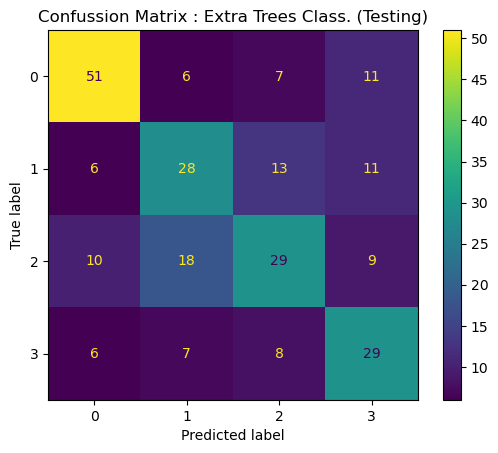

<Figure size 200x200 with 0 Axes>

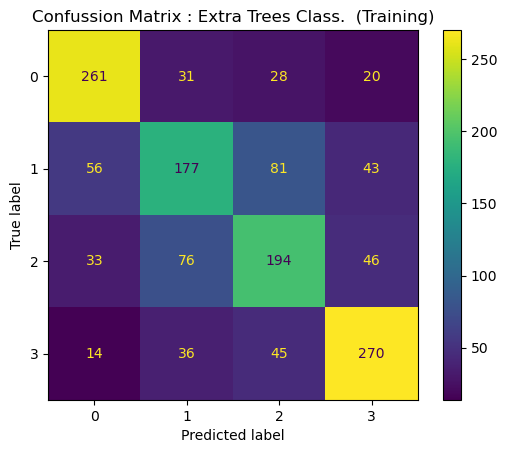

In [240]:
conf_matrix_ML( y_test, y_test_pred_ETC, model_ETC, 'Extra Trees Class. (Testing)' )
conf_matrix_ML( y_train, y_train_pred_ETC, model_ETC, 'Extra Trees Class.  (Training)' )

In [ ]:
# fn = model_ETC.feature_names_in_
# cn= model_ETC.feature_names_in_
# figsize = (n_estimator_use*5,5)

# fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
# for index in range(0, n_estimator_use):
#     tree.plot_tree(model_ETC.estimators_[index],
#                    feature_names = fn,
#                    class_names=target_col,
#                    filled = True,
#                    ax = axes[index]);

#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_ETC_' + str(target_col) + '.png')

In [ ]:
# fn = model_ETC.feature_names_in_
# cn= model_ETC.feature_names_in_
# figsize = (20,10 )
# fig, axes = plt.subplots(figsize = figsize, dpi=800)
# tree.plot_tree(model_ETC.estimators_[0],
#                feature_names = fn,
#                class_names=target_col,
#                filled = True);
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_ETC_' + str(target_col) + '.png')

### Decision Tree Classifier Model

In [304]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,6,7,8,10,13,21,34,42,55,89,100#, 120,150,180,144,200,500,700
           ]
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=find_optimum, random_state=10)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.296
Accuracy score (validation): 0.281
__
Optimum Value : 2
Accuracy score (training): 0.319
Accuracy score (validation): 0.333
__
Optimum Value : 3
Accuracy score (training): 0.324
Accuracy score (validation): 0.321
__
Optimum Value : 4
Accuracy score (training): 0.368
Accuracy score (validation): 0.329
__
Optimum Value : 5
Accuracy score (training): 0.417
Accuracy score (validation): 0.398
__
Optimum Value : 6
Accuracy score (training): 0.442
Accuracy score (validation): 0.418
__
Optimum Value : 7
Accuracy score (training): 0.483
Accuracy score (validation): 0.414
__
Optimum Value : 8
Accuracy score (training): 0.508
Accuracy score (validation): 0.466
__
Optimum Value : 10
Accuracy score (training): 0.578
Accuracy score (validation): 0.498
__
Optimum Value : 13
Accuracy score (training): 0.617
Accuracy score (validation): 0.490
__
Optimum Value : 21
Accuracy score (training): 0.633
Accuracy score (validation): 0.490
__
Optimum Value : 34

In [305]:
max_depth_use = 10

In [306]:
#optimum CRITERION
lr_list = ['gini','entropy','log_loss']
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use, random_state=10, criterion= find_optimum)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : gini
Accuracy score (training): 0.578
Accuracy score (validation): 0.498
__
Optimum Value : entropy
Accuracy score (training): 0.541
Accuracy score (validation): 0.434
__
Optimum Value : log_loss
Accuracy score (training): 0.541
Accuracy score (validation): 0.434
__


In [307]:
criterion_use = 'gini'

In [252]:
#optimum SPLITTER
lr_list = ['best', 'random']
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use, random_state=10,
                                       criterion= criterion_use, splitter=find_optimum)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test, y_test)

Optimum Value : best
Accuracy score (training): 0.639
Accuracy score (validation): 0.554
__
Optimum Value : random
Accuracy score (training): 0.639
Accuracy score (validation): 0.542
__


In [308]:
splitter_use = 'best'

In [309]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100,200,500]
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use,
                                       criterion= criterion_use, splitter=splitter_use, random_state=find_optimum)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test, y_test)


Optimum Value : 1
Accuracy score (training): 0.579
Accuracy score (validation): 0.498
__
Optimum Value : 2
Accuracy score (training): 0.578
Accuracy score (validation): 0.498
__
Optimum Value : 5
Accuracy score (training): 0.579
Accuracy score (validation): 0.498
__
Optimum Value : 10
Accuracy score (training): 0.578
Accuracy score (validation): 0.498
__
Optimum Value : 50
Accuracy score (training): 0.578
Accuracy score (validation): 0.494
__
Optimum Value : 100
Accuracy score (training): 0.579
Accuracy score (validation): 0.494
__
Optimum Value : 200
Accuracy score (training): 0.578
Accuracy score (validation): 0.498
__
Optimum Value : 500
Accuracy score (training): 0.578
Accuracy score (validation): 0.490
__


In [310]:
random_use = 1

In [ ]:
#optimum Max_Feature
lr_list = [1,2,3,5,10,15,20,25,'sqrt', 'log2']
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use,
                                       criterion= criterion_use, splitter=splitter_use, random_state=random_use,
                                       max_features= find_optimum )
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test, y_test)


In [127]:
max_features_use = 2

In [311]:
# Fit decision tree model
DTC = DecisionTreeClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, splitter=splitter_use, 
                                       #max_features= max_features_use 
                                       )
DTC.fit(x_train, y_train)

# Fit decision tree input-output
model_DTC = DTC.fit(x_train, y_train)

In [312]:
# Predict train set labels
y_train_pred_DTC = model_DTC.predict(x_train)
y_test_pred_DTC = model_DTC.predict(x_test)

train_acc_DTC = f1_score(y_train, y_train_pred_DTC, average= 'weighted' )#.round(3)
test_acc_DTC = f1_score(y_test, y_test_pred_DTC, average= 'weighted' )#.round(3)
test_precision_DTC = precision_score(y_test, y_test_pred_DTC, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_DTC =np.sqrt(mean_squared_error(y_test,y_test_pred_DTC))#.round(3)
f1_DTC = f1_score(y_test, y_test_pred_DTC, average= 'weighted' )#.round(3)

print('Target : ' , target_col)
print("Training Accuracy:", train_acc_DTC)
print("Testing Accuracy:", test_acc_DTC)
print("Testing Precision:", test_precision_DTC)
print('RMSE : ', rmse_DTC)
print('f1 score :', f1_DTC)
print(classification_report(y_test, y_test_pred_DTC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Dec.Tree.Class":model_DTC.feature_importances_.round(4),
                                }).sort_values( by="Dec.Tree.Class" ,ascending = False)
data_importance

Target :  ['feel_air']
Training Accuracy: 0.5695366760904292
Testing Accuracy: 0.4794179986934589
Testing Precision: 0.49739026034206757
RMSE :  1.2737699791718116
f1 score : 0.4794179986934589
              precision    recall  f1-score   support

           0       0.48      0.78      0.60        64
           1       0.47      0.32      0.38        59
           2       0.49      0.30      0.37        63
           3       0.55      0.57      0.56        63

    accuracy                           0.50       249
   macro avg       0.50      0.49      0.48       249
weighted avg       0.50      0.50      0.48       249



,features,Dec.Tree.Class
1,co2_a,0.1729
4,hura_a,0.1592
0,rh_a,0.1588
3,press_a,0.1411
2,voc_a,0.1299
6,rh_o,0.1282
5,enth_o,0.0637
7,hura_o,0.0462


<Figure size 200x200 with 0 Axes>

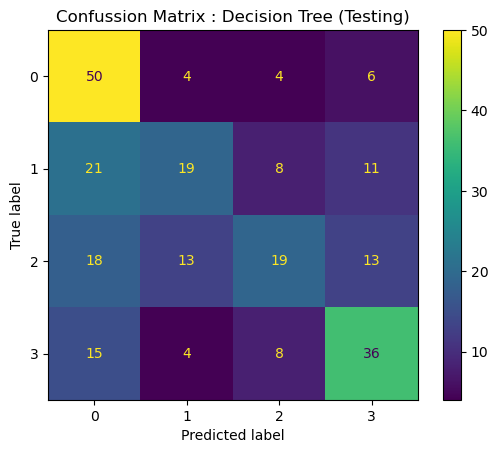

<Figure size 200x200 with 0 Axes>

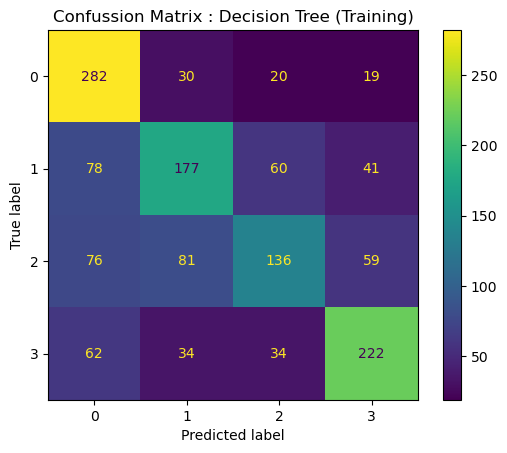

In [313]:
conf_matrix_ML( y_test, y_test_pred_DTC, model_DTC, 'Decision Tree (Testing)' )
conf_matrix_ML( y_train, y_train_pred_DTC, model_DTC, 'Decision Tree (Training)' )

### Random Forest Classifier Model

In [314]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,6,7,8,10,13,21,34,42,55,89,100]
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=find_optimum, random_state=10)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.364
Accuracy score (validation): 0.325
__
Optimum Value : 2
Accuracy score (training): 0.407
Accuracy score (validation): 0.386
__
Optimum Value : 3
Accuracy score (training): 0.449
Accuracy score (validation): 0.410
__
Optimum Value : 4
Accuracy score (training): 0.486
Accuracy score (validation): 0.430
__
Optimum Value : 5
Accuracy score (training): 0.519
Accuracy score (validation): 0.426
__
Optimum Value : 6
Accuracy score (training): 0.540
Accuracy score (validation): 0.462
__
Optimum Value : 7
Accuracy score (training): 0.575
Accuracy score (validation): 0.430
__
Optimum Value : 8
Accuracy score (training): 0.583
Accuracy score (validation): 0.462
__
Optimum Value : 10
Accuracy score (training): 0.613
Accuracy score (validation): 0.486
__
Optimum Value : 13
Accuracy score (training): 0.629
Accuracy score (validation): 0.494
__
Optimum Value : 21
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : 34

In [315]:
max_depth_use = 21

In [316]:
#optimum CRITERION
lr_list = ['gini','entropy','log_loss']
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=10, criterion= find_optimum)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : gini
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : entropy
Accuracy score (training): 0.634
Accuracy score (validation): 0.490
__
Optimum Value : log_loss
Accuracy score (training): 0.634
Accuracy score (validation): 0.490
__


In [317]:
criterion_use = 'gini'

In [318]:
#optimum N_ESTIMATORS

lr_list = [10,25,50,75,100,200,500,1000,1500]
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=10,
                                       criterion= criterion_use, n_estimators=find_optimum)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 10
Accuracy score (training): 0.625
Accuracy score (validation): 0.498
__
Optimum Value : 25
Accuracy score (training): 0.634
Accuracy score (validation): 0.510
__
Optimum Value : 50
Accuracy score (training): 0.634
Accuracy score (validation): 0.490
__
Optimum Value : 75
Accuracy score (training): 0.634
Accuracy score (validation): 0.502
__
Optimum Value : 100
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : 200
Accuracy score (training): 0.634
Accuracy score (validation): 0.498
__
Optimum Value : 500
Accuracy score (training): 0.634
Accuracy score (validation): 0.498
__
Optimum Value : 1000
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : 1500
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__


In [319]:
n_estimator_use = 200

In [ ]:
#optimum SPLITTER
lr_list = [1,2,5,7,10,12,15,'auto', 'sqrt', 'log2']
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=10 ,
                                       criterion= criterion_use, n_estimators = n_estimator_use,
                                       max_features= find_optimum)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

In [323]:
max_features_use = 10

In [324]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100]
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=find_optimum ,
                                       criterion= criterion_use, n_estimators = n_estimator_use,
                                       max_features= max_features_use
                                       )
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.634
Accuracy score (validation): 0.486
__
Optimum Value : 2
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : 5
Accuracy score (training): 0.634
Accuracy score (validation): 0.482
__
Optimum Value : 10
Accuracy score (training): 0.634
Accuracy score (validation): 0.502
__
Optimum Value : 50
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : 100
Accuracy score (training): 0.634
Accuracy score (validation): 0.498
__


In [325]:
random_state_use = 50

In [327]:
# Fit decision tree model
RFC = RandomForestClassifier(max_depth=max_depth_use, random_state=random_state_use ,
                                       criterion= criterion_use, n_estimators = n_estimator_use,
                                    #    max_features= max_features_use
                                       )
RFC.fit(x_train, y_train)

# Fit decision tree input-output
model_RFC = RFC.fit(x_train, y_train)

In [328]:
# Predict train set labels
y_train_pred_RFC = model_RFC.predict(x_train)
y_test_pred_RFC = model_RFC.predict(x_test)

train_acc_RFC = accuracy_score(y_train, y_train_pred_RFC)#.round(3)
test_acc_RFC = accuracy_score(y_test, y_test_pred_RFC)#.round(3)
test_precision_RFC = precision_score(y_test, y_test_pred_RFC, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_RFC =np.sqrt(mean_squared_error(y_test,y_test_pred_RFC))#.round(3)
f1_RFC = f1_score(y_test, y_test_pred_RFC, average= 'weighted' )#.round(3)

print('Target : ' + str(target_col))
print(model_RFC.get_params)
print("Training Accuracy:", train_acc_RFC)
print("Testing Accuracy:", test_acc_RFC)
print("Testing Precision:", test_precision_RFC)
print('RMSE : ', rmse_RFC)
print('f1 score :', f1_RFC)
print(classification_report(y_test, y_test_pred_RFC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "RandomForest.Class":model_RFC.feature_importances_.round(4),
                                }).sort_values( by="RandomForest.Class" ,ascending = False)
data_importance

Target : ['feel_air']
<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=21, n_estimators=200, random_state=50)>
Training Accuracy: 0.6343019135364989
Testing Accuracy: 0.4899598393574297
Testing Precision: 0.4743313730878882
RMSE :  1.2402228067737535
f1 score : 0.4752368274753342
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        64
           1       0.44      0.31      0.36        59
           2       0.37      0.30      0.33        63
           3       0.54      0.65      0.59        63

    accuracy                           0.49       249
   macro avg       0.47      0.49      0.47       249
weighted avg       0.47      0.49      0.48       249



,features,RandomForest.Class
1,co2_a,0.1619
0,rh_a,0.1360
2,voc_a,0.1356
4,hura_a,0.1269
3,press_a,0.1144
6,rh_o,0.1140
5,enth_o,0.1111
7,hura_o,0.1001


<Figure size 200x200 with 0 Axes>

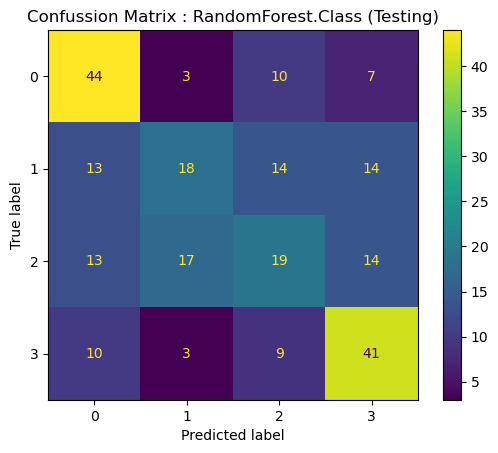

<Figure size 200x200 with 0 Axes>

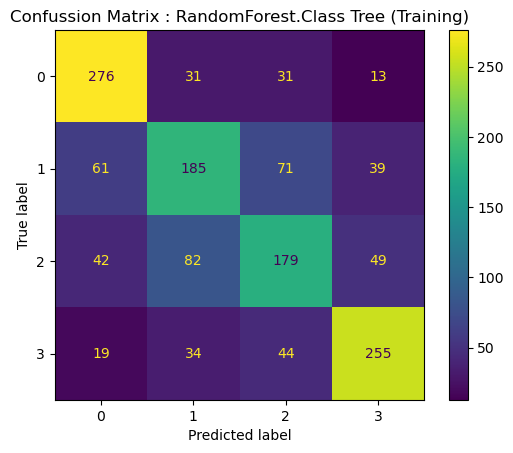

In [329]:
conf_matrix_ML( y_test, y_test_pred_RFC, model_RFC, 'RandomForest.Class (Testing)' )
conf_matrix_ML( y_train, y_train_pred_RFC, model_RFC, 'RandomForest.Class Tree (Training)' )

In [ ]:
fn = model_RFC.feature_names_in_
cn= model_RFC.feature_names_in_
figsize = (n_estimator_use*5,5)

fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
for index in range(0, n_estimator_use):
    tree.plot_tree(model_RFC.estimators_[index],
                   feature_names = fn,
                   class_names=target_col,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_RFC_' + str(target_col) + '.png')

In [ ]:
fn = model_RFC.feature_names_in_
cn= model_RFC.feature_names_in_
figsize = (n_estimator_use*5,5)

fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
for index in range(0, n_estimator_use):
    tree.plot_tree(model_RFC.estimators_[index],
                   feature_names = fn,
                   class_names=target_col,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_RFC_' + str(target_col) + '.png')

### KNN Classifier Model

In [ ]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,18,21,34,55,89,100, 120,150,180,144,200,500]
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.586
Accuracy score (validation): 0.580
__
Optimum Value : 2
Accuracy score (training): 0.564
Accuracy score (validation): 0.504
__
Optimum Value : 3
Accuracy score (training): 0.639
Accuracy score (validation): 0.595
__
Optimum Value : 4
Accuracy score (training): 0.632
Accuracy score (validation): 0.565
__
Optimum Value : 5
Accuracy score (training): 0.636
Accuracy score (validation): 0.588
__
Optimum Value : 8
Accuracy score (training): 0.636
Accuracy score (validation): 0.519
__
Optimum Value : 10
Accuracy score (training): 0.635
Accuracy score (validation): 0.603
__
Optimum Value : 13
Accuracy score (training): 0.634
Accuracy score (validation): 0.588
__
Optimum Value : 18
Accuracy score (training): 0.626
Accuracy score (validation): 0.542
__
Optimum Value : 21
Accuracy score (training): 0.643
Accuracy score (validation): 0.580
__
Optimum Value : 34
Accuracy score (training): 0.613
Accuracy score (validation): 0.580
__
Optimum Value : 

In [ ]:
n_neighbors_use = 10

In [ ]:
#optimum MAX_DEPTH
lr_list = ['uniform', 'distance']
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

In [ ]:
weights_use = 'distance'

In [ ]:
#optimum MAX_DEPTH
lr_list = [ 'ball_tree', 'kd_tree', 'brute']
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = weights_use, algorithm = find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

In [ ]:
algorithm_use = 'ball_tree'

In [ ]:
#optimum LEAF_SIZE
lr_list = [1,2,5,10,20,30,50,80,130,210,440]
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = weights_use,
                                     algorithm = algorithm_use, leaf_size = find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

In [ ]:
leaf_size_use = 210

In [ ]:
# Fit decision tree model
KNN = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = weights_use,
                                     algorithm = algorithm_use, leaf_size = leaf_size_use)
KNN.fit(x_train, y_train)

# Fit decision tree input-output
model_KNN = KNN.fit(x_train, y_train)

In [ ]:
# Predict train set labels
y_train_pred_KNN = model_KNN.predict(x_train)

# Predict test set labels
y_test_pred_KNN = model_KNN.predict(x_test)

train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN).round(3)
test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN).round(3)
test_precision_KNN = precision_score(y_test, y_test_pred_KNN, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_KNN =np.sqrt(mean_squared_error(y_test,y_test_pred_KNN)).round(3)
f1_KNN = f1_score(y_test, y_test_pred_KNN, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_KNN)
print("Testing Accuracy:", test_acc_KNN)
print("Testing Precision:", test_precision_KNN)
print('RMSE : ', rmse_KNN)
print('f1 score :', f1_KNN)
print(classification_report(y_test, y_test_pred_KNN))

conf_matrix_ML(y_test,y_test_pred_KNN, model_KNN, 'KNN Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_KNN, model_KNN, 'KNN Class. (Training)')

### SVM Classifier Model

In [ ]:
#optimum MAX_DEPTH
lr_list = [1,1.25,1.5,2,5,10,50,100,200,500,10000,50000]
for find_optimum in lr_list:
  SVC_optimum = SVC(C = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.635
Accuracy score (validation): 0.534
__
Optimum Value : 1.25
Accuracy score (training): 0.635
Accuracy score (validation): 0.534
__
Optimum Value : 1.5
Accuracy score (training): 0.635
Accuracy score (validation): 0.534
__
Optimum Value : 2
Accuracy score (training): 0.643
Accuracy score (validation): 0.550
__
Optimum Value : 5
Accuracy score (training): 0.651
Accuracy score (validation): 0.611
__
Optimum Value : 10
Accuracy score (training): 0.653
Accuracy score (validation): 0.611
__
Optimum Value : 50
Accuracy score (training): 0.665
Accuracy score (validation): 0.603
__
Optimum Value : 100
Accuracy score (training): 0.669
Accuracy score (validation): 0.595
__
Optimum Value : 200
Accuracy score (training): 0.672
Accuracy score (validation): 0.595
__
Optimum Value : 500
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 10000
Accuracy score (training): 0.674
Accuracy score (validation): 0.588
__
Opti

In [ ]:
C_use = 50000

In [ ]:
#optimum MAX_DEPTH
lr_list = ['linear', 'poly', 'rbf', 'sigmoid']
for find_optimum in lr_list:
  SVC_optimum = SVC(C = C_use, kernel = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
kernel_use = 'poly'

In [ ]:
#optimum MAX_DEPTH
lr_list = [ 1,2,3,4,5,6,7,8,9,10,20,50,100]
for find_optimum in lr_list:
  SVC_optimum = SVC(C = C_use, kernel = kernel_use, degree = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
degree_use = 10

In [ ]:
#optimum MAX_DEPTH
lr_list = ['scale','auto']
for find_optimum in lr_list:
  SVC_optimum = SVC(C = C_use, kernel = kernel_use, degree = degree_use, gamma = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
gamma_use = 'auto'

In [ ]:
# Fit decision tree model
SVC = SVC(C = C_use, kernel = kernel_use, degree = degree_use, gamma = gamma_use)
SVC.fit(x_train, y_train)

# Fit decision tree input-output
model_SVC = SVC.fit(x_train, y_train)

In [ ]:
# Predict train set labels
y_train_pred_SVC = model_SVC.predict(x_train)

# Predict test set labels
y_test_pred_SVC = model_SVC.predict(x_test)

train_acc_SVC = accuracy_score(y_train, y_train_pred_SVC).round(3)
test_acc_SVC = accuracy_score(y_test, y_test_pred_SVC).round(3)
test_precision_SVC = precision_score(y_test, y_test_pred_SVC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_SVC =np.sqrt(mean_squared_error(y_test,y_test_pred_SVC)).round(3)
f1_SVC = f1_score(y_test, y_test_pred_SVC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_SVC)
print("Testing Accuracy:", test_acc_SVC)
print("Testing Precision:", test_precision_SVC)
print('RMSE : ', rmse_SVC)
print('f1 score :', f1_SVC)
print(classification_report(y_test, y_test_pred_SVC))

conf_matrix_ML(y_test,y_test_pred_SVC, model_SVC, 'Support Vector Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_SVC, model_SVC, 'Support Vector Class. (Training)')

### Gradient Boost Classifier

In [330]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34]
for find_optimum in lr_list:
  RFC_optimum = GradientBoostingClassifier(max_depth=find_optimum, random_state=10)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.486
Accuracy score (validation): 0.450
__
Optimum Value : 2
Accuracy score (training): 0.575
Accuracy score (validation): 0.498
__
Optimum Value : 3
Accuracy score (training): 0.607
Accuracy score (validation): 0.482
__
Optimum Value : 4
Accuracy score (training): 0.629
Accuracy score (validation): 0.490
__
Optimum Value : 5
Accuracy score (training): 0.634
Accuracy score (validation): 0.506
__
Optimum Value : 8
Accuracy score (training): 0.634
Accuracy score (validation): 0.506
__
Optimum Value : 10
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__
Optimum Value : 13
Accuracy score (training): 0.634
Accuracy score (validation): 0.510
__
Optimum Value : 21
Accuracy score (training): 0.634
Accuracy score (validation): 0.510
__
Optimum Value : 34
Accuracy score (training): 0.634
Accuracy score (validation): 0.506
__


In [331]:
max_depth_use = 10

In [ ]:
#optimum LOSS_FUNCTION
lr_list = ['log_loss', 'exponential']
for find_optimum in lr_list:
  GBC_optimum = GradientBoostingClassifier(max_depth=max_depth_use , loss=find_optimum, random_state=10)
  GBC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBC_optimum, x_train, y_train, x_test,y_test)

In [333]:
loss_use = 'log_loss'

In [ ]:
#optimum LEARNING_RATE
lr_list = [0.01,0.05,0.1,0.25,0.6,1]
for find_optimum in lr_list:
  GBC_optimum = GradientBoostingClassifier(loss=loss_use, learning_rate= find_optimum,  random_state=10)
  GBC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBC_optimum, x_train, y_train, x_test,y_test)

In [335]:
learning_rate_use = 0.25

In [336]:
#optimum N_ESTIMATOR
lr_list = [2,5,10,25,50,75,100,200]
for find_optimum in lr_list:
  GBC_optimum = GradientBoostingClassifier(loss=loss_use, learning_rate= learning_rate_use , n_estimators= find_optimum,  random_state=10)
  GBC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.439
Accuracy score (validation): 0.361
__
Optimum Value : 5
Accuracy score (training): 0.473
Accuracy score (validation): 0.450
__
Optimum Value : 10
Accuracy score (training): 0.544
Accuracy score (validation): 0.450
__
Optimum Value : 25
Accuracy score (training): 0.594
Accuracy score (validation): 0.482
__
Optimum Value : 50
Accuracy score (training): 0.622
Accuracy score (validation): 0.486
__
Optimum Value : 75
Accuracy score (training): 0.632
Accuracy score (validation): 0.478
__
Optimum Value : 100
Accuracy score (training): 0.633
Accuracy score (validation): 0.490
__
Optimum Value : 200
Accuracy score (training): 0.634
Accuracy score (validation): 0.494
__


In [337]:
n_estimator_use = 50

In [338]:
# Fit decision tree model
model_fit = GradientBoostingClassifier(max_depth=max_depth_use, random_state=random_state_use , n_estimators=n_estimator_use, learning_rate=learning_rate_use
                                       )

# Fit decision tree input-output
model_GBC = model_fit.fit(x_train, y_train)

Target : ['feel_air']
Training Accuracy: 0.6343019135364989
Testing Accuracy: 0.4939759036144578
Testing Precision: 0.4821200244570835
f1 score : 0.4815037480771225
RMSE :  1.2418408411301327
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        64
           1       0.48      0.36      0.41        59
           2       0.38      0.30      0.34        63
           3       0.53      0.60      0.56        63

    accuracy                           0.49       249
   macro avg       0.48      0.49      0.48       249
weighted avg       0.48      0.49      0.48       249



<Figure size 200x200 with 0 Axes>

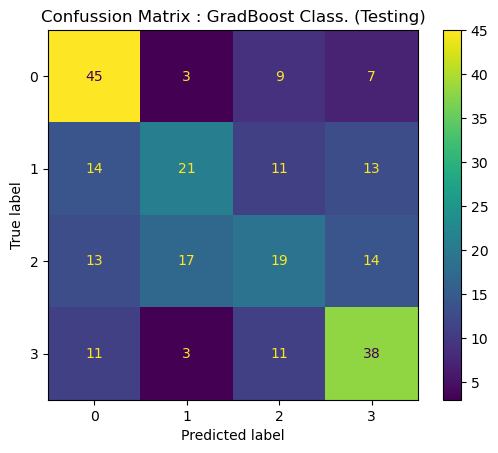

<Figure size 200x200 with 0 Axes>

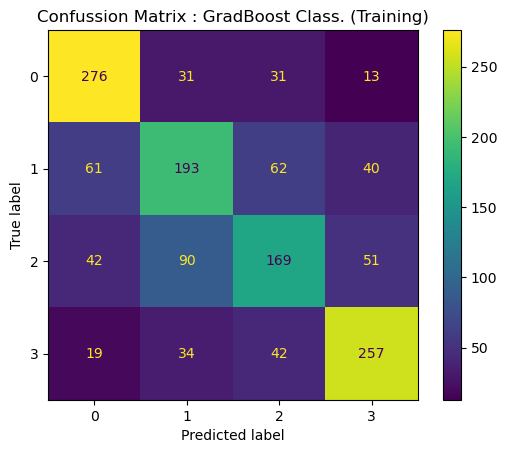

In [339]:
y_train_pred_GBC = model_GBC.predict(x_train)
y_test_pred_GBC = model_GBC.predict(x_test)

train_acc_GBC = accuracy_score(y_train, y_train_pred_GBC)#.round(3)
test_acc_GBC = accuracy_score(y_test, y_test_pred_GBC)#.round(3)
test_precision_GBC = precision_score(y_test, y_test_pred_GBC, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_GBC = f1_score(y_test,y_test_pred_GBC, average= 'weighted' )#.round(3)
rmse_GBC =np.sqrt(mean_squared_error(y_test,y_test_pred_GBC))#.round(3)

print('Target : ' + str(target_col))
print("Training Accuracy:", train_acc_GBC)
print("Testing Accuracy:", test_acc_GBC)
print("Testing Precision:", test_precision_GBC)
print('f1 score :', f1_GBC)
print('RMSE : ', rmse_GBC)
print(classification_report(y_test, y_test_pred_GBC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "GradBoost.Class":model_GBC.feature_importances_.round(4),
                                }).sort_values(by='features',ascending = False)
data_importance

conf_matrix_ML(y_test,y_test_pred_GBC, model_GBC, 'GradBoost Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_GBC, model_GBC, 'GradBoost Class. (Training)')

### XGBoost Classifier

In [ ]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=find_optimum, random_state= 10)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__
Optimum Value : 2
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__
Optimum Value : 3
Accuracy score (training): 0.664
Accuracy score (validation): 0.618
__
Optimum Value : 4
Accuracy score (training): 0.668
Accuracy score (validation): 0.603
__
Optimum Value : 5
Accuracy score (training): 0.666
Accuracy score (validation): 0.595
__
Optimum Value : 8
Accuracy score (training): 0.669
Accuracy score (validation): 0.611
__
Optimum Value : 10
Accuracy score (training): 0.670
Accuracy score (validation): 0.603
__
Optimum Value : 13
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 21
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 34
Accuracy score (training): 0.674
Accuracy score (validation): 0.588
__
Optimum Value : 42
Accuracy score (training): 0.674
Accuracy score (validation): 0.595
__
Optimum Value : 

In [ ]:
n_estimators_use = 8

In [ ]:
#optimum MAX_DEPTH
lr_list = [0.01,0.05,0.1,0.25,0.6,1]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = find_optimum, random_state= 10)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 0.01
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__
Optimum Value : 0.05
Accuracy score (training): 0.665
Accuracy score (validation): 0.611
__
Optimum Value : 0.1
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 0.25
Accuracy score (training): 0.668
Accuracy score (validation): 0.603
__
Optimum Value : 0.6
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 1
Accuracy score (training): 0.674
Accuracy score (validation): 0.595
__


In [ ]:
learning_rate_use = 0.1

In [ ]:
#optimum MAX_DEPTH
lr_list = [2,3,5,6,7,8,10,12,15,20,25,50,100,150,200]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = learning_rate_use,
                                 max_depth=find_optimum, random_state= 10)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.620
Accuracy score (validation): 0.557
__
Optimum Value : 3
Accuracy score (training): 0.653
Accuracy score (validation): 0.580
__
Optimum Value : 5
Accuracy score (training): 0.664
Accuracy score (validation): 0.573
__
Optimum Value : 6
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 7
Accuracy score (training): 0.668
Accuracy score (validation): 0.588
__
Optimum Value : 8
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 10
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 12
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 15
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 20
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 25
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 

In [ ]:
max_depth_use = 6

In [ ]:
#optimum MAX_DEPTH
lr_list = [1,2,5,10,50,100]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = learning_rate_use,
                                 max_depth=max_depth_use, random_state= find_optimum)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 2
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 5
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 10
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 50
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 100
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__


In [ ]:
random_state_use = 1

In [ ]:
# Fit decision tree model
XGBC = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = learning_rate_use,
                                 max_depth=max_depth_use, random_state= find_optimum)
XGBC.fit(x_train, y_train)

model_XGBC = XGBC.fit(x_train, y_train)

In [ ]:
y_train_pred_XGBC = model_XGBC.predict(x_train)
y_test_pred_XGBC = model_XGBC.predict(x_test)

train_acc_XGBC = accuracy_score(y_train, y_train_pred_XGBC).round(3)
test_acc_XGBC = accuracy_score(y_test, y_test_pred_XGBC).round(3)
test_precision_XGBC = precision_score(y_test, y_test_pred_XGBC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_XGBC = f1_score(y_test, y_test_pred_XGBC, average= 'weighted' ).round(3)
rmse_XGBC =np.sqrt(mean_squared_error(y_test,y_test_pred_XGBC)).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_XGBC)
print("Testing Accuracy:", test_acc_XGBC)
print("Testing Precision:", test_precision_XGBC)
print('f1 score :', f1_XGBC)
print('RMSE : ', rmse_XGBC)
print(classification_report(y_test, y_test_pred_XGBC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "model_XGBC":model_XGBC.feature_importances_.round(4),
                                })#.sort_values(ascending = False)
data_importance

conf_matrix_ML(y_test,y_test_pred_XGBC, model_XGBC, 'XGBoost Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_XGBC, model_XGBC, 'XGBoost Class. (Training)')

### MLP Classifier

In [ ]:
#optimum HIDDEN LAYER
lr_list = [6,12,24,50,75,100,150,200,300,400,600,800,1200]
lr_list2 = [6,12,24,50,75,100,200,300,400]
for find_optimum1  in lr_list :
  for find_optimum2 in lr_list2 :
    MLP_optimum = MLPClassifier(hidden_layer_sizes=(find_optimum, find_optimum2),max_iter=500)
    MLP_optimum.fit(x_train, y_train)
    ML_NN_optimization_process (find_optimum, find_optimum2, MLP_optimum, x_train, y_train, x_test,y_test)

Optimum Value : [500, 6]
Accuracy score (training): 0.649
Accuracy score (validation): 0.573
__
Optimum Value : [500, 12]
Accuracy score (training): 0.642
Accuracy score (validation): 0.565
__
Optimum Value : [500, 24]
Accuracy score (training): 0.658
Accuracy score (validation): 0.557
__
Optimum Value : [500, 50]
Accuracy score (training): 0.647
Accuracy score (validation): 0.595
__
Optimum Value : [500, 75]
Accuracy score (training): 0.645
Accuracy score (validation): 0.565
__
Optimum Value : [500, 100]
Accuracy score (training): 0.655
Accuracy score (validation): 0.580
__
Optimum Value : [500, 200]
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__


In [ ]:
hidden_layer_sizes_use = (236, 136)

In [ ]:
#optimum ACTIVATION FUNCTION
lr_list = ['relu',
            'logistic', 'tanh',
           'identity'#, 'softmax'
           ]
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, activation= find_optimum, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
activation_use = 'tanh'

In [ ]:
#optimum SOLVER
lr_list = ['adam', 'sgd','lbfgs']
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= find_optimum,
                              activation= activation_use, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
solver_use = 'lbfgs'

In [ ]:
#optimum LEARNING RATE
lr_list = ['constant','invscaling','adaptive']
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= solver_use,
                              activation= activation_use, learning_rate= find_optimum, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
learning_rate_use = 'invscaling'

In [ ]:
#optimum ALPHA
lr_list = [ 0.01,0.1]
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= solver_use,
                              activation= activation_use, learning_rate= learning_rate_use, alpha=find_optimum, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
alpha_use = 0.01

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= solver_use,
                              activation= activation_use, learning_rate= learning_rate_use, alpha=alpha_use, max_iter=1000)
model_MLPC = MLPC.fit(x_train, y_train)

In [ ]:
y_train_pred_MLPC = model_MLPC.predict(x_train)
y_test_pred_MLPC = model_MLPC.predict(x_test)
train_acc_MLPC = accuracy_score(y_train, y_train_pred_MLPC).round(3)
test_acc_MLPC = accuracy_score(y_test, y_test_pred_MLPC).round(3)
test_precision_MLPC = precision_score(y_test, y_test_pred_MLPC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_MLPC =np.sqrt(mean_squared_error(y_test,y_test_pred_MLPC)).round(3)
f1_MLPC = f1_score(y_test, y_test_pred_MLPC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_MLPC)
print("Testing Accuracy:", test_acc_MLPC)
print("Testing Precision:", test_precision_MLPC)
print('RMSE : ', rmse_MLPC)
print('f1 score :', f1_MLPC)
print(classification_report(y_test, y_test_pred_MLPC))

conf_matrix_ML(y_test,y_test_pred_MLPC, model_MLPC, 'MLPC Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_MLPC, model_MLPC, 'MLPC Class. (Training)')

In [ ]:
# Extract coefs_ and intercepts_
coefs_show = model_MLPC.coefs_
intercepts_show = model_MLPC.intercepts_

# Create DataFrame for coefficients
coef_df_list = []
for i, coef_matrix in enumerate(coefs_show):
    layer_df = pd.DataFrame(coef_matrix, columns=[f'Layer_{i+1}_Neuron_{j+1}' for j in range(coef_matrix.shape[1])])
    layer_df['Input_Variable'] = xb.columns if i == 0 else [f'Layer_{i}_Neuron_{j+1}' for j in range(coefs_show[i-1].shape[1])]
    coef_df_list.append(layer_df.set_index('Input_Variable'))

# Combine coefficients into a single DataFrame
MLPC_coef_df = pd.concat(coef_df_list, axis=1)

# Create DataFrame for intercepts
intercept_df_list = []
for i, intercept_vector in enumerate(intercepts_show):
    intercept_df = pd.DataFrame(intercept_vector, columns=[f'Intercept_Layer_{i+1}'])
    intercept_df['Neuron'] = [f'Layer_{i+1}_Neuron_{j+1}' for j in range(len(intercept_vector))]
    intercept_df_list.append(intercept_df.set_index('Neuron'))

# Combine intercepts into a single DataFrame
MLPC_intercept_df = pd.concat(intercept_df_list, axis=0)

### Classification ML - Review

In [340]:
data = np.array([['Algorithm', 'Train Acc', 'Test ACC', 'Test Precision', 'f1_score', 'RMSE'],
                ['Log.Regression', train_acc_logreg, test_acc_logreg, test_precision_logreg, f1_logreg, rmse_logreg],
                ['Decision Tree', train_acc_DTC, test_acc_DTC, test_precision_DTC, f1_DTC,  rmse_DTC],
                ['Extra Trees', train_acc_ETC, test_acc_ETC, test_precision_ETC, f1_ETC,  rmse_ETC],
                #['Gaussian Process', train_acc_GPC, test_acc_GPC, test_precision_GPC, f1_GPC, rmse_GPC],
                #['K-Nearest N', train_acc_KNN, test_acc_KNN, test_precision_KNN, f1_KNN,  rmse_KNN],
                #['Support Vector', train_acc_SVC, test_acc_SVC, test_precision_SVC, f1_SVC,  rmse_SVC],
                ['Random Forest', train_acc_RFC, test_acc_RFC, test_precision_RFC, f1_RFC,  rmse_RFC],
                # ['XGBoost', train_acc_XGBC, test_acc_XGBC, test_precision_XGBC,   f1_XGBC,   rmse_XGBC],
                ['GradBoost', train_acc_GBC, test_acc_GBC, test_precision_GBC,   f1_GBC,   rmse_GBC],
                # ['MultiLayer NN', train_acc_MLPC, test_acc_MLPC, test_precision_MLPC, f1_MLPC,  rmse_MLPC],
                 ])

table_classification_performance = pd.DataFrame(data=data[1:, 1:],
                     index = data[1:,0],
                     columns=(data[0,1:])).sort_values('Test Precision', ascending=False).astype(float).round(4)
print('Target : ' + str(target_col))
table_classification_performance    #.drop(['Test Precision'], axis=1)

Target : ['feel_air']


,Train Acc,Test ACC,Test Precision,f1_score,RMSE
Decision Tree,0.5695,0.4794,0.4974,0.4794,1.2738
GradBoost,0.6343,0.4940,0.4821,0.4815,1.2418
Random Forest,0.6343,0.4900,0.4743,0.4752,1.2402
Extra Trees,0.5202,0.4257,0.4238,0.4207,1.2223
Log.Regression,0.4061,0.3695,0.3670,0.3651,1.3003


In [341]:
data_importance = pd.DataFrame({"features" : xb.columns,
                                
                                #'Support Vector' : model_SVC.coef_.flatten().round(4),
                                 "Dec.Tree.Class":model_DTC.feature_importances_.round(4),
                                 "Extra.Trees.Class":model_ETC.feature_importances_.round(4),
                                 "RanFor.Class" : model_RFC.feature_importances_.round(4),
                                "GradBoost.Class": model_GBC.feature_importances_.round(4),
                                # "XGBoost.Class": model_XGBC.feature_importances_.round(4),
 #                               "AdaBoost.Class": model_ADABC.feature_importances_ .round(4)
                                #  'Log.Regress' : logreg.coef_.flatten().round(4),
                                }).sort_values('RanFor.Class', ascending = False).set_index("features")
print('Target : ' + str(target_col))
data_importance

Target : ['feel_air']


,Dec.Tree.Class,Extra.Trees.Class,RanFor.Class,GradBoost.Class
features,,,,
co2_a,0.1729,0.1308,0.1619,0.1886
rh_a,0.1588,0.1667,0.1360,0.1529
voc_a,0.1299,0.1310,0.1356,0.1553
hura_a,0.1592,0.1068,0.1269,0.0861
press_a,0.1411,0.1213,0.1144,0.1176
rh_o,0.1282,0.1332,0.1140,0.1243
enth_o,0.0637,0.1112,0.1111,0.1178
hura_o,0.0462,0.0990,0.1001,0.0574


In [342]:
train_result = pd.DataFrame({"y_train" : y_train,
                             "Linear Class.":y_train_pred_logreg.flatten(),
                                # "SV Class.":y_train_pred_SVC.flatten(),
                                "Dec.Tree Class." : y_train_pred_DTC.flatten(),
                                "RandForest Class.": y_train_pred_RFC.flatten(),
                                "Extra Trees Class.": y_train_pred_ETC.flatten(), 
                                # "GradBoost Class.":y_train_pred_GBC.flatten(),
                                # "XGBoost Class.":y_train_pred_XGBC.flatten(),
                                # "MLP Class.": y_train_pred_MLPC.flatten()
                                }
                               )

test_result = pd.DataFrame({"y_test" : y_test,
                            "Linear Class.":y_test_pred_logreg.flatten(), 
                            # "SV Class.":y_test_pred_SVC.flatten(),
                            "Dec.Tree Class." : y_test_pred_DTC.flatten(),
                            "RandForest Class.": y_test_pred_RFC.flatten(),
                            "Extra Trees Class.": y_test_pred_ETC.flatten(), 
                            # "GradBoost Reg.":y_test_pred_GBC.flatten(),
                            # "XGBoost Reg.":y_test_pred_XGBC.flatten(),
                            # "MLP Class.": y_test_pred_MLPC.flatten()
                                }
                               )

In [198]:
ML_directory

'C:/Users/azimilga/project/data-ready/all years/all schools/export/ML/classification/10min_all schools_all years_feel_air_'

In [343]:
import joblib
#Loading back the model for the app#saving the model for the app
joblib.dump(logreg,     ML_directory + '_Lin_reg' + '.joblib')
# joblib.dump(model_GPR,  ML_directory + '_model_GPC' + '.joblib')
joblib.dump(model_ETC,  ML_directory +  '_model_ETC' + '.joblib')
joblib.dump(model_DTC,  ML_directory +  '_model_DTC' + '.joblib')
joblib.dump(model_RFC,  ML_directory +  '_model_RFC' + '.joblib')
# joblib.dump(model_KNN,  ML_directory +  '_model_KNC' + '.joblib')
joblib.dump(model_GBC,  ML_directory +   '_model_GBC' + '.joblib')
# joblib.dump(model_XGBC, ML_directory +  '_model_XGBC' + '.joblib')


with pd.ExcelWriter(ML_directory+ 'class review.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    train_result.to_excel(writer, sheet_name = 'train_result', index=True) 
    test_result.to_excel(writer, sheet_name = 'test_result', index=True) 
    data_ML_C.describe().to_excel(writer, sheet_name = 'df_description', index=True) 
    table_classification_performance.to_excel(writer, sheet_name = 'ML_perform', index=True) 
    data_importance.to_excel(writer, sheet_name = 'data_imp', index=True)

In [169]:
def features_plotter (df):
    df.plot(kind='barh', stacked=False, figsize=(6, 4))
    # Customize labels and title
    plt.ylabel('measured IAQ parameters')
    plt.xlabel('(Cummulative) feature of importances')
    plt.title('ML Result : importances of features')

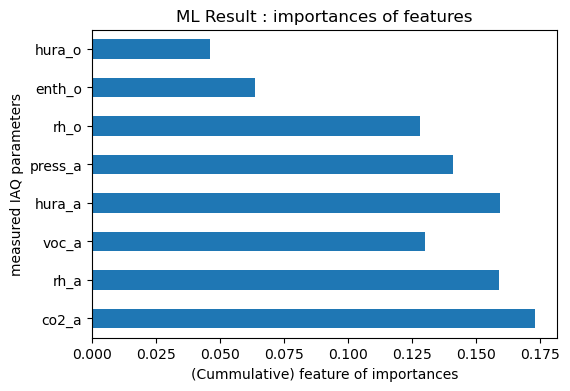

In [346]:
features_plotter(data_importance['Dec.Tree.Class'])

## MODELLING 2

### Linear Regression

In [1393]:
back_scaling = y_train.max()
Lin_reg = LinearRegression(fit_intercept=True )
Lin_reg.fit(x_train, y_train#/back_scaling
            )

y_pred_LinReg = Lin_reg.predict(X)#*back_scaling
y_train_pred_LinReg = Lin_reg.predict(x_train)#*back_scaling#.reshape(1,-1)
y_test_pred_LinReg = Lin_reg.predict(x_test)#*back_scaling#.reshape(1,-1)
print(Lin_reg.intercept_)
print(Lin_reg.coef_.flatten().round(3))
print(r2_score(y_train,y_train_pred_LinReg))
print(r2_score(y_test,y_test_pred_LinReg))

1.210108312110366
[ 0.028  0.     0.001  0.    -0.001  0.015 -0.034 -0.013  0.166 -0.048]
0.2784021906700982
0.28049316304245075


In [1394]:
r2_LinReg = r2_score(y_test,y_test_pred_LinReg).round(3)
mse_LinReg=mean_squared_error(y_test,y_test_pred_LinReg).round(3)
mae_LinReg=mean_absolute_error(y_test,y_test_pred_LinReg).round(3)
rmse_LinReg=np.sqrt(mean_squared_error(y_test,y_test_pred_LinReg)).round(3)
CV_value_LinReg= (rmse_LinReg/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_LinReg = r2_score(y_train,y_train_pred_LinReg).round(3)
train_mse_LinReg=mean_squared_error(y_train,y_train_pred_LinReg).round(3)
train_mae_LinReg=mean_absolute_error(y_train,y_train_pred_LinReg).round(3)
train_rmse_LinReg=np.sqrt(mean_squared_error(y_train,y_train_pred_LinReg)).round(3)
train_CV_value_LinReg= (train_rmse_LinReg/np.array(y_test).flatten().mean(axis=0)).round(3)

print('Linear Regression Performance')
print('R2 train : ', train_r2_LinReg)
print('R2 : ', r2_LinReg)
print('MSE : ', mse_LinReg)
print('MAE : ', mae_LinReg)
print('RMSE : ', rmse_LinReg)
print('CV : ', CV_value_LinReg)

Linear Regression Performance
R2 train :  0.278
R2 :  0.28
MSE :  0.031
MAE :  0.127
RMSE :  0.176
CV :  0.589


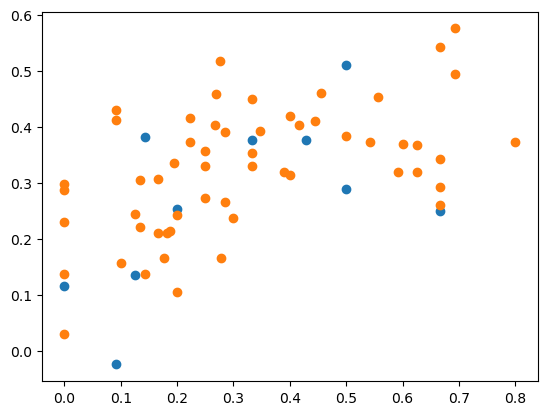

In [1395]:
plt.scatter(y_test,y_test_pred_LinReg)
plt.scatter(y_train,y_train_pred_LinReg)

### DT Regression

In [1396]:
lr_list = [3,4,5, 6, 7,8,10, 12,15,20,25,50
           ]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth=find_optimum)
#find the most optimum C value for DTC Regressor
  DTR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 3
Accuracy score (training): 0.652
Accuracy score (validation): 0.284
__
Optimum Value : 4
Accuracy score (training): 0.824
Accuracy score (validation): -0.459
__
Optimum Value : 5
Accuracy score (training): 0.919
Accuracy score (validation): -0.347
__
Optimum Value : 6
Accuracy score (training): 0.976
Accuracy score (validation): -0.373
__
Optimum Value : 7
Accuracy score (training): 0.987
Accuracy score (validation): -0.371
__
Optimum Value : 8
Accuracy score (training): 0.997
Accuracy score (validation): -0.277
__
Optimum Value : 10
Accuracy score (training): 1.000
Accuracy score (validation): -0.298
__
Optimum Value : 12
Accuracy score (training): 1.000
Accuracy score (validation): -0.314
__
Optimum Value : 15
Accuracy score (training): 1.000
Accuracy score (validation): -0.314
__
Optimum Value : 20
Accuracy score (training): 1.000
Accuracy score (validation): -0.404
__
Optimum Value : 25
Accuracy score (training): 1.000
Accuracy score (validation): -0.356
__
Optimu

In [1207]:
max_depth_use = 8

In [1210]:
lr_list = [1,2, 3, 4, 5, 6, 7,8,10,20,50,100]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth= max_depth_use , random_state= find_optimum)
#find the most optimum C value for DTC Regressor

  DTR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.941
Accuracy score (validation): 0.784
__
Optimum Value : 2
Accuracy score (training): 0.941
Accuracy score (validation): 0.784
__
Optimum Value : 3
Accuracy score (training): 0.941
Accuracy score (validation): -0.188
__
Optimum Value : 4
Accuracy score (training): 0.941
Accuracy score (validation): 0.853
__
Optimum Value : 5
Accuracy score (training): 0.941
Accuracy score (validation): 0.851
__
Optimum Value : 6
Accuracy score (training): 0.941
Accuracy score (validation): -0.337
__
Optimum Value : 7
Accuracy score (training): 0.941
Accuracy score (validation): 0.853
__
Optimum Value : 8
Accuracy score (training): 0.941
Accuracy score (validation): 0.784
__
Optimum Value : 10
Accuracy score (training): 0.941
Accuracy score (validation): -0.188
__
Optimum Value : 20
Accuracy score (training): 0.941
Accuracy score (validation): 0.784
__
Optimum Value : 50
Accuracy score (training): 0.941
Accuracy score (validation): 0.853
__
Optimum Value :

In [1211]:
random_state_use = 1

In [1212]:
# Fit decision tree model
DT_Reg = DecisionTreeRegressor(max_depth= max_depth_use, random_state= random_state_use  )
DT_Reg.fit(x_train, y_train)

# Fit decision tree input-output
model_DTR = DT_Reg.fit(x_train, y_train)
print(model_DTR.score(x_test, y_test))

0.7843273843245903


In [1213]:
y_train_pred_DTR = model_DTR.predict(x_train)
y_test_pred_DTR = model_DTR.predict(x_test)
y_pred_DTR = (model_DTR.predict(X)).reshape(-1,1)
r2_DTR = r2_score(y_test,y_test_pred_DTR).round(3)
mse_DTR=mean_squared_error(y_test,y_test_pred_DTR).round(3)
mae_DTR=mean_absolute_error(y_test,y_test_pred_DTR).round(3)
rmse_DTR=np.sqrt(mean_squared_error(y_test,y_test_pred_DTR)).round(3)
CV_value_DTR= (rmse_DTR/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_DTR = r2_score(y_train,y_train_pred_DTR).round(3)
train_mse_DTR=mean_squared_error(y_train,y_train_pred_DTR).round(3)
train_mae_DTR=mean_absolute_error(y_train,y_train_pred_DTR).round(3)
train_rmse_DTR=np.sqrt(mean_squared_error(y_train,y_train_pred_DTR)).round(3)
train_CV_value_DTR= (train_rmse_DTR/np.array(y_train).flatten().mean(axis=0)).round(3)

print('Decision Tree Regression Performance')
print('target :', target_col )
print('R2 : ', r2_DTR)
print('MSE : ', mse_DTR)
print('MAE : ', mae_DTR)
print('RMSE : ', rmse_DTR)
print('CV : ', CV_value_DTR)

Decision Tree Regression Performance
target : ['rd_temp']
R2 :  0.784
MSE :  0.005
MAE :  0.057
RMSE :  0.069
CV :  0.204


In [1216]:
f_importance_DTR = pd.DataFrame({'features':X.columns,
                                'feature_importances DTR':DT_Reg.feature_importances_}).sort_values(by = 'feature_importances DTR',ascending = False)
f_importance_DTR

,features,feature_importances DTR
4,voc_a,0.341347
7,temp_o,0.233105
5,rdn_a,0.134275
9,rh_o,0.090982
6,hura_a,0.070405
8,enth_o,0.058913
3,co2_a,0.046691
1,bright_a,0.014930
10,hura_o,0.008499
2,rh_a,0.000853


In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(DT_Reg)
#plt.show()

### RF Regression

In [1397]:
lr_list = [6,7,8,12,15,20,25,50]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth=find_optimum)
#find the most optimum max_depth for RFR Regressor

  RFR_optimum.fit(x_train, y_train)

  ML_optimization_process (find_optimum, RFR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 6
Accuracy score (training): 0.842
Accuracy score (validation): 0.339
__
Optimum Value : 7
Accuracy score (training): 0.840
Accuracy score (validation): 0.395
__
Optimum Value : 8
Accuracy score (training): 0.857
Accuracy score (validation): 0.376
__
Optimum Value : 12
Accuracy score (training): 0.855
Accuracy score (validation): 0.335
__
Optimum Value : 15
Accuracy score (training): 0.859
Accuracy score (validation): 0.338
__
Optimum Value : 20
Accuracy score (training): 0.847
Accuracy score (validation): 0.339
__
Optimum Value : 25
Accuracy score (training): 0.845
Accuracy score (validation): 0.309
__
Optimum Value : 50
Accuracy score (training): 0.860
Accuracy score (validation): 0.333
__


In [1398]:
max_depth_use = 8

In [1399]:
lr_list = [1,2, 4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth= max_depth_use , random_state=find_optimum)
#find the most optimum C value for RFR Regressor

  RFR_optimum.fit(x_train, y_train)

  ML_optimization_process (find_optimum, RFR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.856
Accuracy score (validation): 0.285
__
Optimum Value : 2
Accuracy score (training): 0.840
Accuracy score (validation): 0.418
__
Optimum Value : 4
Accuracy score (training): 0.859
Accuracy score (validation): 0.395
__
Optimum Value : 6
Accuracy score (training): 0.845
Accuracy score (validation): 0.340
__
Optimum Value : 8
Accuracy score (training): 0.857
Accuracy score (validation): 0.391
__
Optimum Value : 10
Accuracy score (training): 0.841
Accuracy score (validation): 0.331
__
Optimum Value : 15
Accuracy score (training): 0.851
Accuracy score (validation): 0.357
__
Optimum Value : 20
Accuracy score (training): 0.850
Accuracy score (validation): 0.344
__
Optimum Value : 25
Accuracy score (training): 0.849
Accuracy score (validation): 0.412
__
Optimum Value : 50
Accuracy score (training): 0.841
Accuracy score (validation): 0.395
__
Optimum Value : 100
Accuracy score (training): 0.860
Accuracy score (validation): 0.325
__


In [1400]:
random_use = 2

In [1401]:
model_RFR = RandomForestRegressor(max_depth = max_depth_use , random_state = random_use )
model_RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, random_state=2)

In [1402]:
# use model to predict
y_test_pred_RFR = (model_RFR.predict(x_test)).reshape(-1,1)
y_train_pred_RFR = (model_RFR.predict(x_train)).reshape(-1,1)
y_pred_RFR = (model_RFR.predict(X)).reshape(-1,1)
r2_RFR = r2_score(y_test,y_test_pred_RFR).round(3)
mse_RFR = mean_squared_error(y_test,y_test_pred_RFR).round(3)
mae_RFR = mean_absolute_error(y_test,y_test_pred_RFR).round(3)
rmse_RFR = np.sqrt(mean_squared_error(y_test,y_test_pred_RFR)).round(3)
CV_value_RFR = (rmse_RFR/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_RFR = r2_score(y_train,y_train_pred_RFR).round(3)
train_mse_RFR = mean_squared_error(y_train,y_train_pred_RFR).round(3)
train_mae_RFR = mean_absolute_error(y_train,y_train_pred_RFR).round(3)
train_rmse_RFR = np.sqrt(mean_squared_error(y_train,y_train_pred_RFR)).round(3)
train_CV_value_RFR = (train_rmse_RFR/np.array(y_train).flatten().mean(axis=0)).round(3)

print('Random Forest Regression Performance')
print('R2 : ', r2_RFR)
print('MSE : ', mse_RFR)
print('MAE : ', mae_RFR)
print('RMSE : ', rmse_RFR)
print('CV : ', CV_value_RFR)

f_importance_RFR = pd.DataFrame({'features':X.columns,
                                'feature_importances':model_RFR.feature_importances_}).sort_values(by = 'feature_importances',ascending = False)
f_importance_RFR

Random Forest Regression Performance
R2 :  0.418
MSE :  0.025
MAE :  0.134
RMSE :  0.158
CV :  0.529


,features,feature_importances
3,rdn_a,0.237754
4,press_a,0.148996
7,rh_o,0.119332
1,co2_a,0.113534
2,voc_a,0.108797
6,enth_o,0.089399
8,hura_o,0.062944
5,hura_a,0.060912
0,rh_a,0.044486
9,moment,0.013847


### ET Regression

In [1408]:
#optimum MAX_DEPTH
lr_list = [2,3,5,6,8, 12,15,20,25,50]  #[7,8,11, 13,21,25,34,38,42,55,89,100]  
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=find_optimum, random_state=10)
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.288
Accuracy score (validation): 0.266
__
Optimum Value : 3
Accuracy score (training): 0.518
Accuracy score (validation): 0.365
__
Optimum Value : 5
Accuracy score (training): 0.851
Accuracy score (validation): 0.443
__
Optimum Value : 6
Accuracy score (training): 0.939
Accuracy score (validation): 0.416
__
Optimum Value : 8
Accuracy score (training): 0.993
Accuracy score (validation): 0.481
__
Optimum Value : 12
Accuracy score (training): 1.000
Accuracy score (validation): 0.394
__
Optimum Value : 15
Accuracy score (training): 1.000
Accuracy score (validation): 0.433
__
Optimum Value : 20
Accuracy score (training): 1.000
Accuracy score (validation): 0.436
__
Optimum Value : 25
Accuracy score (training): 1.000
Accuracy score (validation): 0.436
__
Optimum Value : 50
Accuracy score (training): 1.000
Accuracy score (validation): 0.436
__


In [1409]:
max_depth_use = 8

In [1410]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100,200,400]
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=max_depth_use, random_state=find_optimum)
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process_CV (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
CV score (training): 0.051
CV score (validation): 0.517
__
Optimum Value : 2
CV score (training): 0.051
CV score (validation): 0.479
__
Optimum Value : 5
CV score (training): 0.050
CV score (validation): 0.525
__
Optimum Value : 10
CV score (training): 0.057
CV score (validation): 0.501
__
Optimum Value : 50
CV score (training): 0.051
CV score (validation): 0.495
__
Optimum Value : 100
CV score (training): 0.055
CV score (validation): 0.517
__
Optimum Value : 200
CV score (training): 0.056
CV score (validation): 0.504
__
Optimum Value : 400
CV score (training): 0.051
CV score (validation): 0.512
__


In [1275]:
random_use = 5

In [1276]:
#optimum CRITERION
lr_list = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=max_depth_use, random_state=random_use, criterion= find_optimum)
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process_CV (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : squared_error
CV score (training): 0.001
CV score (validation): 0.262
__
Optimum Value : friedman_mse
CV score (training): 0.001
CV score (validation): 0.267
__
Optimum Value : absolute_error
CV score (training): 0.003
CV score (validation): 0.302
__
Optimum Value : poisson
CV score (training): 0.033
CV score (validation): 0.261
__


In [1277]:
criterion_use = 'squared_error'

In [1278]:
#optimum ESTIMATOR USE
lr_list = [2,5,10,20,50,100,110,120, 130, 150,250]
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators= find_optimum )
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process_CV (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
CV score (training): 0.000
CV score (validation): 0.213
__
Optimum Value : 5
CV score (training): 0.000
CV score (validation): 0.251
__
Optimum Value : 10
CV score (training): 0.001
CV score (validation): 0.309
__
Optimum Value : 20
CV score (training): 0.001
CV score (validation): 0.312
__
Optimum Value : 50
CV score (training): 0.002
CV score (validation): 0.281
__
Optimum Value : 100
CV score (training): 0.001
CV score (validation): 0.262
__
Optimum Value : 110
CV score (training): 0.001
CV score (validation): 0.267
__
Optimum Value : 120
CV score (training): 0.001
CV score (validation): 0.277
__
Optimum Value : 130
CV score (training): 0.001
CV score (validation): 0.273
__
Optimum Value : 150
CV score (training): 0.001
CV score (validation): 0.275
__
Optimum Value : 250
CV score (training): 0.001
CV score (validation): 0.287
__


In [1279]:
n_estimator_use = 2

In [1280]:
# Fit decision tree model
ETR = ExtraTreesRegressor(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators=n_estimator_use )
ETR.fit(x_train, y_train)

# Fit decision tree input-output
model_ETR = ETR.fit(x_train, y_train)

In [1282]:
# Predict train set labels
y_train_pred_ETR = model_ETR.predict(x_train)
y_test_pred_ETR = model_ETR.predict(x_test)
y_pred_ETR = model_ETR.predict(X)

r2_ETR = r2_score(y_test,y_test_pred_ETR).round(3)
mse_ETR= mean_squared_error(y_test,y_test_pred_ETR).round(3)
mae_ETR= mean_absolute_error(y_test,y_test_pred_ETR).round(3)
rmse_ETR= np.sqrt(mean_squared_error(y_test,y_test_pred_ETR)).round(3)
CV_value_ETR =(rmse_ETR/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_ETR = r2_score(y_train,y_train_pred_ETR).round(3)
train_mse_ETR= mean_squared_error(y_train,y_train_pred_ETR).round(3)
train_mae_ETR= mean_absolute_error(y_train,y_train_pred_ETR).round(3)
train_rmse_ETR= np.sqrt(mean_squared_error(y_train,y_train_pred_ETR)).round(3)
train_CV_value_ETR = (train_rmse_ETR/np.array(y_train).flatten().mean(axis=0)).round(3)

print('Linear Regression Performance')
print('target :', target_col )
print('R2 : ', r2_ETR)
print('MSE : ', mse_ETR)
print('MAE : ', mae_ETR)
print('RMSE : ', rmse_ETR)
print('CV : ', CV_value_ETR)

data_importance = pd.DataFrame({"features" : X.columns,
                                "Extra.Trees.Class":model_ETR.feature_importances_.round(4),
                                }).sort_values( by="Extra.Trees.Class" ,ascending = False)
data_importance

Linear Regression Performance
target : ['rd_temp']
R2 :  0.81
MSE :  0.004
MAE :  0.061
RMSE :  0.065
CV :  0.212


,features,Extra.Trees.Class
9,rh_o,0.1944
4,voc_a,0.1183
3,co2_a,0.1181
1,bright_a,0.1123
5,rdn_a,0.0978
6,hura_a,0.0787
2,rh_a,0.0609
7,temp_o,0.0562
11,moment,0.0556
10,hura_o,0.0413


In [ ]:
# fn = model_ETR.feature_names_in_
# cn= model_ETR.feature_names_in_
# figsize = (n_estimator_use*5,5)

# fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
# for index in range(0, n_estimator_use):
#     tree.plot_tree(model_ETR.estimators_[index],
#                    feature_names = fn,
#                    class_names=target_col,
#                    filled = True,
#                    ax = axes[index]);

#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_ETR_' + str(target_col) + '.png')

### XGBoost Regression

In [1283]:
lr_list = [4,5,6,7,8,13,21,34,55,89,144]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=find_optimum, learning_rate = 0.1, n_estimators=100, random_state= 100 )
#find the most optimum max_depth for XGBoost Regression

  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process_CV (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 4
CV score (training): 0.025
CV score (validation): 0.362
__
Optimum Value : 5
CV score (training): 0.005
CV score (validation): 0.510
__
Optimum Value : 6
CV score (training): 0.003
CV score (validation): 0.401
__
Optimum Value : 7
CV score (training): 0.002
CV score (validation): 0.409
__
Optimum Value : 8
CV score (training): 0.002
CV score (validation): 0.421
__
Optimum Value : 13
CV score (training): 0.002
CV score (validation): 0.505
__
Optimum Value : 21
CV score (training): 0.002
CV score (validation): 0.505
__
Optimum Value : 34
CV score (training): 0.002
CV score (validation): 0.505
__
Optimum Value : 55
CV score (training): 0.002
CV score (validation): 0.505
__
Optimum Value : 89
CV score (training): 0.002
CV score (validation): 0.505
__
Optimum Value : 144
CV score (training): 0.002
CV score (validation): 0.505
__


In [1284]:
max_depth_use = 4

In [1285]:
lr_list = [#0.001,0.005,0.01,
           0.05,0.075, 0.09,0.1,0.15,0.2, 0.25,0.35,0.5,0.75]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=max_depth_use, learning_rate = find_optimum, n_estimators=100, random_state= 100 )
#find the most optimum learning_rate for XGBoost Regression

  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process_CV (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 0.05
CV score (training): 0.094
CV score (validation): 0.412
__
Optimum Value : 0.075
CV score (training): 0.039
CV score (validation): 0.372
__
Optimum Value : 0.09
CV score (training): 0.036
CV score (validation): 0.392
__
Optimum Value : 0.1
CV score (training): 0.025
CV score (validation): 0.362
__
Optimum Value : 0.15
CV score (training): 0.006
CV score (validation): 0.347
__
Optimum Value : 0.2
CV score (training): 0.003
CV score (validation): 0.354
__
Optimum Value : 0.25
CV score (training): 0.003
CV score (validation): 0.468
__
Optimum Value : 0.35
CV score (training): 0.003
CV score (validation): 0.340
__
Optimum Value : 0.5
CV score (training): 0.002
CV score (validation): 0.376
__
Optimum Value : 0.75
CV score (training): 0.002
CV score (validation): 0.528
__


In [1286]:
learning_rate_use = 0.1

In [1287]:
lr_list = [85,90,95,97,100,102,103,105,110,115,120]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=max_depth_use, learning_rate = learning_rate_use , n_estimators=find_optimum, random_state= 100 )
#find the most optimum n_estimator for XGBoost Regression

  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 85
Accuracy score (training): 0.994
Accuracy score (validation): 0.458
__
Optimum Value : 90
Accuracy score (training): 0.996
Accuracy score (validation): 0.444
__
Optimum Value : 95
Accuracy score (training): 0.997
Accuracy score (validation): 0.449
__
Optimum Value : 97
Accuracy score (training): 0.997
Accuracy score (validation): 0.450
__
Optimum Value : 100
Accuracy score (training): 0.997
Accuracy score (validation): 0.448
__
Optimum Value : 102
Accuracy score (training): 0.998
Accuracy score (validation): 0.449
__
Optimum Value : 103
Accuracy score (training): 0.998
Accuracy score (validation): 0.450
__
Optimum Value : 105
Accuracy score (training): 0.998
Accuracy score (validation): 0.452
__
Optimum Value : 110
Accuracy score (training): 0.998
Accuracy score (validation): 0.452
__
Optimum Value : 115
Accuracy score (training): 0.999
Accuracy score (validation): 0.453
__
Optimum Value : 120
Accuracy score (training): 0.999
Accuracy score (validation): 0.455
__


In [1288]:
n_estimators_use = 100

In [1289]:
model_XGBR = xg.XGBRegressor( max_depth= max_depth_use, learning_rate = learning_rate_use, n_estimators = n_estimators_use)
model_XGBR.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1290]:
# use model to predict
y_test_pred_XGBR = model_XGBR.predict(x_test)
y_train_pred_XGBR = model_XGBR.predict(x_train)
y_test_pred_XGBR = y_test_pred_XGBR.reshape(-1,1)
y_pred_XGBR = model_XGBR.predict(X).reshape(-1,1)
print(model_XGBR.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_XGBR)).round(3))

r2_XGBR = r2_score(y_test,y_test_pred_XGBR).round(3)
mse_XGBR =mean_squared_error(y_test,y_test_pred_XGBR).round(3)
mae_XGBR =mean_absolute_error(y_test,y_test_pred_XGBR).round(3)
rmse_XGBR =np.sqrt(mean_squared_error(y_test,y_test_pred_XGBR)).round(3)
CV_value_XGBR = (rmse_XGBR/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_XGBR = r2_score(y_train,y_train_pred_XGBR).round(3)
train_mse_XGBR =mean_squared_error(y_train,y_train_pred_XGBR).round(3)
train_mae_XGBR =mean_absolute_error(y_train,y_train_pred_XGBR).round(3)
train_rmse_XGBR =np.sqrt(mean_squared_error(y_train,y_train_pred_XGBR)).round(3)
train_CV_value_XGBR = (train_rmse_XGBR/np.array(y_train).flatten().mean(axis=0)).round(3)

print('X-Gradient Boost Performance')
print('R2 : ', r2_XGBR)
print('MSE : ', mse_XGBR)
print('MAE : ', mae_XGBR)
print('RMSE : ', rmse_XGBR)
print('CV : ', CV_value_XGBR)

0.44842319980811285
0.111
X-Gradient Boost Performance
R2 :  0.448
MSE :  0.012
MAE :  0.092
RMSE :  0.111
CV :  0.362


In [1291]:
f_importance_XGBR = pd.DataFrame({'features':X.columns,
                                'feature_importances XGBoost':model_XGBR.feature_importances_}).sort_values(by = 'feature_importances XGBoost',ascending = False)
f_importance_XGBR

,features,feature_importances XGBoost
4,voc_a,0.230863
7,temp_o,0.217702
11,moment,0.164648
5,rdn_a,0.091583
9,rh_o,0.060259
3,co2_a,0.056294
8,enth_o,0.047884
1,bright_a,0.044326
0,temp_a,0.039377
2,rh_a,0.026694


### MLP regression

In [ ]:
lr_list = [50,75,100,150,200,300,400,600,800,1200]
lr_list2 = [6,12,24,50,75,100,200,300,400]
for find_optimum1  in lr_list :
  for find_optimum2 in lr_list2 :
    MLP_optimum = MLPRegressor(hidden_layer_sizes=(find_optimum1, find_optimum2), max_iter=1500, random_state=2, validation_fraction=0.17)
#find the most optimum number of neuron in first layer

    MLP_optimum.fit(x_train, y_train)
    ML_NN_optimization_process (find_optimum1, find_optimum2, MLP_optimum, x_train, y_train, x_test,y_test)

In [1292]:
first_layer_size_use = 600
second_layer_size_use = 200

In [ ]:
lr_list = [1,2,4,6,8,10,12,16,48]

for find_optimum in lr_list:
  MLP_optimum = MLPRegressor(hidden_layer_sizes=(first_layer_size_use, second_layer_size_use ), max_iter=1000, random_state= find_optimum)
#find the most optimum number of neuron in first layer

  MLP_optimum.fit(x_train, y_train)
  y_pred_MLP_test = MLP_optimum.predict(x_test)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [1293]:
random_state_use = 2
max_iter_use = 3000

In [1294]:
# Create MLPRegressor model with much neurons in the first layer, fewer neurons in the second layer, and single output layer
model_MLPR = MLPRegressor(hidden_layer_sizes=(first_layer_size_use, second_layer_size_use), max_iter= max_iter_use , random_state= random_state_use )

# Fit the model to the training data and validate with the validation data
model_MLPR.fit(x_train, y_train)
print(model_MLPR.score(x_train, y_train))
print(model_MLPR.score(x_test, y_test))

-503.6452117615176
-854.559934191561


In [1298]:
y_train_pred_MLPR = model_MLPR.predict(x_train)
y_test_pred_MLPR = model_MLPR.predict(x_test)
y_pred_MLPR = model_MLPR.predict(X)
r2_MLPR = r2_score(y_test,y_test_pred_MLPR).round(3)
mse_MLPR = mean_squared_error(y_test,y_test_pred_MLPR).round(3)
mae_MLPR = mean_absolute_error(y_test,y_test_pred_MLPR).round(3)
rmse_MLPR = np.sqrt(mean_squared_error(y_test,y_test_pred_MLPR)).round(3)
CV_value_MLPR = (rmse_MLPR/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_MLPR = r2_score(y_train,y_train_pred_MLPR).round(3)
train_mse_MLPR = mean_squared_error(y_train,y_train_pred_MLPR).round(3)
train_mae_MLPR = mean_absolute_error(y_train,y_train_pred_MLPR).round(3)
train_rmse_MLPR = np.sqrt(mean_squared_error(y_train,y_train_pred_MLPR)).round(3)
train_CV_value_MLPR =(train_rmse_MLPR/np.array(y_train).flatten().mean(axis=0)).round(3)

# print(classroom_data)
print('Multi-layer Perceptron Regression Performance')
# print('target : '+ target_col + ' of classroom :'  )
print('R2 : ', r2_MLPR)
print('MSE : ', mse_MLPR)
print('MAE : ', mae_MLPR)
print('RMSE : ', rmse_MLPR)
print('CV : ', CV_value_MLPR)

Multi-layer Perceptron Regression Performance
R2 :  -854.56
MSE :  19.149
MAE :  3.96
RMSE :  4.376
CV :  14.263


In [ ]:
# Extract coefs_ and intercepts_
coefs_show = model_MLPR.coefs_
intercepts_show = model_MLPR.intercepts_

# Create DataFrame for coefficients
coef_df_list = []
for i, coef_matrix in enumerate(coefs_show):
    layer_df = pd.DataFrame(coef_matrix, columns=[f'Layer_{i+1}_Neuron_{j+1}' for j in range(coef_matrix.shape[1])])
    layer_df['Input_Variable'] = xb.columns if i == 0 else [f'Layer_{i}_Neuron_{j+1}' for j in range(coefs_show[i-1].shape[1])]
    coef_df_list.append(layer_df.set_index('Input_Variable'))

# Combine coefficients into a single DataFrame
MLPR_coef_df = pd.concat(coef_df_list, axis=1)

# Create DataFrame for intercepts
intercept_df_list = []
for i, intercept_vector in enumerate(intercepts_show):
    intercept_df = pd.DataFrame(intercept_vector, columns=[f'Intercept_Layer_{i+1}'])
    intercept_df['Neuron'] = [f'Layer_{i+1}_Neuron_{j+1}' for j in range(len(intercept_vector))]
    intercept_df_list.append(intercept_df.set_index('Neuron'))

# Combine intercepts into a single DataFrame
MLPR_intercept_df = pd.concat(intercept_df_list, axis=0)

### ANN

In [ ]:
# Build the model
model_ANN = Sequential()
model_ANN.add(Dense(first_layer_size_use, input_dim=x_train.shape[1], activation='relu'))
model_ANN.add(Dense(second_layer_size_use, activation='relu'))
model_ANN.add(Dense(1))

# Compile the model
model_ANN.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_ANN.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


c:\Users\azimilga\AppData\Local\miniconda3\envs\DIGGMINSKOLE\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.7220 - val_loss: 5.9233
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7763 - val_loss: 5.6746
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 4.8397 - val_loss: 5.1679
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9612 - val_loss: 4.7626
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6324 - val_loss: 4.8168
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5732 - val_loss: 4.6159
Epoch 7/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 4.0542 - val_loss: 4.2937
Epoch 8/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 4.1280 - val_loss: 4.3211
Epoch 9/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3367 - val_loss: 4.2541
Epoch 10/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 4.1061 - val_loss: 4.1803
Epoch 11/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0687 - val_loss: 4.4099
Epoch 12/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
y_train_pred_ANN = model_ANN.predict(x_train)
y_test_pred_ANN = model_ANN.predict(x_test)
y_pred_ANN = model_ANN.predict(X)
r2_ANN = r2_score(y_test,y_test_pred_ANN).round(3)
mse_ANN = mean_squared_error(y_test,y_test_pred_ANN).round(3)
mae_ANN = mean_absolute_error(y_test,y_test_pred_ANN).round(3)
rmse_ANN = np.sqrt(mean_squared_error(y_test,y_test_pred_ANN)).round(3)
CV_value_ANN = (rmse_ANN/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_ANN = r2_score(y_train,y_train_pred_ANN).round(3)
train_mse_ANN = mean_squared_error(y_train,y_train_pred_ANN).round(3)
train_mae_ANN = mean_absolute_error(y_train,y_train_pred_ANN).round(3)
train_rmse_ANN = np.sqrt(mean_squared_error(y_train,y_train_pred_ANN)).round(3)
train_CV_value_ANN = (train_rmse_ANN/np.array(y_train).flatten().mean(axis=0)).round(3)

print('Multi-layer Perceptron Regression Performance')
print('target : ', target_col )
print('R2 : ', r2_ANN)
print('MSE : ', mse_ANN)
print('MAE : ', mae_ANN)
print('RMSE : ', rmse_ANN)
print('CV : ', CV_value_ANN)

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
327/327 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
Multi-layer Perceptron Regression Performance
target :  pm1_a
R2 :  0.804
MSE :  3.144
MAE :  1.172
RMSE :  1.773
CV :  0.812


In [ ]:

# Compute the baseline performance
baseline_mse = np.mean((y_test - y_test_pred_ANN.flatten())**2)
print(f'Baseline Mean Squared Error: {baseline_mse}')

# Define the permutation importance function
def permutation_importance(model, x_test, y_test, metric, n_repeats=30):
    baseline_score = metric(y_test, model.predict(x_test).flatten())
    importances = np.zeros(x_test.shape[1])
    
    for col in range(x_test.shape[1]):
        score_drops = []
        for _ in range(n_repeats):
            x_test_permuted = x_test.copy()
            np.random.shuffle(x_test_permuted[:, col])
            permuted_score = metric(y_test, model.predict(x_test_permuted).flatten())
            score_drops.append(baseline_score - permuted_score)
        importances[col] = np.mean(score_drops)
    
    return importances

# Define the metric
def mse(y_test, y_test_pred_ANN):
    return np.mean((y_test - y_test_pred_ANN)**2)

# Calculate permutation importance
importances = permutation_importance(model_ANN, x_test, y_test, mse)

# Display importances
for i, imp in enumerate(importances):
    print(f'Feature {i}: Importance {imp}')

In [ ]:
def mse(y, y_pred_ANN):
    return np.mean((y - y_pred_ANN)**2)

# Calculate permutation importance
importances = permutation_importance(model_ANN, x_test, y_test, mse)

# Display importances
for i, imp in enumerate(importances):
    print(f'Feature {i}: Importance {imp}')

(0.05, 100.0)

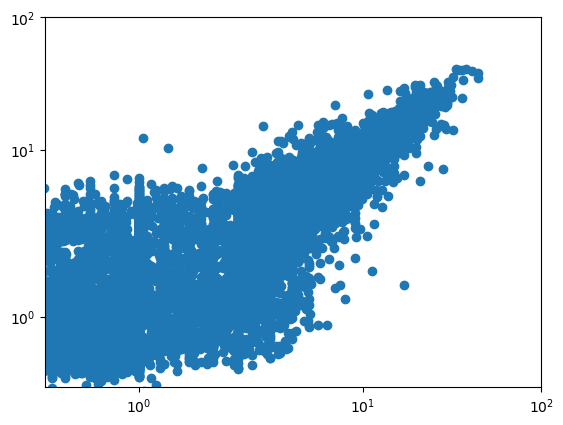

In [ ]:
plt.scatter(y,y_pred_ANN)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim([0.05,100])
plt.ylim([0.05,100])
# plt.scatter(data_ML['pm1_a'],data_ML['pm10_o'])

## ML Review

In [1305]:
# EVALUATE MODELS AND ESTIMATE PREDICTIONS
# Define your models list and model names list
models = [Lin_reg, model_DTR, model_RFR, model_ETR, model_XGBR  , model_MLPR
          ]
model_names = ['Linear.Reg','Dec.Tree.Reg', 'Ran.For.Reg', 'Ext.Trees.Reg', 'XGBoost.Reg', 'MLP.Reg'
               ]

# Evaluate the models
test_regression_result  = evaluate_models(models, model_names, x_test, y_test, 'test')
train_regression_result = evaluate_models(models, model_names, x_train, y_train, 'train')
all_regression_result   = evaluate_models(models, model_names, X, yb, 'All')

# Evaluate the models
test_prediction_result  = estimate_predictions(models, model_names, x_test, y_test, 'test')
train_prediction_result = estimate_predictions(models, model_names, x_train, y_train, 'train')
all_prediction_result   = estimate_predictions(models, model_names, X, yb, 'All')


In [1312]:
test_regression_result

,Model test,R2,RMSE,CV
0,Linear.Reg,0.340,0.122,0.398
1,Dec.Tree.Reg,0.851,0.055,0.179
2,Ran.For.Reg,0.610,0.095,0.310
3,Ext.Trees.Reg,0.810,0.063,0.205
4,XGBoost.Reg,0.448,0.110,0.359
5,MLP.Reg,-854.560,4.376,14.263


In [1318]:
data_importance = pd.DataFrame({"features" : X.columns,  
                                # "Lasso Reg." : coef_Lasso,
                                # "Ridge Reg.":coef_Ridge,
                                # "SGD Reg.":coef_SGDR,
                                # "SV Reg.":coef_SVR,
                                "Dec.Tree Reg." : model_DTR.feature_importances_,
                                "RandForest Reg.": model_RFR.feature_importances_,
                                "Extra Trees Reg.": model_ETR.feature_importances_, 
                                # "GradBoost Reg.":model_GBR.feature_importances_,
                                "XGBoost Reg.":model_XGBR.feature_importances_,
                                "Linear Reg.":Lin_reg.coef_.flatten()
                                 }).sort_values('Extra Trees Reg.', ascending = False)
data_importance

,features,Dec.Tree Reg.,RandForest Reg.,Extra Trees Reg.,XGBoost Reg.,Linear Reg.
9,rh_o,0.090982,0.143455,0.194423,0.060259,-0.002460
4,voc_a,0.341347,0.153575,0.118311,0.230863,0.000853
3,co2_a,0.046691,0.096461,0.118059,0.056294,0.000135
1,bright_a,0.014930,0.064543,0.112305,0.044326,-0.003590
5,rdn_a,0.134275,0.109392,0.097823,0.091583,-0.000188
6,hura_a,0.070405,0.029650,0.078696,0.007450,-0.457302
2,rh_a,0.000853,0.048683,0.060914,0.026694,0.089741
7,temp_o,0.233105,0.169306,0.056155,0.217702,-3.304615
11,moment,0.000000,0.008603,0.055633,0.164648,0.023930
10,hura_o,0.008499,0.030534,0.041271,0.012919,-8.242448


## ML model save

In [ ]:
import joblib
# #saving the model for the app
# joblib.dump(Lin_reg,     ML_directory + todays_date + '_Lin_reg' + '.joblib')
# # joblib.dump(Lasso,     ML_directory + todays_date + '_Lasso' + '.joblib')
# # joblib.dump(Ridge,     ML_directory + todays_date + '_Ridge' + '.joblib')
# # joblib.dump(model_GPR,  ML_directory +todays_date +  '_model_GPC' + '.joblib')
# # joblib.dump(model_KNR,  ML_directory + todays_date + '_model_KNR' + '.joblib')
# # joblib.dump(model_SVR,  ML_directory + todays_date + '_model_SVR' + '.joblib')
# joblib.dump(model_ETR,  ML_directory + todays_date + '_model_ETR' + '.joblib')
# joblib.dump(model_DTR,  ML_directory + todays_date + '_model_DTR' + '.joblib')
# joblib.dump(model_RFR,  ML_directory +  todays_date + '_model_RFR' + '.joblib')
# # joblib.dump(model_GBR,  ML_directory +  todays_date + '_model_GBR' + '.joblib')
# joblib.dump(model_MLPR, ML_directory +  todays_date + '_model_MLPR' + '.joblib')
# joblib.dump(model_XGBR, ML_directory + todays_date + '_model_XGBR' + '.joblib')

#saving the model for the app
joblib.dump(Lin_reg,     ML_directory + '_Lin_reg' + '.joblib')
# joblib.dump(Lasso,     ML_directory + todays_date + '_Lasso' + '.joblib')
# joblib.dump(Ridge,     ML_directory + todays_date + '_Ridge' + '.joblib')
# joblib.dump(model_GPR,  ML_directory +todays_date +  '_model_GPC' + '.joblib')
# joblib.dump(model_KNR,  ML_directory + todays_date + '_model_KNR' + '.joblib')
# joblib.dump(model_SVR,  ML_directory + todays_date + '_model_SVR' + '.joblib')
joblib.dump(model_ETR,  ML_directory +  '_model_ETR' + '.joblib')
joblib.dump(model_DTR,  ML_directory +  '_model_DTR' + '.joblib')
joblib.dump(model_RFR,  ML_directory +  '_model_RFR' + '.joblib')
# joblib.dump(model_GBR,  ML_directory +  todays_date + '_model_GBR' + '.joblib')
joblib.dump(model_MLPR, ML_directory +  '_model_MLPR' + '.joblib')
joblib.dump(model_XGBR, ML_directory +  '_model_XGBR' + '.joblib')

with pd.ExcelWriter(ML_directory+ '_perform data' + '.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index to store the dataframe in specified sheet
    data_ML.to_excel(writer, sheet_name = 'main_dataset', index=True) 
    data_ML.describe(percentiles=[0.1,.25, .5, .75, .9]).to_excel(writer, sheet_name = 'df_description', index=True) 
    data_input[(data_input['room_id']==classroom_data)][airthingsDevice+weather_oslo].describe( percentiles=[0.1,.25, .5, .75, .9]).to_excel(writer, sheet_name = 'all data', index=True) 
    data_input[(data_input['room_id']==classroom_data)&(data_input['dust_period']=='no')][airthingsDevice+weather_oslo].describe( percentiles=[0.1,.25, .5, .75, .9]).to_excel(writer, sheet_name = 'normal', index=True) 
    data_input[(data_input['room_id']==classroom_data)&(data_input['dust_period']=='yes')][airthingsDevice+weather_oslo].describe( percentiles=[0.1,.25, .5, .75, .9]).to_excel(writer, sheet_name = 'dustperiod', index=True) 
    train_regression_result.to_excel(writer, sheet_name = 'ACC_train', index=True)
    test_regression_result.to_excel(writer, sheet_name = 'Acc_test', index=True) 
    all_regression_result.to_excel(writer, sheet_name = 'ACC_all', index=True)
    sahara_regression_result.to_excel(writer, sheet_name = 'ACC_sahara', index=True)
    normal_regression_result.to_excel(writer, sheet_name = 'ACC_normal', index=True)
    
    train_prediction_result.to_excel(writer, sheet_name = 'train_result', index=True) 
    test_prediction_result.to_excel(writer, sheet_name = 'test_result', index=True) 
    all_prediction_result.to_excel(writer, sheet_name = 'all_result', index=True) 
    sahara_prediction_result.to_excel(writer, sheet_name = 'sahara_result', index=True) 
    normal_prediction_result.to_excel(writer, sheet_name = 'normal_result', index=True)
    
    data_importance.to_excel(writer, sheet_name = 'data_imp', index=True)      #dont forget the index , becaus coordinate -x and -y are the index of the table
    
    MLPR_coef_df.to_excel(writer, sheet_name = 'MLPR_coef', index=True) 
    MLPR_intercept_df.to_excel(writer, sheet_name = 'MLPR_intercept', index=True)

# SHAP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import shap
import matplotlib.pyplot as plt


In [ ]:

X = combined2[combined2['school_id']=='bratteberg'][is_col_main].drop('feel_health', axis=1)
y = combined2[combined2['school_id']=='bratteberg'] ['feel_health'].replace({-2:0, -1:1, 1:2, 2:3 }) # Target variable with categorical values (1 to 4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("before oversampling train: ", Counter(y_train ))
print("before oversampling test: " , Counter(y_test ))

before oversampling train:  Counter({2: 739, 3: 577, 1: 229, 0: 171})
before oversampling test:  Counter({2: 238, 3: 183, 1: 90, 0: 62})


In [ ]:

oversample_over = SMOTE(sampling_strategy='all')
# fit and apply the transform
x_new, y_new = oversample_over.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, train_size = (75/100), shuffle = True)
print("After oversampling train: ", Counter(y_train ))
print("After oversampling test: " , Counter(y_test ))



After oversampling train:  Counter({0: 752, 2: 729, 3: 725, 1: 725})
After oversampling test:  Counter({1: 252, 3: 252, 2: 248, 0: 225})


In [ ]:
# Initialize and train the Random Forest Classifier
rf_model = XGBClassifier()
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

prec_score = precision_score(y_test, y_pred,average='weighted')
print(f'precision_score: {prec_score:.2f}')

recall_sc = recall_score(y_test, y_pred,average='weighted')
print(f'recall_score: {recall_sc:.2f}')

Accuracy: 0.64
precision_score: 0.65
recall_score: 0.64


<Figure size 200x200 with 0 Axes>

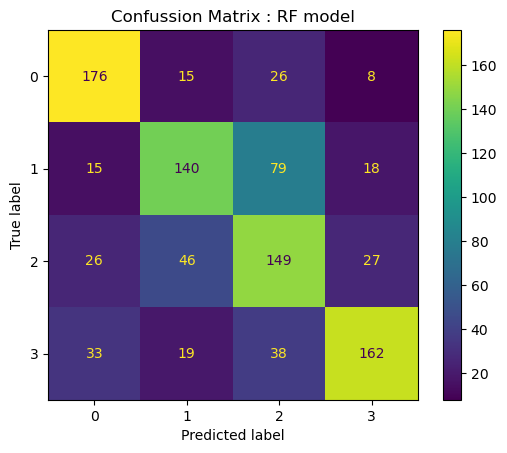

In [ ]:
conf_matrix_ML( y_test, y_pred, rf_model, 'RF model' )

In [ ]:
rf_model.feature_importances_

array([0.35457334, 0.3002157 , 0.17157541, 0.17363554], dtype=float32)

In [ ]:
y_test

522     2
1126    2
3540    1
234     1
2177    3
       ..
934     1
77      3
1457    1
337     2
1998    3
Name: feel_health, Length: 977, dtype: int64

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


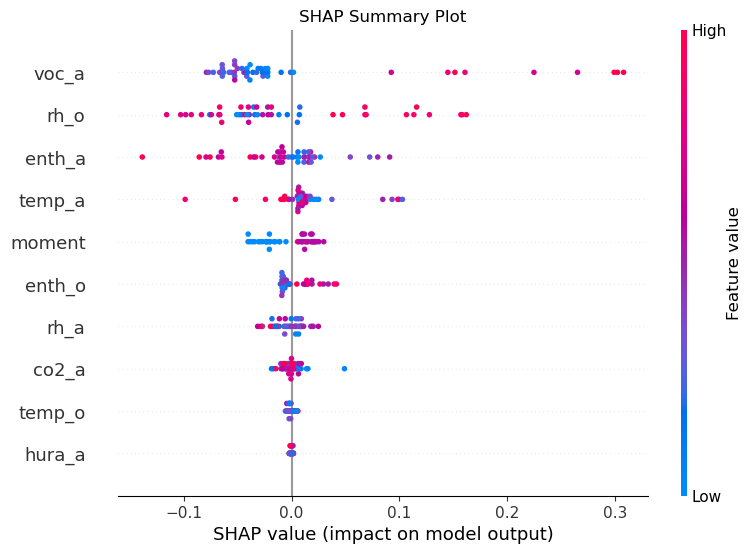

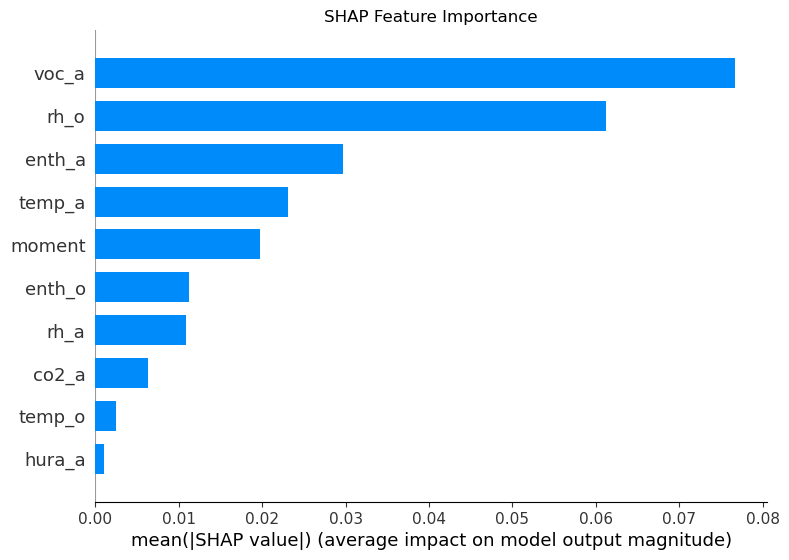

In [ ]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_XGBR)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(xb)

# Summary plot of SHAP values for all classes
# shap_values[i] corresponds to the SHAP values for class i  IF MULTICLASS TARGET
# for i in range(len(shap_values)):
#     shap.summary_plot(shap_values[i], x_test, plot_type="dot", show=False)
#     plt.title(f'SHAP Summary Plot for Class {i}')
#     plt.xlim(-2,2)
#     plt.show()

# # IF ONLY 2 CATEGORIES
shap.summary_plot(shap_values, x, plot_type="dot", show=False, feature_names=xb.columns)
plt.title(f'SHAP Summary Plot')
plt.show()    

# Bar plot to show the mean absolute SHAP value for each feature across all predictions
shap.summary_plot(shap_values, x, plot_type="bar", show=False, feature_names=xb.columns)
plt.title('SHAP Feature Importance')
plt.show()


In [ ]:
pd.DataFrame(model_XGBR.feature_importances_, index=xb.columns, columns=['value']).sort_values(['value'])

,value
hura_a,0.002222
temp_o,0.012509
rh_a,0.049102
temp_a,0.058200
moment,0.058306
co2_a,0.059003
enth_o,0.059016
enth_a,0.195553
voc_a,0.246590
rh_o,0.259500


In [ ]:
explainer = shap.Explainer(model_XGBR, xb, feature_names=xb.columns, )
shap_values = explainer(xb)

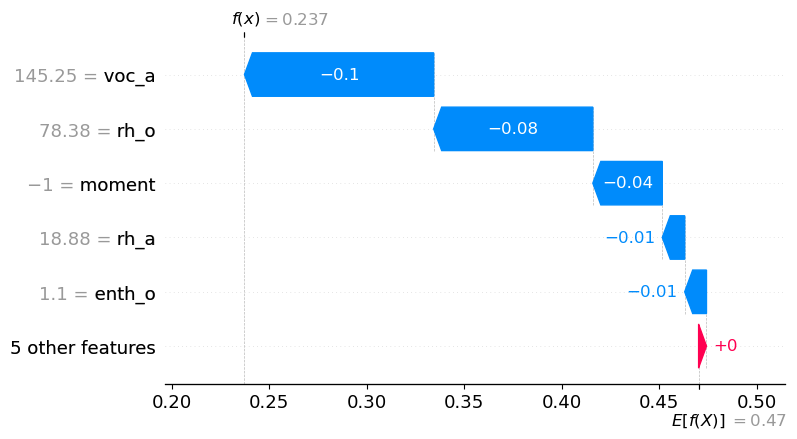

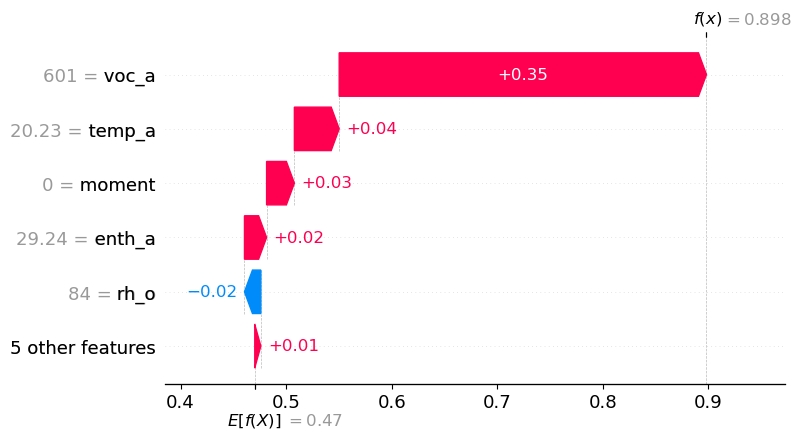

In [ ]:
shap.plots.waterfall(shap_values[1], max_display=6)
shap.plots.waterfall(shap_values[-1], max_display=6)


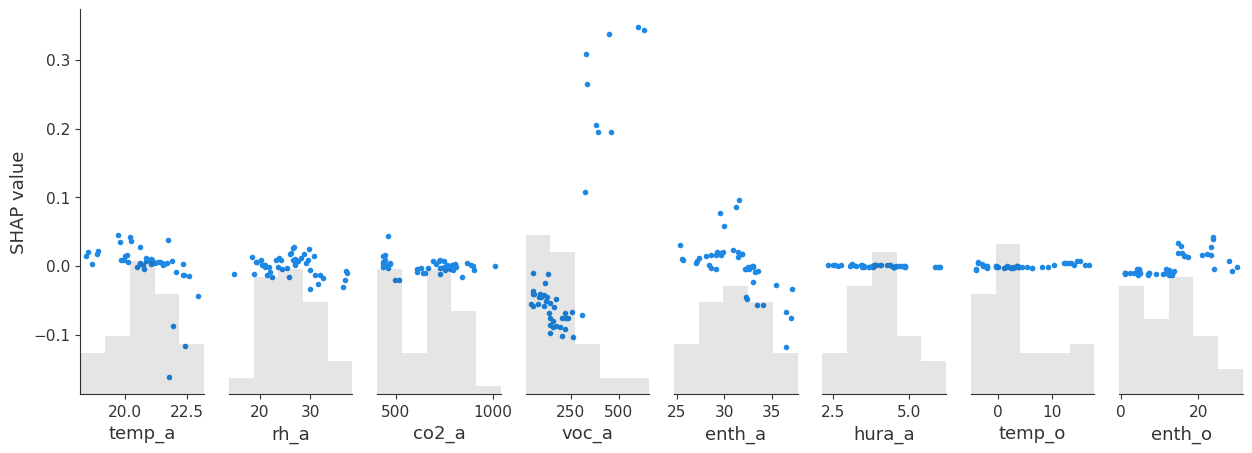

In [ ]:
shap.plots.scatter(shap_values[:,:-2])